In [ ]:


import requests
from bs4 import BeautifulSoup
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
saat=datetime.now().hour
import cloudscraper
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor,as_completed
simdi = datetime.now()
saat1 = simdi.hour
dakika = simdi.minute


saatimm=datetime.now().hour


import time
tarih=pd.read_csv("tarih.csv")
tarih=pd.to_datetime(tarih.iloc[0,0])


# D√∂ng√º √ßalƒ±≈üabilir durumda
print("D√∂ng√º ba≈üladƒ±, saat:", simdi.strftime("%H:%M:%S"))

            

bug√ºn=datetime.now().strftime("%Y-%m-%d")



d√ºn=(datetime.now()-timedelta(days=1)).strftime("%Y-%m-%d")


data=pd.read_csv("marketli.csv",index_col=0)

data=data.rename(columns={"√úr√ºn Adƒ±":"√úr√ºn"})

data.index.name=""



try:
    data=data.drop(f"{bug√ºn}",axis=1)
except:
    pass










def veriekle(√ºr√ºn, data, urunler_df):
    if urunler_df is None or urunler_df.empty:
        return data
    
    else:
        urunler_df=urunler_df.drop_duplicates()

        if isinstance(data.loc[√ºr√ºn], pd.Series):
                urun_data=pd.DataFrame(data.loc[√ºr√ºn]).T
                urun_data = pd.merge(
                    urun_data, 
                    urunler_df, 
                    on='√úr√ºn', 
                    how='outer'
                )

                if f'Market_x' in urun_data.columns and f'Market_x' in urun_data.columns:
                    urun_data[f'Market'] = urun_data[f'Market_x'].combine_first(urun_data[f'Market_y'])
                    urun_data.drop([f'Market_x', f'Market_y'], axis=1, inplace=True)
            
            # √áakƒ±≈üan s√ºtunlarƒ± birle≈ütir
                if f'{bug√ºn}_x' in urun_data.columns and f'{bug√ºn}_x' in urun_data.columns:
                    urun_data[f'{bug√ºn}'] = urun_data[f'{bug√ºn}_x'].combine_first(urun_data[f'{bug√ºn}_y'])
                    urun_data.drop([f'{bug√ºn}_x', f'{bug√ºn}_y'], axis=1, inplace=True)
                
                # ƒ∞ndeksi d√ºzenle
                    urun_data = urun_data.set_index([[√ºr√ºn] * len(urun_data)])
                    
                    # Mevcut √ºr√ºn√º veri setinden kaldƒ±r
                    data = data.drop(√ºr√ºn, axis=0)
                    
                    # Yeni veriyi ekle
                    data = pd.concat([data, urun_data], axis=0)
            
            
        else:
            
            urun_data = data.loc[√ºr√ºn]
            
            # Merge i≈ülemi sƒ±rasƒ±nda s√ºtun √ßakƒ±≈ümasƒ± ya≈üanƒ±rsa, √∂nekler olu≈üur
            urun_data = pd.merge(
                urun_data, 
                urunler_df, 
                on='√úr√ºn', 
                how='outer'
            )

            if f'Market_x' in urun_data.columns and f'Market_x' in urun_data.columns:
                    urun_data[f'Market'] = urun_data[f'Market_x'].combine_first(urun_data[f'Market_y'])
                    urun_data.drop([f'Market_x', f'Market_y'], axis=1, inplace=True)
            
            # √áakƒ±≈üan s√ºtunlarƒ± birle≈ütir
            if f'{bug√ºn}_x' in urun_data.columns and f'{bug√ºn}_x' in urun_data.columns:
                urun_data[f'{bug√ºn}'] = urun_data[f'{bug√ºn}_x'].combine_first(urun_data[f'{bug√ºn}_y'])
                urun_data.drop([f'{bug√ºn}_x', f'{bug√ºn}_y'], axis=1, inplace=True)
            
            # ƒ∞ndeksi d√ºzenle
            urun_data = urun_data.set_index([[√ºr√ºn] * len(urun_data)])
            
            # Mevcut √ºr√ºn√º veri setinden kaldƒ±r
            data = data.drop(√ºr√ºn, axis=0)
            
            # Yeni veriyi ekle
            data = pd.concat([data, urun_data], axis=0)

        return data
            
            







import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager






import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

def scrape_sok(urls):
    options = Options()
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(options=options)

    data = []
    for url in urls:
        driver.get(url)
        time.sleep(2)  # JavaScript'in y√ºklenmesi i√ßin bekle

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        products = soup.find_all('div', class_='CProductCard-module_productCardWrapper__okAmT')

        for product in products:
            name_tag = product.find('h2', class_='CProductCard-module_title__u8bMW')
            name = name_tag.text.strip() if name_tag else None

            price_tag = product.find('span', class_='CPriceBox-module_price__bYk-c')
            discounted_tag = product.find('span', class_='CPriceBox-module_discountedPrice__15Ffw')

            price_text = price_tag.text.strip() if price_tag else None
            discounted_text = discounted_tag.text.strip() if discounted_tag else None

            def parse_price(text):
                return float(text.replace("‚Ç∫", "").replace(".", "").replace(",", ".")) if text else None

            price_val = parse_price(price_text)
            discounted_val = parse_price(discounted_text)

            if discounted_val is not None and price_val is not None and discounted_val < price_val:
                final_price = discounted_val
            elif discounted_val is not None:
                final_price = discounted_val
            else:
                final_price = price_val

            print(f"√úr√ºn: {name}")
            print(f"Normal fiyat: {price_val} ƒ∞ndirimli fiyat: {discounted_val} Se√ßilen fiyat: {final_price}")
            print("-" * 40)

            data.append({"Product Name": name, "Price (TRY)": final_price,"Market":"≈ûok"})

    driver.quit()
    return pd.DataFrame(data)






def clean_price(price_text):
    price_text = price_text.replace("TL", "").strip()  # "TL" ibaresini kaldƒ±r
    price_text = price_text.replace(",", ".")  # T√ºrk√ße ondalƒ±k formatƒ± d√ºzelt
    try:
        return float(price_text)
    except ValueError:
        return None
def scrape_migros_products(pages):
    urunad = []
    urunfiyat = []

    headers = {
        "User-Agent": "Mozilla/5.0",
        "Accept": "application/json, text/plain, */*"
    }

    scraper = cloudscraper.CloudScraper()

    def sayfa_sayisi(url):
        return scraper.get(url, headers=headers).json()["data"]["searchInfo"]["pageCount"]

    def sayfa_verisini_cek(url, sayfa):
        response = scraper.get(f"{url}?page={sayfa}", headers=headers).json()
        return response["data"]["searchInfo"]["storeProductInfos"]

    with ThreadPoolExecutor(max_workers=5) as executor:
        futures = []
        for i in pages:
            try:
                sayfa_sayisi_val = sayfa_sayisi(i)
                for j in range(1, sayfa_sayisi_val + 1):
                    futures.append(executor.submit(sayfa_verisini_cek, i, j))
            except Exception as e:
                print(f"‚ö†Ô∏è Sayfa sayƒ±sƒ± belirlenirken hata olu≈ütu: {e}")

        for future in as_completed(futures):
            try:
                info = future.result()
                for urun in info:
                    urunad.append(urun.get("name"))
                    urunfiyat.append(int(urun.get("salePrice")) / 100)
            except Exception as e:
                print(f"‚ö†Ô∏è Sayfa verisi √ßekerken hata olu≈ütu: {e}")

    veri = pd.DataFrame({"Product Name": urunad, "Price (TRY)": urunfiyat,"Market":"Migros"})
    print("‚úÖ Migros verisi √ßekildi!")
    return veri

"""def scrape_carrefour_products(pages):
    print("üîç Carrefour verisi √ßekiliyor...")

    options = Options()
    options.add_argument("--headless")  
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")  # User-Agent
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    carrefour_data = []

    for url in pages:
        print(f"üìå Scraping URL: {url}")
        driver.get(url)

        try:
            WebDriverWait(driver, 2).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "li.product-listing-item"))
            )

            last_height = driver.execute_script("return document.body.scrollHeight")
            while True:
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(1)  
                new_height = driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:  
                    break
                last_height = new_height

            
            products = driver.find_elements(By.CSS_SELECTOR, "li.product-listing-item")
            print(f"‚úÖ Toplam √úr√ºn Sayƒ±sƒ±: {len(products)}")

            for product in products:
                try:
                
                    try:
                        name_element = product.find_element(By.CSS_SELECTOR, "h3.item-name")
                        product_name = name_element.text.strip()
                    except:
                        pass
                    try:
                        price_element = product.find_element(By.CSS_SELECTOR, "span.priceLineThrough.js-variant-price")
                        product_price_text = price_element.text.strip()
                    except:
                        try:
                            price_element = product.find_element(By.CSS_SELECTOR, "span.item-price.js-variant-discounted-price")
                            product_price_text = price_element.text.strip()
                        except:
                            pass

                    product_price = clean_price(product_price_text)

                    if product_name and product_price is not None:
                        carrefour_data.append({"Product Name": product_name, "Price (TRY)": product_price})
                        print(f"‚úÖ Collected - Product: {product_name}, Price: {product_price} TRY")

                except Exception as e:
                    print(f"‚ö†Ô∏è Hata olu≈ütu: {e}")

        except Exception as e:
            print(f"‚ùå Timeout veya ba≈üka hata olu≈ütu: {e}")

        

    driver.quit()
    return carrefour_data"""

import requests
from bs4 import BeautifulSoup

def clean_price(price_str):
    try:
        return float(price_str.replace(".", "").replace(",", ".").replace("TL", "").strip())
    except:
        return None

def scrape_carrefour_products(pages):
    print("üîç Carrefour verisi √ßekiliyor...")

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    carrefour_data = []

    for url in pages:
        print(f"üìå Scraping URL: {url}")
        try:
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.content, "html.parser")

            products = soup.select("li.product-listing-item")
            print(f"‚úÖ Toplam √úr√ºn Sayƒ±sƒ±: {len(products)}")

            for product in products:
                try:
                    name_element = product.select_one("h3.item-name")
                    price_element = product.select_one("span.priceLineThrough.js-variant-price")  # ƒ∞ndirimsiz fiyat
                    if not price_element:
                        price_element= product.select_one("span.item-price.js-variant-discounted-price")

                    product_name = name_element.text.strip() if name_element else None
                    product_price_text = price_element.text.strip() if price_element else None
                    product_price = clean_price(product_price_text)
                    market="Carrefour"
                    if product_name and product_price is not None:
                        carrefour_data.append({
                            "Product Name": product_name,
                            "Price (TRY)": product_price,
                            "Market":market
                        })
                        print(f"‚úÖ Collected - Product: {product_name}, Price: {product_price} TRY")

                except Exception as e:
                    print(f"‚ö†Ô∏è Hata olu≈ütu (√ºr√ºn bazƒ±nda): {e}")

        except Exception as e:
            print(f"‚ùå Sayfa √ßekilemedi: {e}")

    return carrefour_data


# üìå Ana Fonksiyon
import time
import pandas as pd
import numpy as np

def vericek(carrefour, migros, sok, name, retry_count=3):
    bug√ºn = time.strftime("%Y-%m-%d")  # Bug√ºn√ºn tarihini al

    for attempt in range(retry_count):
        try:
            print(f"{name} verisi √ßekiliyor... (deneme {attempt+1}/{retry_count})")

            migros_data = scrape_migros_products(migros)
            sok_data = scrape_sok(sok)

            carrefour_data = None
            if carrefour:
                carrefour_data = scrape_carrefour_products(carrefour)
                carrefour_data = pd.DataFrame(carrefour_data)

            if carrefour_data is not None:
                all_data = pd.concat([migros_data, carrefour_data, sok_data], axis=0)
            else:
                all_data = pd.concat([migros_data, sok_data], axis=0)

            if all_data.empty:
                return pd.DataFrame()

            product_df = all_data.copy()
            product_df['Product Group'] = product_df['Product Name'].str.lower()

            # Geometrik ortalama hesaplama fonksiyonu
            def geometric_mean(prices):
                return np.exp(np.mean(np.log(prices)))

            geo_mean_df = (
                product_df.groupby(['Product Group'])
                .agg(
                    Geometric_Mean=('Price (TRY)', geometric_mean),
                    Product_Names=('Product Name', lambda x: ', '.join(x)),
                    Last_Market=('Market', lambda x: x.iloc[-1])
                )
                .reset_index()
            )


            geo_mean_df = geo_mean_df.drop("Product Group", axis=1)
            geo_mean_df.columns = ["Price (TRY)", "Product Name","Market"]

            urunler_df = geo_mean_df.copy()
            if not urunler_df.empty:
                urunler_df.columns = [str(bug√ºn), "√úr√ºn","Market"]
                urunler_df.index = len(urunler_df) * [name]
                urunler_df = urunler_df.drop_duplicates().dropna()
                return urunler_df

            try:
                all_data.columns = ["√úr√ºn", str(bug√ºn),"Market"]
                return all_data
            except:
                return pd.DataFrame()

        except Exception as e:
            print(f"‚ùå Hata olu≈ütu (deneme {attempt+1}/{retry_count}): {e}")
            time.sleep(2)

    print(f"‚ùó {name} verisi {retry_count} kez denenmesine raƒümen alƒ±namadƒ±.")
    return pd.DataFrame()



import requests
import pandas as pd
from IPython.display import display
import json

import requests
import pandas as pd
from IPython.display import display
import json

def market_fiyat_api(arama_terimi, lat=41.0579, lng=28.9147, distance=10):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
        'Content-Type': 'application/json',
        'Accept': 'application/json',
        'Accept-Encoding': 'gzip, deflate',
        'Origin': 'https://marketfiyati.org.tr',
        'Referer': 'https://marketfiyati.org.tr/',
        'Cache-Control': 'no-cache',
        'Pragma': 'no-cache',
        'Connection': 'keep-alive'
    }

    try:
        # Nearest API isteƒüi
        nearest_url = 'https://api.marketfiyati.org.tr/api/v2/nearest'
        nearest_data = {
            'latitude': str(lat),
            'longitude': str(lng),
            'distance': distance
        }

        requests.packages.urllib3.disable_warnings()

        nearest_response = requests.post(
            nearest_url,
            json=nearest_data,
            headers=headers,
            verify=False
        )

        nearest_markets = nearest_response.json()
        depots = [market['id'] for market in nearest_markets]

        # Search API isteƒüi
        search_url = 'https://api.marketfiyati.org.tr/api/v2/search'
        search_data = {
            'keywords': arama_terimi,
            'pages': 0,
            'size': 100,
            'depots': depots,
            'latitude': str(lat),
            'longitude': str(lng),
            'distance': distance
        }

        search_response = requests.post(
            search_url,
            json=search_data,
            headers=headers,
            verify=False
        )

        results = search_response.json()

        # Verileri d√ºzenle
        rows = []
        for item in results['content']:
            categories = ", ".join(item.get('categories', []))  # kategorileri virg√ºlle birle≈ütir
            for depot_info in item['productDepotInfoList']:
                row = {
                    'name': item['title'],
                    'brand': item.get('brand', ''),
                    'categories': categories,
                    'marketName': depot_info['marketAdi'],
                    'depotName': depot_info['depotName'],
                    'price': depot_info['price'],
                    'updateDate': depot_info['indexTime'],
                    'marketDistance': depot_info.get('distance', 0)
                }
                rows.append(row)

        df = pd.DataFrame(rows)

        if not df.empty:
            # Tarihi d√ºzenle
            df['updateDate'] = pd.to_datetime(df['updateDate'], format='%d.%m.%Y %H:%M')
            df['updateDate'] = df['updateDate'].dt.strftime('%Y-%m-%d %H:%M')

            # Fiyatlarƒ± d√ºzenle
            df['price'] = pd.to_numeric(df['price'], errors='coerce')

            # Mesafeyi d√ºzenle
            if 'marketDistance' in df.columns:
                df['marketDistance'] = df['marketDistance'].round(2)
                df = df.rename(columns={'marketDistance': 'mesafe_km'})

            # Sƒ±ralama
            df = df.sort_values('price')

            return df

        return pd.DataFrame()

    except Exception as e:
        print(f"Hata olu≈ütu: {str(e)}")
        return pd.DataFrame()



carrefour = ["https://www.carrefoursa.com/pirinc/c/1134?q=&show=All#"]
migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pirinc-c-427"
]
sok=["https://www.sokmarket.com.tr/pirinc-ve-bulgur-c-1810"]



urunler_df=vericek(carrefour,migros_pages,sok,"Pirin√ß")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Pirin√ß",case=False)]

data=veriekle("Pirin√ß",data,urunler_df)
    






pages1 = ["https://www.carrefoursa.com/bugday-unu/c/1277?q=&show=All#"]

    



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sade-un-c-289b"]

sok=["https://www.sokmarket.com.tr/un-c-1782"]
urunler_df=vericek(pages1,migros_pages,sok,"Buƒüday Unu")
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("mƒ±sƒ±r|galeta",case=False)]





data=veriekle("Buƒüday Unu",data,urunler_df)









pages1=["https://www.carrefoursa.com/bebek-mamasi/c/1848?q=&show=All#"]
    




migros_pages =["https://www.migros.com.tr/rest/search/screens/devam-sutu-c-1136b"]
sok=["https://www.sokmarket.com.tr/bebek-mama-c-20638"]

urunler_df=vericek(pages1,migros_pages,sok,"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)")



data=veriekle("Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",data,urunler_df)








pages1 = ["https://www.carrefoursa.com/bulgur/c/1142?q=&show=All#"]
    




# Define base URL and total pages to scrape for Migros
migros_pages1= ["https://www.migros.com.tr/rest/search/screens/pilavlik-bulgur-c-2785"]
sok=["https://www.sokmarket.com.tr/pirinc-ve-bulgur-c-1810"]


urunler_df=vericek(pages1,migros_pages1,sok,"Bulgur")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Bulgur",case=False)]

data=veriekle("Bulgur",data,urunler_df)





pages1 = ["https://www.migros.com.tr/rest/search/screens/ekmek-c-455"]
carrefour=["https://www.carrefoursa.com/ekmek/c/2378?q=&show=All"]
sok=["https://www.sokmarket.com.tr/ekmek-c-1240"]    




urunler_df=vericek(carrefour,pages1,sok,"Ekmek")

urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ekmek",case=False)]

data=veriekle("Ekmek",data,urunler_df)






pages1 = ["https://www.carrefoursa.com/biskuvi/c/1529?q=&show=All&%3AbestSeller%3Acategory%3A1534%3Acategory%3A1533%3Acategory%3A1537%3Acategory%3A1530%3Acategory%3A1531%3Acategory%3A1536%3AinStockFlag%3Atrue"]

    
migros=["https://www.migros.com.tr/rest/search/screens/biskuvi-c-43c"]
sok=["https://www.sokmarket.com.tr/biskuvi-c-20378?page=1","https://www.sokmarket.com.tr/biskuvi-c-20378?page=2","https://www.sokmarket.com.tr/biskuvi-c-20378?page=3",
        "https://www.sokmarket.com.tr/biskuvi-c-20378?page=4","https://www.sokmarket.com.tr/biskuvi-c-20378?page=5"]
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("kraker|gofret",case=False)]
urunler_df=vericek(pages1,migros,sok,"Bisk√ºvi")




data=veriekle("Bisk√ºvi",data,urunler_df)





pages1= ["https://www.carrefoursa.com/kraker/c/1538?q=&show=All"]









# Define the list of pages to scrape from Migros
migros_pages  = ["https://www.migros.com.tr/rest/search/screens/kraker-c-27ea"]

sok=["https://www.sokmarket.com.tr/kraker-ve-tuzlu-biskuvi-c-20380"]

urunler_df=vericek(pages1,migros_pages,sok,"Kraker")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("kraker", case=False)]






data=veriekle("Kraker",data,urunler_df)





pages1= ["https://www.carrefoursa.com/bar-ve-gofret/c/1505?q=&show=All"]

migros=["https://www.migros.com.tr/rest/search/screens/gofret-c-43a"]
sok=["https://www.sokmarket.com.tr/gofret-c-20379?page=3","https://www.sokmarket.com.tr/gofret-c-20379?page=2","https://www.sokmarket.com.tr/gofret-c-20379?page=1"]
urunler_df=vericek(pages1,migros,sok,"Gofret")
if urunler_df is not None and not urunler_df.empty:
    urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("helva", case=False)]


data=veriekle("Gofret",data,urunler_df)









pages1= ["https://www.carrefoursa.com/pastalar/c/1289?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]




# Define the list of pages to scrape from Migros
migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pasta-c-459"]
sok=["https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-54427"]
urunler_df=vericek(pages1,migros_pages,sok,"Pasta")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("pasta", case=False)]

data=veriekle("Pasta",data,urunler_df)








pages1= ["https://www.carrefoursa.com/mini-kek/c/1547?q=&show=All"]



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/kek-c-43d"]
sok=["https://www.sokmarket.com.tr/kek-c-20381?page=3","https://www.sokmarket.com.tr/kek-c-20381?page=2","https://www.sokmarket.com.tr/kek-c-20381?page=1"]
urunler_df=vericek(pages1,migros_pages,sok,"Kek")


data=veriekle("Kek",data,urunler_df)









pages1= ["https://www.carrefoursa.com/serbetli-tatli/c/1294?q=&show=All"]




migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pastane-tatlilar-c-287b"
]
sok=["https://www.sokmarket.com.tr/sekerleme-c-20388?page=2","https://www.sokmarket.com.tr/sekerleme-c-20388?page=1"]
urunler_df=vericek(pages1,migros_pages,sok,"Baklava")
if urunler_df is not None and not urunler_df.empty:
    urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Baklava|baklava|Baklavasƒ±|baklavasƒ±", case=False)]

    data=veriekle("Baklava",data,urunler_df)




# Define the list of pages to scrape from Migros
migros_pages  = ["https://www.migros.com.tr/rest/search/screens/yufka-c-2872"]
sok=["https://www.sokmarket.com.tr/unlu-mamuller-c-29110"]
urunler_df=vericek("",migros_pages,sok,"Ekmek Hamuru (Yufka)")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Yufka", case=False)]


data=veriekle("Ekmek Hamuru (Yufka)",data,urunler_df)








pages1= ["https://www.carrefoursa.com/makarna/c/1122?q=&show=All#"]



# Define the list of pages to scrape from Migros
migros_pages  = ["https://www.migros.com.tr/rest/search/screens/normal-makarna-c-2780"]
sok=["https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=2","https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=1"]
urunler_df=vericek(pages1,migros_pages,sok,"Makarna")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Makarna", case=False)]

data=veriekle("Makarna",data,urunler_df)





pages1= ["https://www.carrefoursa.com/makarna/c/1123?q=&show=All"]



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/normal-makarna-c-2780"]
sok=["https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=2","https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=1"]
urunler_df=vericek(pages1,migros_pages,sok,"≈ûehriye")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("≈ûehriye|≈üehriye")]

        data=veriekle("≈ûehriye",data,urunler_df)







pages1= ["https://www.carrefoursa.com/kahvaltilik-gevrek/c/1378?q=&show=All"]



    
    


# Define the list of pages to scrape from Migros
migros_pages  = ["https://www.migros.com.tr/rest/search/screens/misir-gevregi-c-2773"]
sok=["https://www.sokmarket.com.tr/kahvaltilik-gevrek-c-950"]
urunler_df=vericek(pages1,migros_pages,sok,"M√ºsli ve Hububat √úr√ºnleri")


data=veriekle("Tahƒ±l Gevreƒüi",data,urunler_df)








pages1= ["https://www.carrefoursa.com/dana/c/1046?q=&show=All"]




migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/dana-eti-c-3fa"

]
sok=["https://www.sokmarket.com.tr/kirmizi-et-c-170"]
urunler_df=vericek(pages1,migros_pages,sok,"Dana Eti")
sktt=urunler_df[urunler_df["√úr√ºn"].str.contains("i≈ükembe|ciƒüer|dil|i≈ükembe|b√∂brek|y√ºrek|dalak|s√∂ƒü√º≈ü",case=False)]
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("suyu|i≈ükembe|ciƒüer|dil|√ßorba|i≈ükembe|b√∂brek|y√ºrek|dalak|s√∂ƒü√º≈ü",case=False)]
data=veriekle("Dana Eti",data,urunler_df)








pages1= ["https://www.carrefoursa.com/kuzu/c/1054?q=&show=All"]



migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/kuzu-eti-c-3fb"]


urunler_df=vericek(pages1,migros_pages,"","Kuzu Eti")

data=veriekle("Kuzu Eti",data,urunler_df)









pages1= ["https://www.carrefoursa.com/pilic/c/1061?q=&show=All"]




migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/pilic-c-3fe"]
sok=["https://www.sokmarket.com.tr/beyaz-et-c-180"]
urunler_df=vericek(pages1,migros_pages,sok,"Tavuk Eti")




data=veriekle("Tavuk Eti",data,urunler_df)


migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/sakatat-c-3fd"]
sok=["https://www.sokmarket.com.tr/arama?q=kokore%C3%A7"]
urunler_df=vericek("",migros_pages,sok,"Sakatat")


data=veriekle("Sakatat",data,urunler_df)
data=veriekle("Sakatat",data,sktt)







pages1= ["https://www.carrefoursa.com/sucuk/c/1077?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sucuk-c-404"]

sok=["https://www.sokmarket.com.tr/sucuk-c-200"]

urunler_df=vericek(pages1,migros_pages,sok,"Sucuk")

data=veriekle("Sucuk",data,urunler_df)





    
pages1= ["https://www.carrefoursa.com/sosis/c/1084?q=&show=All"]


migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sosis-c-405"]


sok=["https://www.sokmarket.com.tr/sosis-c-31228"]
urunler_df=vericek(pages1,migros_pages,sok,"Sosis")




data=veriekle("Sosis",data,urunler_df)








    
pages1= ["https://www.carrefoursa.com/salam/c/1092?q=&show=All"]



migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/salam-c-112d6"]
sok=["https://www.sokmarket.com.tr/salam-c-31229"]
urunler_df=vericek(pages1,migros_pages,sok,"Salam")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("salam",case=False)]


data=veriekle("Salam",data,urunler_df)



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pismeye-hazir-etler-c-11fd7"]




urunler_df=vericek("",migros_pages,"","Hazƒ±r Et Yemekleri")
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("sushida|mƒ±sƒ±r|salata|barbunya|pilaki|fasulye",case=False)]

data=veriekle("Hazƒ±r Et Yemekleri",data,urunler_df)







    
pages1= ["https://www.carrefoursa.com/baliklar/c/1099?q=&show=All"]



migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/mevsim-baliklari-c-402"]

urunler_df=vericek(pages1,migros_pages,"","Balƒ±k")

data=veriekle("Balƒ±k",data,urunler_df)


    
pages1= ["https://www.carrefoursa.com/paketli-urunler/c/1068?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/konserve-deniz-urunleri-c-285a"]

sok=["https://www.sokmarket.com.tr/balik-konservesi-c-22773"]


urunler_df=vericek(pages1,migros_pages,sok,"Deniz √úr√ºnleri")


data=veriekle("Konserve Balƒ±k",data,urunler_df)







    
pages1= ["https://www.carrefoursa.com/sut/c/1311?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]




migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sut-c-6c"]
sok=["https://www.sokmarket.com.tr/sut-c-470?page=2","https://www.sokmarket.com.tr/sut-c-470?page=1"]


urunler_df=vericek(pages1,migros_pages,sok,"S√ºt")
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("latte|starbucks|kahve",case=False)]

data=veriekle("S√ºt",data,urunler_df)







    
pages1= ["https://www.carrefoursa.com/yogurt/c/1389?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/yogurt-c-6e"]

sok=["https://www.sokmarket.com.tr/yogurt-c-480?page=2","https://www.sokmarket.com.tr/yogurt-c-480?page=1"]

urunler_df=vericek(pages1,migros_pages,sok,"Yoƒüurt")



data=veriekle("Yoƒüurt",data,urunler_df)








    
pages1= ["https://www.carrefoursa.com/sutlu-tatli-puding/c/1962?q=&show=All"]




migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/sutlu-tatlilar-c-41c"]
sok=["https://www.sokmarket.com.tr/tatli-ve-puding-c-580"]

urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("puding",case=False)]
urunler_df=vericek(pages1,migros_pages,sok,"Hazƒ±r S√ºtl√º Tatlƒ±lar")





data=veriekle("Hazƒ±r S√ºtl√º Tatlƒ±lar",data,urunler_df)







    
pages1= ["https://www.carrefoursa.com/beyaz-peynir/c/1319?q=%3AbestSeller&show=All"]



    

migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/beyaz-peynir-c-40b"]


sok=["https://www.sokmarket.com.tr/beyaz-peynir-c-500?page=2","https://www.sokmarket.com.tr/beyaz-peynir-c-500?page=1"]
urunler_df=vericek(pages1,migros_pages,sok,"Beyaz Peynir")





data=veriekle("Beyaz Peynir",data,urunler_df)








    
pages1= ["https://www.carrefoursa.com/kasar-/c/1324?q=&show=All"]



# Define the list of pages to scrape from Migros
migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/kasar-peyniri-c-40d"]
sok=["https://www.sokmarket.com.tr/kasar-peynir-c-520"]
urunler_df=vericek(pages1,migros_pages,sok,"Ka≈üar Peyniri")



data=veriekle("Ka≈üar Peyniri",data,urunler_df)



pages1= ["https://www.carrefoursa.com/krem-peynir/c/1336?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/krem-peynir-c-2737"]


sok=["https://www.sokmarket.com.tr/krem-peynir-c-510"]

urunler_df=vericek(pages1,migros_pages,sok,"Krem Peynir")



data=veriekle("Krem Peynir",data,urunler_df)








pages1= ["https://www.carrefoursa.com/yumurta/c/1349?q=&show=All"]



migros_pages  =   ["https://www.migros.com.tr/rest/search/screens/yumurta-c-70"]

sok=["https://www.sokmarket.com.tr/yumurta-c-190"]

urunler_df=vericek(pages1,migros_pages,sok,"Yumurta")




data=veriekle("Yumurta",data,urunler_df)







pages1= ["https://www.carrefoursa.com/tereyag/c/1350?q=&show=All"]



migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/tereyagi-c-413"]

sok=["https://www.sokmarket.com.tr/tereyag-c-31602"]

urunler_df=vericek(pages1,migros_pages,sok,"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)")


data=veriekle("Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",data,urunler_df)






    
pages1= ["https://www.carrefoursa.com/margarin/c/1351?q=&show=All"]




migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/paket-margarin-c-274e"]

sok=["https://www.sokmarket.com.tr/margarin-c-31727"]


urunler_df=vericek(pages1,migros_pages,sok,"Margarin")


data=veriekle("Margarin",data,urunler_df)







    
pages1= ["https://www.carrefoursa.com/zeytinyagi/c/1114?q=&show=All"]




migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/zeytinyagi-c-433"]
sok=["https://www.sokmarket.com.tr/sivi-yaglar-c-1780"]
urunler_df=vericek(pages1,migros_pages,sok,"Zeytinyaƒüƒ±")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Zeytinyaƒüƒ±",case=False)]

data=veriekle("Zeytinyaƒüƒ±",data,urunler_df)







pages1= ["https://www.carrefoursa.com/aycicek/c/1112?q=&show=All"]



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/aycicek-yagi-c-42d"]

sok=["https://www.sokmarket.com.tr/sivi-yaglar-c-1780"]


urunler_df=vericek(pages1,migros_pages,sok,"Ay√ßi√ßek Yaƒüƒ±")
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Zeytinyaƒüƒ±",case=False)]


data=veriekle("Ay√ßi√ßek Yaƒüƒ±",data,urunler_df)








    
pages1= ["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]



migros_pages  = ["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?sayfa=1&93=652"]

sok=["https://www.sokmarket.com.tr/meyve-ve-sebze-c-20?page=2","https://www.sokmarket.com.tr/meyve-ve-sebze-c-20?page=1"]


urunler_df=vericek(pages1,migros_pages,sok,"Portakal")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Portakal|portakal")]



data=veriekle("Portakal",data,urunler_df)




def vericek1(carrefour="",migros="",name=""):
    
    try:

# Function to clean and convert price text to float
        def clean_price(price_text):
            # Remove any non-numeric characters except for commas and dots
            price_text = re.sub(r'[^\d,.]', '', price_text)
            # Replace commas with dots if needed (ensure it works with Turkish formatted numbers)
            price_text = price_text.replace(',', '.')
            try:
                return float(price_text)
            except ValueError:
                return None



        # Function to scrape product names and prices from Carrefour for multiple URLs
        def scrape_carrefour_products(pages):
            carrefour_data = []
            
            for url in pages:
                print(f"Scraping URL: {url}")
                driver.get(url)

                try:
                    # Find all product links
                    product_elements = driver.find_elements(By.CSS_SELECTOR, 'a.product-return')

                    for index, product_element in enumerate(product_elements):
                        try:
                            # Extract product name
                            product_name_element = product_element.find_element(By.CSS_SELECTOR, 'h3.item-name')
                            product_name = product_name_element.text.strip()

                            # Extract product price
                            # First, try to find the "priceLineThrough" element for non-discounted price
                            try:
                                price_line_through_element = product_element.find_element(By.CSS_SELECTOR, 'span.priceLineThrough.js-variant-price')
                                price_line_through_text = price_line_through_element.text.strip()
                                product_price = clean_price(price_line_through_text)
                            except:
                                # If no "priceLineThrough", fall back to the current price
                                price_element = product_element.find_element(By.CSS_SELECTOR, 'span.item-price.js-variant-discounted-price')
                                product_price_text = price_element.text.strip()
                                product_price = clean_price(product_price_text)

                            if product_name and product_price is not None:
                                carrefour_data.append({"Product Name": product_name, "Price (TRY)": product_price})
                                print(f"Collected - Product: {product_name}, Price: {product_price} TRY")
                            else:
                                print(f"Skipping product with incomplete data on {url}")

                        except Exception as e:
                            print(f"Error extracting data from product {index + 1} on {url}: {e}")
                    
                    sleep(2)  # Sleep to mimic human interaction and avoid detection
                
                except Exception as e:
                    print(f"Error while scraping {url}: {e}")

            return carrefour_data


        # Define the list of pages to scrape from Migros
        migros_pages  = migros







        if migros:
            
            
            migros_data = scrape_migros_products(migros)

            
        if carrefour:
            carrefour_data = scrape_carrefour_products(carrefour)

        if migros_data and carrefour:

            all_data = migros_data + carrefour_data
        elif migros_data and not carrefour:
            all_data=migros_data
        else:
            all_data=carrefour_data
        product_df = pd.DataFrame(all_data)

        





        urunler_df = product_df.copy()
        if urunler_df is not None and not urunler_df.empty:
            urunler_df.columns=["√úr√ºn",str(bug√ºn)]
            urunler_df=urunler_df.groupby("√úr√ºn", as_index=False).agg({str(bug√ºn): 'mean'})

            urunler_df.index=len(urunler_df)*[name]
            urunler_df=urunler_df.drop_duplicates()
            urunler_df=urunler_df.dropna()

            return urunler_df
    except:
            pass





        

    





carrefour=["https://www.carrefoursa.com/yumusak-meyveler/c/1017?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee"]
sok=["https://www.sokmarket.com.tr/meyve-c-50"]

urunler_df=vericek(carrefour,migros,sok,"√úz√ºm")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√úz√ºm|√ºz√ºm", case=False)]
        data=veriekle("√úz√ºm",data,urunler_df)



carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?"]
sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

urunler_df=vericek(carrefour,migros,sok,"Armut")
if urunler_df is not None : 
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Armut|armut")]
        data=veriekle("Armut",data,urunler_df)



carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?"]
sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

urunler_df=vericek(carrefour,migros,sok,"Ayva")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ayva|ayva")]

        data=veriekle("Ayva",data,urunler_df)


carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee?"]
sok=["https://www.sokmarket.com.tr/meyve-c-50"]
urunler_df=vericek(carrefour,migros,sok,name="√áilek")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√áilek|√ßilek")]


data=veriekle("√áilek",data,urunler_df)


carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?"]
sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

urunler_df=vericek(carrefour,migros,sok,"Elma")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Elma|elma")]


        data=veriekle("Elma",data,urunler_df)



carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/kavun-ve-karpuz-c-3eb"]

urunler_df=vericek(carrefour,migros,"",name="Karpuz")

if urunler_df is not None: 
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Karpuz|karpuz")]


        data=veriekle("Karpuz",data,urunler_df)


carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/kavun-ve-karpuz-c-3eb"]
sok=["https://www.sokmarket.com.tr/meyve-c-50"]

urunler_df=vericek(carrefour,migros,sok,"Kavun")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kavun|kavun", case=False)]


        data=veriekle("Kavun",data,urunler_df)


carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/egzotik-meyveler-c-3ea"]
sok=["https://www.sokmarket.com.tr/meyve-c-50"]

urunler_df=vericek(carrefour,migros,sok,"Kivi")
if urunler_df is not None :
    if not urunler_df.empty:
            try:
                urunler_df1=urunler_df[urunler_df["√úr√ºn"].str.contains("Kivisi Kg|Kivisi kg|Kivi Kg|Kivi kg|ƒ∞BB Hal Kivi|kivi")]

                if urunler_df1 is not None :
                    if not urunler_df1.empty:
                        data=veriekle("Kivi",data,urunler_df1)
            except:
                urunler_df=pd.DataFrame(urunler_df).T
                if urunler_df is not None :
                    if not urunler_df.empty:
                        data=veriekle("Kivi",data,urunler_df)
                


carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?"]
sok=["https://www.sokmarket.com.tr/narenciye-c-60"]


urunler_df=vericek(carrefour,migros,sok,"Limon")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Limon|limon", case=False)]

        data=veriekle("Limon",data,urunler_df)





carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?"]
sok=["https://www.sokmarket.com.tr/narenciye-c-60"]


urunler_df=vericek(carrefour,migros,sok,"Mandalina")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Mandalina Kg|Mandalina KG|Mandalina kg|mandalina kg|mandalina Kg|mandalina KG")]



        data=veriekle("Mandalina",data,urunler_df)




carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/egzotik-meyveler-c-3ea?"]
sok=["https://www.sokmarket.com.tr/meyve-c-50"]

urunler_df=vericek(carrefour,migros,sok,"Muz")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Muz|muz", case=False)]
        data=veriekle("Muz",data,urunler_df)



carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee"]
sok=["https://www.sokmarket.com.tr/meyve-c-50"]
urunler_df=vericek(carrefour,migros,sok,"≈ûeftali")




if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("≈ûeftali|≈üeftali")]


        data=veriekle("≈ûeftali",data,urunler_df)


carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?"]
sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]


urunler_df=vericek(carrefour,migros,sok,"Nar")
if urunler_df is not None:
    if not urunler_df.empty:

        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Nar Kg|Nar kg|nar kg|nar Kg|Nar|nar", case=False)]


        data=veriekle("Nar",data,urunler_df)


carrefour=["https://www.carrefoursa.com/badem/c/1523?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/badem-c-280f?sayfa=1&markalar=6570,425,4373,7923,652"]
sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


urunler_df=vericek(carrefour,migros,sok,"Badem ƒ∞√ßi")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Badem", case=False)]
        
        data=veriekle("Badem ƒ∞√ßi",data,urunler_df)


carrefour=["https://www.carrefoursa.com/ceviz/c/1524?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/ceviz-ici-c-2805"]
sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


urunler_df=vericek(carrefour,migros,sok,"Ceviz ƒ∞√ßi")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ceviz", case=False)]

        data=veriekle("Ceviz ƒ∞√ßi",data,urunler_df)




carrefour=["https://www.carrefoursa.com/findik/c/1521?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/findik-c-280e"]

sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Fƒ±ndƒ±k ƒ∞√ßi")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Fƒ±ndƒ±k", case=False)]

        data=veriekle("Fƒ±ndƒ±k ƒ∞√ßi",data,urunler_df)




migros=["https://www.migros.com.tr/rest/search/screens/antep-fistigi-c-280d"]
sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

urunler_df=vericek("",migros,sok,name="Antep Fƒ±stƒ±ƒüƒ±")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Antep|antep")]
        data=veriekle("Antep Fƒ±stƒ±ƒüƒ±",data,urunler_df)




migros=["https://www.migros.com.tr/rest/search/screens/fistik-c-280c"]
sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

urunler_df=vericek("",migros,sok,name="Yer Fƒ±stƒ±ƒüƒ±")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Yer Fƒ±stƒ±ƒüƒ±",case=False)]

        data=veriekle("Yer Fƒ±stƒ±ƒüƒ±",data,urunler_df)













carrefour=["https://www.carrefoursa.com/leblebi/c/1522?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/leblebi-c-2811"]
sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


urunler_df=vericek(carrefour,migros,sok,"Leblebi")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Leblebi",case=False)]
        data=veriekle("Leblebi",data,urunler_df)






carrefour=["https://www.carrefoursa.com/cekirdek/c/1525?q=&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/aycekirdegi-c-280b"]
sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


urunler_df=vericek(carrefour,migros,sok,"Ay √áekirdeƒüi")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√áekirdek|√áekirdeƒüi",case=False)]
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Kabak|kabak")]



        data=veriekle("Ay √áekirdeƒüi",data,urunler_df)


carrefour=["https://www.carrefoursa.com/cekirdek/c/1525?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kabak-cekirdegi-c-280a"]
sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Kabak √áekirdeƒüi")

if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kabak|kabak")]


        data=veriekle("Kabak √áekirdeƒüi",data,urunler_df)


carrefour=["https://www.carrefoursa.com/kuru-uzum/c/2495?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kuru-uzum-c-27fd"]
sok=["https://www.sokmarket.com.tr/kurutulmus-meyve-ve-sebze-c-90"]


urunler_df=vericek("",migros,sok,"Kuru √úz√ºm")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√úz√ºm|√ºz√ºm")]


        data=veriekle("Kuru √úz√ºm",data,urunler_df)


carrefour=["https://www.carrefoursa.com/kayisi/c/2492?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kuru-kayisi-c-2800"]


urunler_df=vericek(carrefour,migros,sok,"Kuru Kayƒ±sƒ±")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("kayƒ±sƒ±|Kayƒ±sƒ±")]



        data=veriekle("Kuru Kayƒ±sƒ±",data,urunler_df)


carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
sok=["https://www.sokmarket.com.tr/sebze-c-40"]

urunler_df=vericek(carrefour,migros,sok,"√áarliston Biber")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√áarliston|√ßarliston")]

        data=veriekle("√áarliston Biber",data,urunler_df)


carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
sok=["https://www.sokmarket.com.tr/sebze-c-40"]


urunler_df=vericek(carrefour,migros,sok,"Dolmalƒ±k Biber")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Dolma|Dolmalƒ±k")]


        data=veriekle("Dolmalƒ±k Biber",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
sok=["https://www.sokmarket.com.tr/sebze-c-40"]

urunler_df=vericek(carrefour,migros,sok,"Sivri Biber")

if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("sivri|Sivri")]

        data=veriekle("Sivri Biber",data,urunler_df)




carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5"]
sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]
urunler_df=vericek(carrefour,migros,sok,"Dereotu")
if urunler_df is not None :
    if  not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Dereotu", case=False)]


        data=veriekle("Dereotu",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=700"]
sok=["https://www.sokmarket.com.tr/sebze-c-40"]


urunler_df=vericek(carrefour,migros,sok,"Domates")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Sal√ßasƒ±", case=False)]
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Domates|domates", case=False)]
    

        data=veriekle("Domates",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4"]
sok=["https://www.sokmarket.com.tr/sebze-c-40"]


urunler_df=vericek(carrefour,migros,sok,"Taze Fasulye")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Fasulye|fasulye")]

        data=veriekle("Taze Fasulye",data,urunler_df)






carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=684"]
sok=["https://www.sokmarket.com.tr/sebze-c-40"]

urunler_df=vericek(carrefour,migros,sok,"Havu√ß")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Havu√ß|havu√ß")]

        data=veriekle("Havu√ß",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=712"]    
sok=["https://www.sokmarket.com.tr/sebze-c-40"]   


urunler_df=vericek(carrefour,migros,sok,"Ispanak")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ispanak|ƒ±spanak")]

        data=veriekle("Ispanak",data,urunler_df)







carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=713"]    
sok=["https://www.sokmarket.com.tr/sebze-c-40"]


urunler_df=vericek(carrefour,migros,sok,"Kabak")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("√áekirdeƒüi|√áekirdek|Tatlƒ±")]
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("kabak")]

        data=veriekle("Kabak",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All##"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=668"] 
sok=["https://www.sokmarket.com.tr/sebze-c-40"]

urunler_df=vericek(carrefour,migros,sok,"Karnabahar")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Karnabahar")]


        data=veriekle("Karnabahar",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All##"]
migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=674"] 
sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]

urunler_df=vericek(carrefour,migros,sok,"Kuru Soƒüan")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("soƒüan|Soƒüan")]

        data=veriekle("Kuru Soƒüan",data,urunler_df)



migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=694"] 
carrefour=["https://www.carrefoursa.com/salata-malzemeleri-/c/1027?q=&show=All#"]
sok=["https://www.sokmarket.com.tr/sebze-c-40"]


urunler_df=vericek(carrefour,migros,sok,name="Beyaz Lahana")
if urunler_df is not None:
    if not urunler_df.empty:

        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Beyaz Lahana|beyaz lahana|beyaz lahana|Lahana beyaz|Lahana Beyaz")]
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Hazƒ±r|hazƒ±r")]


        data=veriekle("Beyaz Lahana",data,urunler_df)



migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=723"] 
carrefour=["https://www.carrefoursa.com/salata-malzemeleri-/c/1027?q=&show=All#"]


urunler_df=vericek(carrefour,migros,sok,name="Kƒ±rmƒ±zƒ± Lahana")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kƒ±rmƒ±zƒ± Lahana|kƒ±rmƒ±zƒ± lahana|Kƒ±rmƒ±zƒ± lahana|Lahana Kƒ±rmƒ±zƒ±|Lahana kƒ±rmƒ±zƒ±")]
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Hazƒ±r|hazƒ±r")]

        data=veriekle("Kƒ±rmƒ±zƒ± Lahana",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/egzotik-sebzeler-c-3f2"] 


urunler_df=vericek(carrefour,migros,sok,"Mantar")


if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Mantar|mantar|mantarƒ±|Mantarƒ±")]
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("√áorba|Pano|ƒ∞stiridye|Salatasƒ±")]

        data=veriekle("Mantar",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=724"] 
sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


urunler_df=vericek(carrefour,migros,sok,"Kƒ±vƒ±rcƒ±k")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("kƒ±vƒ±rcƒ±k|Kƒ±vƒ±rcƒ±k")]
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Adet|adet", case=False)]
        data=veriekle("Kƒ±vƒ±rcƒ±k",data,urunler_df)


carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=733"] 
sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


urunler_df=vericek(carrefour,migros,sok,"Maydanoz")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("maydanoz|Maydanoz|maydonoz|Maydonoz")]

        data=veriekle("Maydanoz",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=736"] 
sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


urunler_df=vericek(carrefour,migros,sok,"Nane")

if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Nane|nane")]

        data=veriekle("Nane",data,urunler_df)


carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=727"] 
sok=["https://www.sokmarket.com.tr/sebze-c-40"]

urunler_df=vericek(carrefour,migros,sok,"Patlƒ±can")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Minyat√ºr")]
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Patlƒ±can|patlƒ±can")]
        data=veriekle("Patlƒ±can",data,urunler_df)


carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=667"] 
sok=["https://www.sokmarket.com.tr/sebze-c-40"]


urunler_df=vericek(carrefour,migros,sok,"Pƒ±rasa")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("pƒ±rasa|Pƒ±rasa")]

        data=veriekle("Pƒ±rasa",data,urunler_df)


carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=745"] 
sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


urunler_df=vericek(carrefour,migros,sok,"Roka")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("roka|Roka")]
        data=veriekle("Roka",data,urunler_df)


carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=708"] 
sok=["https://www.sokmarket.com.tr/sebze-c-40"]

urunler_df=vericek(carrefour,migros,sok,"Salatalƒ±k")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Salatalƒ±k|salatalƒ±k|hƒ±yar|Hƒ±yar")]

        data=veriekle("Salatalƒ±k",data,urunler_df)



carrefour=["https://www.carrefoursa.com/patates-sogan-ve-sarimsak/c/1033?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=671"] 

sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]
urunler_df=vericek(carrefour,migros,sok,"Sarƒ±msak")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Sarƒ±msak", case=False)]

        data=veriekle("Sarƒ±msak",data,urunler_df)






migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=740"] 
sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]

urunler_df=vericek("",migros,sok,name="Kƒ±rmƒ±zƒ± Turp")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Turp Kƒ±rmƒ±zƒ±|Turp kƒ±rmƒ±zƒ±|Kƒ±rmƒ±zƒ± Turp|Kƒ±rmƒ±zƒ± turp|kƒ±rmƒ±zƒ± turp|turp kƒ±rmƒ±zƒ±",case=False)]
        data=veriekle("Kƒ±rmƒ±zƒ± Turp",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=678"] 
sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]


urunler_df=vericek(carrefour,migros,sok,"Patates")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Sarƒ±msak|Soƒüan", case=False)]
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("patates|Patates", case=False)]
        data=veriekle("Patates",data,urunler_df)


carrefour=["https://www.carrefoursa.com/kuru-fasulye/c/1155?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/fasulye-c-2794"] 
sok=["https://www.sokmarket.com.tr/bakliyat-c-1820"]


urunler_df=vericek(carrefour,migros,sok,"Kuru Fasulye")
if urunler_df is not None : 
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("fasulye|Fasulye")]

        data=veriekle("Kuru Fasulye",data,urunler_df)


carrefour=["https://www.carrefoursa.com/nohut/c/1154?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/nohut-c-2798"]
sok=["https://www.sokmarket.com.tr/bakliyat-c-1820"]

urunler_df=vericek(carrefour,migros,sok,"Nohut")
data=veriekle("Nohut",data,urunler_df)
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Nohut",case=False)]

        data=veriekle("Nohut",data,urunler_df)



migros=["https://www.migros.com.tr/rest/search/screens/mercimek-c-113c9"]



urunler_df=vericek("",migros,sok,"Mercimek")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Mercimek",case=False)]
        data=veriekle("Mercimek",data,urunler_df)





carrefour=["https://www.carrefoursa.com/diger-sebze/c/1193?q=%3AbestSeller&show=All","https://www.carrefoursa.com/yesil-sebze/c/1187?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/konserve-sebze-c-2852"]
sok=["https://www.sokmarket.com.tr/konserve-c-1850"]

urunler_df=vericek(carrefour,migros,sok,"Konserveler")
if urunler_df is not None:

    if not urunler_df.empty:
        
        data=veriekle("Konserveler",data,urunler_df)



carrefour=["https://www.carrefoursa.com/tursu/c/1234?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/tursu-c-454"]
sok=["https://www.sokmarket.com.tr/tursu-c-1860"]
try:
    urunler_df=vericek(carrefour,migros,sok,"Tur≈üu")
except:
    
    urunler_df=vericek(carrefour,migros,sok,"Tur≈üu")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Tur≈üu",data,urunler_df)




carrefour=["https://www.carrefoursa.com/salca/c/1180?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/salca-c-453"]
sok=["https://www.sokmarket.com.tr/salca-c-1830"]


urunler_df=vericek(carrefour,migros,sok,"Sal√ßa")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Sal√ßa",data,urunler_df)


carrefour=["https://www.carrefoursa.com/zeytin/c/1356?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/zeytin-c-71"]
sok=["https://www.sokmarket.com.tr/zeytin-c-900"]


urunler_df=vericek(carrefour,migros,sok,"Zeytin")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Zeytin",data,urunler_df)





carrefour=["https://www.carrefoursa.com/cipsler/c/1552?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/patates-cipsi-c-27f9"]
sok=["https://www.sokmarket.com.tr/cips-c-20383?page=2","https://www.sokmarket.com.tr/cips-c-20383?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Cipsler")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Cipsler",data,urunler_df)



carrefour=["https://www.carrefoursa.com/toz-seker/c/1162?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/toz-seker-c-544"
]
sok=["https://www.sokmarket.com.tr/mutfak-seker-c-1790"]


urunler_df=vericek(carrefour,migros,sok,"Toz ≈ûeker")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Toz", case=False)]
        data=veriekle("Toz ≈ûeker",data,urunler_df)



carrefour=["https://www.carrefoursa.com/kup-seker/c/1161?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kup-seker-c-543"
]


urunler_df=vericek(carrefour,migros,sok,"Kesme ≈ûeker")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("K√ºp|kesme|Kesme", case=False,case=False)]
        data=veriekle("Kesme ≈ûeker",data,urunler_df)



carrefour=["https://www.carrefoursa.com/recel/c/1367?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/recel-c-277b"
]

sok=["https://www.sokmarket.com.tr/recel-c-910"]
urunler_df=vericek(carrefour,migros,sok,"Re√ßel")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Re√ßel",data,urunler_df)



carrefour=["https://www.carrefoursa.com/ballar/c/1362?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/cam-bali-c-2768"
]
sok=["https://www.sokmarket.com.tr/bal-c-920"]

urunler_df=vericek(carrefour,migros,sok,"Bal")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Bal",data,urunler_df)




carrefour=["https://www.carrefoursa.com/pekmez/c/1376?q=&show=All##"]
migros=["https://www.migros.com.tr/rest/search/screens/pekmez-c-2770"
]
sok=["https://www.sokmarket.com.tr/tahin-pekmez-ve-helva-c-940"]

urunler_df=vericek(carrefour,migros,sok,"Pekmez")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Pekmez|Pekmezi", case=False)]
        data=veriekle("Pekmez",data,urunler_df)



carrefour=["https://www.carrefoursa.com/helva/c/1374?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/helva-c-2771?sayfa=1&markalar=425"
]


urunler_df=vericek(carrefour,migros,sok,"Tahin Helvasƒ±")

if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tahin|tahin", case=False)]
        data=veriekle("Tahin Helvasƒ±",data,urunler_df)




carrefour=["https://www.carrefoursa.com/ezmeler/c/1383?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/findik-ezmesi-c-2778"
]
sok=["https://www.sokmarket.com.tr/krem-cikolata-ve-ezme-c-930"]

urunler_df=vericek(carrefour,migros,sok,"Fƒ±ndƒ±k Ezmesi")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Fƒ±ndƒ±k Ezmesi", case=False)]
        data=veriekle("Fƒ±ndƒ±k Ezmesi",data,urunler_df)



carrefour=["https://www.carrefoursa.com/cikolata/c/1507?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/cikolata-c-439"
]

sok=["https://www.sokmarket.com.tr/cikolata-c-20377?page=4","https://www.sokmarket.com.tr/cikolata-c-20377?page=3","https://www.sokmarket.com.tr/cikolata-c-20377?page=2","https://www.sokmarket.com.tr/cikolata-c-20377?page=1"]
urunler_df=vericek(carrefour,migros,sok,"√áikolata Tablet")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("gofret|kraker|bisk√ºvi", case=False)]
        data=veriekle("√áikolata Tablet",data,urunler_df)



carrefour=["https://www.carrefoursa.com/krem-cikolata/c/1381?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kakao-findik-kremalari-c-2779"
]
sok=["  "]

urunler_df=vericek(carrefour,migros,sok,"√áikolata Krem")

if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("ezmesi|fƒ±stƒ±k", case=False)]
        data=veriekle("√áikolata Krem",data,urunler_df)



carrefour=["https://www.carrefoursa.com/lokum/c/2397?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/lokum-c-281c"
]
sok=["https://www.sokmarket.com.tr/arama?q=lokum&kategori=20376"]

urunler_df=vericek(carrefour,migros,sok,"Lokum")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Lokum|lokum", case=False)]
        data=veriekle("Lokum",data,urunler_df)






carrefour=["https://www.carrefoursa.com/sakizlar/c/1501?q=&show=All##"]
migros=["https://www.migros.com.tr/rest/search/screens/sakiz-c-443"
]
sok=["https://www.sokmarket.com.tr/sakiz-c-20387?page=2","https://www.sokmarket.com.tr/sakiz-c-20387?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Sakƒ±z")
if urunler_df is not None :
    if not urunler_df.empty:
        data=veriekle("Sakƒ±z",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sekerleme/c/1494?q=%3AbestSeller%3Acategory%3ABRN-1949%3Acategory%3ABRN-2504%3Acategory%3ABRN-3185%3Acategory%3ABRN-2125%3Acategory%3ABRN-3091%3Acategory%3ABRN-2999%3AinStockFlag%3Atrue&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/ikramlik-sekerleme-c-2822","https://www.migros.com.tr/rest/search/screens/draje-sekerleme-c-2816","https://www.migros.com.tr/rest/search/screens/yumusak-seker-c-2818"
]
sok=["https://www.sokmarket.com.tr/sekerleme-c-20388?page=1","https://www.sokmarket.com.tr/sekerleme-c-20388?page=2"]


urunler_df=vericek(carrefour,migros,sok,"Kaƒüƒ±tlƒ± ≈ûeker")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Baklava|Pi≈ümaniye|Lokum", case=False)]
        data=veriekle("Kaƒüƒ±tlƒ± ≈ûeker",data,urunler_df)




carrefour=["https://www.carrefoursa.com/kap-dondurma/c/1261?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All",
        "https://www.carrefoursa.com/tek-dondurma/c/1266?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/dondurma-c-41b"
]
sok=["https://www.sokmarket.com.tr/dondurma-c-31102?page=3","https://www.sokmarket.com.tr/dondurma-c-31102?page=2","https://www.sokmarket.com.tr/dondurma-c-31102?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Dondurma")

data=veriekle("Dondurma",data,urunler_df)




carrefour=["https://www.carrefoursa.com/baharat/c/1167?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/baharat-c-435"
]
sok=["https://www.sokmarket.com.tr/tuz-baharat-c-1890","https://www.sokmarket.com.tr/tuz-baharat-c-1890?page=2"]



urunler_df=vericek(carrefour,migros,sok,"Baharat")
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Tuz", case=False)]
data=veriekle("Baharat",data,urunler_df)



carrefour=["https://www.carrefoursa.com/tuz/c/1166?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/tuz-c-436"
]


urunler_df=vericek(carrefour,migros,sok,"Tuz")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tuz", case=False)]
data=veriekle("Tuz",data,urunler_df)





carrefour=["https://www.carrefoursa.com/kabartma-tozu/c/1302?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kabartma-tozu-sekerli-vanilin-c-2893"
]
sok=["https://www.sokmarket.com.tr/arama?q=kabartma"]



urunler_df=vericek(carrefour,migros,sok,"Kabartma Maddeleri")
data=veriekle("Kabartma Maddeleri",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sirke/c/1217?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/sirke-c-284f"
]
sok=["https://www.sokmarket.com.tr/salata-sosu-c-1900"]


urunler_df=vericek(carrefour,migros,sok,"Sirke")
data=veriekle("Sirke",data,urunler_df)



carrefour=["https://www.carrefoursa.com/ketcap/c/1211?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/ketcap-c-2847"
]
sok=["https://www.sokmarket.com.tr/ketcap-c-31355"]


urunler_df=vericek(carrefour,migros,sok,"Ket√ßap")
if urunler_df is not None and not urunler_df.empty:
    urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Mayonez", case=False)]
    urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ket√ßap")]

    data=veriekle("Ket√ßap",data,urunler_df)


carrefour=["https://www.carrefoursa.com/mayonez/c/1212?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mayonez-c-2848"
]
sok=["https://www.sokmarket.com.tr/mayonez-c-31356"]


urunler_df=vericek(carrefour,migros,sok,"Mayonez")
data=veriekle("Mayonez",data,urunler_df)



carrefour=["https://www.carrefoursa.com/tahin/c/1375?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/tahin-c-276f"
]
sok=["https://www.sokmarket.com.tr/tahin-pekmez-ve-helva-c-940"]



urunler_df=vericek(carrefour,migros,sok,"Tahin")
if urunler_df is not None and not urunler_df.empty:
    urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tahin", case=False)]
    urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Pekmezi|Helva", case=False)]
    data=veriekle("Tahin",data,urunler_df)




carrefour=["https://www.carrefoursa.com/hazir-corbalar/c/1224?q=%3AbestSeller&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/pratik-yemek-c-44f?sayfa=1&markalar=424,483"
]
sok=["https://www.sokmarket.com.tr/corba-c-28478"]

urunler_df=vericek(carrefour,migros,sok,"Hazƒ±r √áorbalar")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√áorba|√ßorba|√ßorbasƒ±|√áorbasƒ±", case=False)]
        data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)





carrefour=["https://www.carrefoursa.com/hazirlanacak-tatlilar/c/1300?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/toz-tatlilar-c-287d"
]
sok=["https://www.sokmarket.com.tr/tatli-ve-puding-c-580"]

urunler_df=vericek(carrefour,migros,sok,"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)





carrefour=["https://www.carrefoursa.com/turk-kahvesi/c/1468?q=&show=All#","https://www.carrefoursa.com/filtre-kahve/c/1469?q=&show=All#","https://www.carrefoursa.com/cekirdek-kahve/c/1477?q=&show=All#",
           "https://www.carrefoursa.com/kapsul-kahve/c/1480?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/filtre-kahve-c-11223","https://www.migros.com.tr/rest/search/screens/turk-kahvesi-c-28c4","https://www.migros.com.tr/rest/search/screens/kapsul-kahve-c-11224","https://www.migros.com.tr/rest/search/screens/cekirdek-kahve-c-11225"
]
sok=["https://www.sokmarket.com.tr/kahve-c-43178?page=2","https://www.sokmarket.com.tr/kahve-c-43178?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Kahve")
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Arada|nescafe", case=False)]
data=veriekle("Kahve",data,urunler_df)



carrefour=["https://www.carrefoursa.com/granul-kahve/c/1472?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/hazir-kahve-c-11222"
]



urunler_df=vericek(carrefour,migros,"","Hazƒ±r Kahve")
if urunler_df is not None :
    if not urunler_df.empty:

        data=veriekle("Hazƒ±r Kahve",data,urunler_df)






migros=["https://www.migros.com.tr/rest/search/screens/dokme-cay-c-28c1"
]
sok=["https://www.sokmarket.com.tr/cay-c-960?page=2","https://www.sokmarket.com.tr/cay-c-960?page=1"]

urunler_df=vericek("",migros,sok,name="√áay")
data=veriekle("√áay",data,urunler_df)



migros=["https://www.migros.com.tr/rest/search/screens/bitki-cayi-c-28c0"
]


urunler_df=vericek("",migros,sok,name="Bitki ve Meyve √áayƒ± (Po≈üet)")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Bitki", case=False)]
data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)





migros=["https://www.migros.com.tr/rest/search/screens/uzun-omurlu-sut-c-40a"
]

carrefour=["https://www.carrefoursa.com/nesquik/uzun-omurlu-sut/b/1313"]

urunler_df=vericek(carrefour,migros,"",name="Kakaolu Toz ƒ∞√ßecekler")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("kakaolu",case=False)]
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("nesquik",case=False)]
data=veriekle("Kakaolu Toz ƒ∞√ßecekler",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sular/c/1411?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]

migros=["https://www.migros.com.tr/rest/search/screens/su-c-84"
]
sok=["https://www.sokmarket.com.tr/su-c-20506"]
urunler_df=vericek(carrefour,migros,sok,"Su")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Su|su")]
        data=veriekle("Su",data,urunler_df)





carrefour=["https://www.carrefoursa.com/maden-sulari/c/1412?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/maden-suyu-c-85"
]
sok=["https://www.sokmarket.com.tr/maden-suyu-c-20507"]

urunler_df=vericek(carrefour,migros,sok,"Maden Suyu ve Sodasƒ±")
data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)








carrefour=["https://www.carrefoursa.com/gazoz/c/1423?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/gazoz-c-467"
]
sok=["https://www.sokmarket.com.tr/gazoz-c-20509?page=2","https://www.sokmarket.com.tr/gazoz-c-20509?page=1"]


urunler_df=vericek(carrefour,migros,sok,"Gazoz Meyveli")
data=veriekle("Gazoz Meyveli",data,urunler_df)










carrefour=["https://www.carrefoursa.com/kola/c/1419?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kola-c-465"
]
sok=["https://www.sokmarket.com.tr/kola-c-20508"]


urunler_df=vericek(carrefour,migros,sok,"Kola")
data=veriekle("Kola",data,urunler_df)





carrefour=["https://www.carrefoursa.com/soguk-cay/c/1450?q=&show=All##"]
migros=["https://www.migros.com.tr/rest/search/screens/soguk-cay-c-28be"]
sok=["https://www.sokmarket.com.tr/soguk-cay-c-31729"]


urunler_df=vericek(carrefour,migros,sok,"Soƒüuk √áay")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Po≈üet|D√∂kme|√áaycƒ±|Ye≈üil|Gr|gr|√áaykur")]

data=veriekle("Soƒüuk √áay",data,urunler_df)








carrefour=["https://www.carrefoursa.com/ayran/c/1485?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/ayran-c-47a"
        
]

sok=["https://www.sokmarket.com.tr/ayran-c-31109"]
urunler_df=vericek(carrefour,migros,sok,"Ayran")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ayran|ayran", case=False)]

        data=veriekle("Ayran",data,urunler_df)




carrefour=["https://www.carrefoursa.com/meyve-suyu/c/1430?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/meyve-suyu-c-46c"
        
]
sok=["https://www.sokmarket.com.tr/meyve-suyu-c-20510?page=2","https://www.sokmarket.com.tr/meyve-suyu-c-20510?page=1"]
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("zencefil|nane", case=False)]

urunler_df=vericek(carrefour,migros,sok,"Meyve Suyu")
data=veriekle("Meyve Suyu",data,urunler_df)








migros=["https://www.migros.com.tr/rest/search/screens/tulum-peyniri-c-2734"
        
]
sok=["https://www.sokmarket.com.tr/yoresel-peynir-c-530"]


urunler_df=vericek("",migros,sok,name="Tulum Peyniri")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tulum|tulum", case=False)]
data=veriekle("Tulum Peyniri",data,urunler_df)


carrefour=["https://www.carrefoursa.com/kakao/c/1304?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kakao-c-2894"
        
]
sok=["https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-20375?page=2","https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-20375?page=1"]

urunler_df=vericek(carrefour,migros,sok,name="Kakao")
runler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kakao|kakao", case=False)]
data=veriekle("Kakao",data,urunler_df)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from datetime import datetime, timedelta
import time







from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from datetime import datetime, timedelta
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time




"""chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--disable-gpu")  
chrome_options.add_argument("--no-sandbox")  

driver = webdriver.Chrome(options=chrome_options)

driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")

tarih=datetime.now().strftime("%d.%m.%Y")
date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
date_input.clear()
date_input.send_keys(tarih)  

price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
price_button.click()

all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
all_pages_radio.click()

excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
excel_button.click()

time.sleep(2)

print(f"{tarih} √ßekildi!")

driver.quit()"""


"""import pandas as pd




import os
import glob

dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
datam=pd.DataFrame()
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["ƒ∞≈ülem Hacmi"]=df["ƒ∞≈ülem Hacmi"].astype(float)
    df["Hacimli"]=df["ƒ∞≈ülem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("√úr√ºn Adƒ±")
    df["Aƒüƒ±rlƒ±klƒ± Fiyat"]=df.groupby("√úr√ºn Adƒ±")["Hacimli"].sum()/df.groupby("√úr√ºn Adƒ±")["ƒ∞≈ülem Hacmi"].sum()
    df["√úr√ºn Adƒ±"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)"""



"""w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
sebzeler=pd.DataFrame()
import numpy as np
for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
    if sebze=="√áarliston Biber":
        sebze="Biber √áarliston"
    elif sebze=="Dolmalƒ±k Biber":
        sebze="Biber Dolmalƒ±k"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soƒüan":
        sebze="Soƒüan Kuru"
    elif sebze=="Kƒ±rmƒ±zƒ± Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(sebze,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[sebze]*len(hal)



    print(f"{sebze} verisi bulundu")
    sebzeler=pd.concat([sebzeler,hal],axis=0)


sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

for sebze in sebzeler.index:
    urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
    data=veriekle(sebze,data,urunler_df)


w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
meyveler=pd.DataFrame()
import numpy as np
for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(meyve,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[meyve]*len(hal)



    print(f"{meyve} verisi bulundu")
    meyveler=pd.concat([meyveler,hal],axis=0)


meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["√úr√ºn"]=f"HKS" + meyveler.index



for meyve in meyveler.index:
    urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
    data=veriekle(meyve,data,urunler_df)
"""


import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

category_urls = {

    "https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5":"Antep Fƒ±stƒ±ƒüƒ±","https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3":"Ay √áekirdeƒüi","https://www.mopas.com.tr/ayran/c/5.3.2.1":"Ayran","https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1":"Ay√ßi√ßek Yaƒüƒ±","https://www.mopas.com.tr/badem/c/4.2.5.8":"Badem ƒ∞√ßi","https://www.mopas.com.tr/baharat/c/4.11.1":"Baharat","https://www.mopas.com.tr/bal/c/3.9.1":"Bal","https://www.mopas.com.tr/bebek-cay-icecekleri/c/8.16.2":"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",
    "https://www.mopas.com.tr/sebze/c/1.2":"Sebze","https://www.mopas.com.tr/meyve/c/1.1":"Meyve","https://www.mopas.com.tr/beyaz-peynirler/c/3.2.1":"Beyaz Peynir","https://www.mopas.com.tr/biskuvi/c/4.2.1.4":"Bisk√ºvi",
    "https://www.mopas.com.tr/bitkisel-caylar/c/5.2.1.4":"Bitki ve Meyve √áayƒ± (Po≈üet)","https://www.mopas.com.tr/bulgur/c/4.1.2":"Bulgur","https://www.mopas.com.tr/diger-un-cesitleri/c/4.12.5.5":"Buƒüday Unu",
    "https://www.mopas.com.tr/ceviz/c/4.2.5.7":"Ceviz ƒ∞√ßi","https://www.mopas.com.tr/cips/c/4.2.2":"Cipsler","https://www.mopas.com.tr/acik-dana-eti/c/2.1.1":"Dana Eti","https://www.mopas.com.tr/dondurmalar/c/3.7.4":"Dondurma",
    "https://www.mopas.com.tr/ekmek/c/4.12.6":"Ekmek","https://www.mopas.com.tr/yufka/c/3.8.2.1":"Ekmek Hamuru (Yufka)","https://www.mopas.com.tr/findik-ezmesi/c/3.9.4.1":"Fƒ±ndƒ±k Ezmesi",
    "https://www.mopas.com.tr/findik/c/4.2.5.6":"Fƒ±ndƒ±k ƒ∞√ßi","https://www.mopas.com.tr/gazoz/c/5.1.2":"Gazoz Meyveli","https://www.mopas.com.tr/gofret/c/4.3.3":"Gofret","https://www.mopas.com.tr/hazir-kahveler/c/5.2.2.2":"Hazƒ±r Kahve",
    "https://www.mopas.com.tr/pudingler/c/4.12.4.2":"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)","https://www.mopas.com.tr/sutlu-tatlilar/c/3.7.2":"Hazƒ±r S√ºtl√º Tatlƒ±lar","https://www.mopas.com.tr/hazir-corba/c/4.6.2.3":"Hazƒ±r √áorbalar",
    "https://www.mopas.com.tr/kabak-cekirdegi/c/4.2.5.2":"Kabak √áekirdeƒüi","https://www.mopas.com.tr/kabartma-tozu-ve-vanili/c/4.12.3.8":"Kabartma Maddeleri","https://www.mopas.com.tr/filtre-kahveler/c/5.2.2.3":"Kahve",
    "https://www.mopas.com.tr/turk-kahvesi/c/5.2.2.1":"Kahve","https://www.mopas.com.tr/kakao/c/4.12.3.9":"Kakao","https://www.mopas.com.tr/kasar-peynirler/c/3.2.3":"Ka≈üar Peyniri","https://www.mopas.com.tr/kek/c/4.2.3":"Kek",
    "https://www.mopas.com.tr/kup-sekerler/c/5.2.4.1":"Kesme ≈ûeker","https://www.mopas.com.tr/ketcaplar/c/4.8.3.3":"Ket√ßap","https://www.mopas.com.tr/cola/c/5.1.1":"Kola",
    "https://www.mopas.com.tr/ton-baligi/c/4.8.4.2":"Konserve Balƒ±k","https://www.mopas.com.tr/haslanmis-konserveler/c/4.8.4.7":"Konserveler","https://www.mopas.com.tr/bezelye-konserveleri/c/4.8.4.4":"Konserveler","https://www.mopas.com.tr/bamya-konserveleri/c/4.8.4.3":"Konserveler",
    "https://www.mopas.com.tr/kraker/c/4.2.1.1":"Kraker","https://www.mopas.com.tr/eritme-peynirler/c/3.2.2":"Krem Peynir","https://www.mopas.com.tr/fasulye/c/4.1.4.4":"Kuru Fasulye",
    "https://www.mopas.com.tr/kayisi/c/4.2.4.14":"Kuru Kayƒ±sƒ±","https://www.mopas.com.tr/acik-kuzu-eti/c/2.1.2":"Kuzu Eti","https://www.mopas.com.tr/search?q=lokum%3Arelevance%3Acategory%3A3.9":"Lokum",
    "https://www.mopas.com.tr/sade-maden-suyu/c/5.5.3":"Maden Suyu ve Sodasƒ±","https://www.mopas.com.tr/sade-makarna/c/4.1.1.3":"Makarna","https://www.mopas.com.tr/paket-margarin/c/3.4.2.2":"Margarin",
    "https://www.mopas.com.tr/mayonezler/c/4.8.3.4":"Mayonez",  "https://www.mopas.com.tr/kirmizi-mercimek/c/4.1.4.5":"Mercimek","https://www.mopas.com.tr/meyve-suyu/c/5.4.1":"Meyve Suyu",
    "https://www.mopas.com.tr/nohut/c/4.1.4.7":"Nohut","https://www.mopas.com.tr/pekmez/c/3.9.2.3":"Pekmez","https://www.mopas.com.tr/pirinc/c/4.1.3":"Pirin√ß","https://www.mopas.com.tr/recel/c/3.9.5.1":"Re√ßel",
    "https://www.mopas.com.tr/sakiz/c/4.5.1":"Sakƒ±z","https://www.mopas.com.tr/salam/c/2.4.3":"Salam","https://www.mopas.com.tr/salca/c/4.8.6":"Sal√ßa","https://www.mopas.com.tr/sirke/c/4.8.5.4":"Sirke",
    "https://www.mopas.com.tr/sosis/c/2.4.2":"Sosis","https://www.mopas.com.tr/soguk-cay/c/5.4.2.1":"Soƒüuk √áay","https://www.mopas.com.tr/sade-sular/c/5.5.1":"Su","https://www.mopas.com.tr/sucuk/c/2.4.1":"Sucuk",
    "https://www.mopas.com.tr/sut/c/3.1":"S√ºt","https://www.mopas.com.tr/tahin/c/3.9.2.2":"Tahin","https://www.mopas.com.tr/pilic/c/2.2.1":"Tavuk Eti","https://www.mopas.com.tr/kase-margarin/c/3.4.2.1":"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",
    "https://www.mopas.com.tr/toz-sekerler/c/5.2.4.3":"Toz ≈ûeker","https://www.mopas.com.tr/tursu/c/4.8.7":"Tur≈üu","https://www.mopas.com.tr/tuz/c/4.11.3.1":"Tuz","https://www.mopas.com.tr/fistik/c/4.2.5.4":"Yer Fƒ±stƒ±ƒüƒ±",
    "https://www.mopas.com.tr/sade-yogurtlar/c/3.3.1":"Yoƒüurt","https://www.mopas.com.tr/yumurta/c/3.5":"Yumurta","https://www.mopas.com.tr/zeytin/c/3.6":"Zeytin","https://www.mopas.com.tr/sizma-zeytinyaglari/c/4.10.7.3":"Zeytinyaƒüƒ±",
    "https://www.mopas.com.tr/dokme-caylar/c/5.2.1.1":"√áay","https://www.mopas.com.tr/tablet-cikolata/c/4.3.2.3":"√áikolata Tablet"


}
search_urls = {"https://www.mopas.com.tr/search?q=kuru+%C3%BCz%C3%BCm%3Arelevance%3Acategory%3A4.2%3Acategory%3A4.2.4%3Acategory%3A4.2.4.17":"Kuru √úz√ºm",
            "https://www.mopas.com.tr/search?q=tulum%3Arelevance%3Acategory%3A3.2":"Tulum Peyniri"

}

all_products = []

# **Genel Veri √áekme Fonksiyonu**
def scrape_products(url, source_type, index_name):
    page = 0
    while True:
        # Kategori i√ßin sayfalama URL'si
        if source_type == "Kategori":
            full_url = f"{url}?q=%3Arelevance&page={page}"
        # Arama i√ßin doƒüru URL formatƒ±
        elif source_type == "Arama":
            full_url = f"{url}&page={page}"

        print(f"Veri √ßekiliyor: {full_url}")
        response = requests.get(full_url)
        if response.status_code != 200:
            print(f"Hata ({source_type} - {index_name}): {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        product_cards = soup.find_all("div", class_="card")

        if not product_cards:
            break  # √úr√ºn yoksa sonlandƒ±r

        for card in product_cards:
            try:
                name = card.find("a", class_="product-title").text.strip()
            except:
                name = "Bilinmiyor"

            try:
                quantity = card.find("p", class_="quantity").text.strip()
            except:
                quantity = "Bilinmiyor"

            try:
                image_url = card.find("img")["src"]
            except:
                image_url = "Yok"

            try:
                sale_price = card.find("span", class_="sale-price").text.strip()
            except:
                sale_price = "Bilinmiyor"

            try:
                old_price = card.find("span", class_="old-price").text.strip()
            except:
                old_price = sale_price  # ƒ∞ndirim yoksa normal fiyat

            all_products.append({
                "Index ƒ∞smi": index_name,  # Eklenen index bilgisi
                "Kaynak": source_type,
                "Baƒülantƒ±": full_url,
                "√úr√ºn Adƒ±": name,
                "Fiyat (ƒ∞ndirimsiz)": old_price,
                "ƒ∞ndirimli Fiyat": sale_price if old_price != sale_price else None,
                "Miktar": quantity,
                "Resim": image_url
            })

        print(f"{source_type} - {index_name} - Sayfa {page+1} tamamlandƒ±.")
        page += 1  # Sonraki sayfaya ge√ß

# **Kategori Linklerinden Veri √áekme**
for category_url, index_name in category_urls.items():
    scrape_products(category_url, "Kategori", index_name)

# **Arama Linklerinden Veri √áekme**
for search_url, index_name in search_urls.items():
    scrape_products(search_url, "Arama", index_name)

# **Veriyi DataFrame'e d√∂n√º≈üt√ºr**
df = pd.DataFrame(all_products)
df["Fiyat"]=df["ƒ∞ndirimli Fiyat"].combine_first(df['Fiyat (ƒ∞ndirimsiz)'])

meyve=df[df["Index ƒ∞smi"]=="Meyve"]
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("portakal",case=False),"Index ƒ∞smi"]="Portakal"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("nar",case=False),"Index ƒ∞smi"]="Nar"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ßilek",case=False),"Index ƒ∞smi"]="√áilek"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("mandalina",case=False),"Index ƒ∞smi"]="Mandalina"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("elma",case=False),"Index ƒ∞smi"]= "Elma"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("armut",case=False),"Index ƒ∞smi"]="Armut"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("karpuz",case=False),"Index ƒ∞smi"]= "Karpuz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kavun",case=False),"Index ƒ∞smi"]="Kavun"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("muz",case=False),"Index ƒ∞smi"]= "Muz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kivi",case=False),"Index ƒ∞smi"]= "Kivi"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ºz√ºm",case=False),"Index ƒ∞smi"]= "√úz√ºm"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("limon",case=False),"Index ƒ∞smi"]="Limon"
meyve=meyve[meyve["Index ƒ∞smi"]!="Meyve"]


sebze=df[df["Index ƒ∞smi"]=="Sebze"]
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("beyaz lahana",case=False),"Index ƒ∞smi"]="Beyaz Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("mantar",case=False),"Index ƒ∞smi"]="Mantar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("karnabahar",case=False),"Index ƒ∞smi"] = "Karnabahar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kabak",case=False),"Index ƒ∞smi"] = "Kabak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kƒ±vƒ±rcƒ±k",case=False),"Index ƒ∞smi"] = "Kƒ±vƒ±rcƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("maydanoz",case=False),"Index ƒ∞smi"] = "Maydanoz"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("lahana kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("soƒüan kuru",case=False),"Index ƒ∞smi"] = "Kuru Soƒüan"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("pƒ±rasa",case=False),"Index ƒ∞smi"] = "Pƒ±rasa"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("havu√ß",case=False),"Index ƒ∞smi"] = "Havu√ß"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("fasulye",case=False),"Index ƒ∞smi"] = "Taze Fasulye"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("domates",case=False),"Index ƒ∞smi"] = "Domates"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dereotu",case=False),"Index ƒ∞smi"] = "Dereotu"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sivri",case=False),"Index ƒ∞smi"] = "Sivri Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("roka",case=False),"Index ƒ∞smi"] = "Roka"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("patlƒ±can",case=False),"Index ƒ∞smi"] = "Patlƒ±can"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("turp kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Turp"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sarƒ±msak",case=False),"Index ƒ∞smi"] = "Sarƒ±msak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dolma",case=False),"Index ƒ∞smi"] = "Dolmalƒ±k Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("salata",case=False),"Index ƒ∞smi"] = "Salatalƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("ƒ±spanak",case=False),"Index ƒ∞smi"] = "Ispanak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("√ßarli",case=False),"Index ƒ∞smi"] = "√áarliston Biber"
sebze=sebze[sebze["Index ƒ∞smi"]!="Sebze"]


df=df[(df["Index ƒ∞smi"]!="Meyve") & (df["Index ƒ∞smi"]!="Sebze")]
df=pd.concat([df,meyve,sebze])


df=df.set_index("Index ƒ∞smi")
df=df[["√úr√ºn Adƒ±","Fiyat"]].sort_index()
df["Fiyat"]=df["Fiyat"].str.replace("‚Ç∫","").str.replace(".","").str.replace(",",".").astype(float)
df.index.name =""          
df.columns=["√úr√ºn",str(bug√ºn)]
df["Market"]="Mopa≈ü"


for madde in df.index.unique():
    dff=df.loc[madde]
    if isinstance(dff,pd.Series):
        dfff=pd.DataFrame(dff).T
        data=veriekle(madde,data,dfff)
    else:
        data=veriekle(madde,data,dff)



import requests
from bs4 import BeautifulSoup
def onur(url,√ºr√ºn):
    products=[]
    for link in url:
        
        headers = {
            "User-Agent": "Mozilla/5.0"
        }

        response = requests.get(link, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")
        
        for product in soup.find_all("div", class_="productDetail videoAutoPlay"):
            name = product.find("a").text
            price = product.find("span", class_="discountPriceSpan").text
            if name and price:
                print(name, "-", price.strip())
                products.append({"√úr√ºn": name.strip(), str(bug√ºn): price.strip()})

        urunler_df=pd.DataFrame(products)
        try:
            urunler_df.index=[√ºr√ºn]*len(urunler_df)
            urunler_df[bug√ºn]=urunler_df[bug√ºn].str.replace("‚Ç∫","").str.replace(".","").str.replace(",",".").astype(float)
            urunler_df["Market"]="Onur Market"
            return urunler_df
        except:
            return pd.DataFrame()

urunler_df=onur(["https://www.onurmarket.com/pirinc"],"Pirin√ß")
data=veriekle("Pirin√ß",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=bu%C4%9Fday%20unu"],"Buƒüday Unu")
data=veriekle("Buƒüday Unu",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=bebek%20s%C3%BCt%C3%BC"],"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)")
data=veriekle("Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=bulgur"],"Bulgur")
data=veriekle("Bulgur",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=ekmek"],"Ekmek")
data=veriekle("Ekmek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/biskuvi"],"Bisk√ºvi")
data=veriekle("Bisk√ºvi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kraker"],"Kraker")
data=veriekle("Kraker",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/gofret"],"Gofret")
data=veriekle("Gofret",data,urunler_df)


urunler_df=onur(["https://www.onurmarket.com/kek"],"Kek")
data=veriekle("Kek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=59,1129&kelime=baklava&sayfa=1"],"Baklava")
data=veriekle("Baklava",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=1131&kelime=yufka&sayfa=1"],"Ekmek Hamuru (Yufka)")
data=veriekle("Ekmek Hamuru (Yufka)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/makarna"],"Makarna")
data=veriekle("Makarna",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=%C5%9Fehriye"],"≈ûehriye")
data=veriekle("≈ûehriye",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kahvaltilik-gevrek"],"Tahƒ±l Gevreƒüi")
data=veriekle("Tahƒ±l Gevreƒüi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dana-eti"],"Dana Eti")
data=veriekle("Dana Eti",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kuzu-eti"],"Kuzu Eti")
data=veriekle("Kuzu Eti",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/pilic"],"Tavuk Eti")
data=veriekle("Tavuk Eti",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/sakatat"],"Sakatat")
data=veriekle("Sakatat",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/sucuk"],"Sucuk")
data=veriekle("Sucuk",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/sosis"],"Sosis")
data=veriekle("Sosis",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/salam"],"Salam")
data=veriekle("Salam",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dondurulmus-et-urunleri"],"Hazƒ±r Et Yemekleri")
data=veriekle("Hazƒ±r Et Yemekleri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/balik--deniz-urunleri"],"Konserve Balƒ±k")
data=veriekle("Konserve Balƒ±k",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/s%C3%BCt"],"S√ºt")
data=veriekle("S√ºt",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/sade-yogurt"],"Yoƒüurt")
data=veriekle("Yoƒüurt",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/paketli-sutlu-tatlilar"],"Hazƒ±r S√ºtl√º Tatlƒ±lar")
data=veriekle("Hazƒ±r S√ºtl√º Tatlƒ±lar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/beyaz-peynir"],"Beyaz Peynir")
data=veriekle("Beyaz Peynir",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kasar-peyniri"],"Ka≈üar Peyniri")
data=veriekle("Ka≈üar Peyniri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tulum-peyniri"],"Tulum Peyniri")
data=veriekle("Tulum Peyniri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/krem-peynir"],"Krem Peynir")
data=veriekle("Krem Peynir",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/yumurta"],"Yumurta")
data=veriekle("Yumurta",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=79&kelime=tereya%C4%9F%C4%B1&sayfa=1"],"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)")
data=veriekle("Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=76&kelime=margarin&sayfa=1"],"Margarin")
data=veriekle("Margarin",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/zeytinyagi"],"Zeytinyaƒüƒ±")
data=veriekle("Zeytinyaƒüƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/aycicek-yagi"],"Ay√ßi√ßek Yaƒüƒ±")
data=veriekle("Ay√ßi√ßek Yaƒüƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=portakal&sayfa=1"],"Portakal")
data=veriekle("Portakal",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=%C3%BCz%C3%BCm&sayfa=1"],"√úz√ºm")
data=veriekle("√úz√ºm",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=armut&sayfa=1"],"Armut")
data=veriekle("Armut",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=ayva&sayfa=1"],"Ayva")
data=veriekle("Ayva",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=√ßilek&sayfa=1"],"√áilek")
data=veriekle("√áilek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=elma&sayfa=1"],"Elma")
data=veriekle("Elma",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=karpuz&sayfa=1"],"Karpuz")
data=veriekle("Karpuz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=kavun&sayfa=1"],"Kavun")
data=veriekle("Kavun",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=kivi&sayfa=1"],"Kivi")
data=veriekle("Kivi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=limon&sayfa=1"],"Limon")
data=veriekle("Limon",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=mandalina&sayfa=1"],"Mandalina")
data=veriekle("Mandalina",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=muz&sayfa=1"],"Muz")
data=veriekle("Muz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=nar&sayfa=1"],"Nar")
data=veriekle("Nar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=≈üeftali&sayfa=1"],"≈ûeftali")
data=veriekle("≈ûeftali",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191&kelime=badem&sayfa=1"],"Badem ƒ∞√ßi")
data=veriekle("Badem ƒ∞√ßi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191&kelime=ceviz&sayfa=1"],"Ceviz ƒ∞√ßi")
data=veriekle("Ceviz ƒ∞√ßi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191&kelime=fƒ±ndƒ±k&sayfa=1"],"Fƒ±ndƒ±k ƒ∞√ßi")
data=veriekle("Fƒ±ndƒ±k ƒ∞√ßi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191&kelime=leblebi&sayfa=1"],"Leblebi")
data=veriekle("Leblebi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191,198&kelime=ay%20%C3%A7ekirde%C4%9Fi&sayfa=1"],"Ay √áekirdeƒüi")
data=veriekle("Ay √áekirdeƒüi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=198&kelime=kabak%20%C3%A7ekirde%C4%9Fi&sayfa=1"],"Kabak √áekirdeƒüi")
data=veriekle("Kabak √áekirdeƒüi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191,213&kelime=kuru%20%C3%BCz%C3%BCm&sayfa=1"],"Kuru √úz√ºm")
data=veriekle("Kuru √úz√ºm",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191,213&kelime=kuru%20kay%C4%B1s%C4%B1&sayfa=1"],"Kuru Kayƒ±sƒ±")
data=veriekle("Kuru Kayƒ±sƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=%C3%A7arliston&sayfa=1"],"√áarliston Biber")
data=veriekle("Kuru Kayƒ±sƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=biber%20dolmal%C4%B1k&sayfa=1"],"Dolmalƒ±k Biber")
data=veriekle("Dolmalƒ±k Biber",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=sivri%20biber&sayfa=1"],"Sivri Biber")
data=veriekle("Sivri Biber",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=dereotu&sayfa=1"],"Dereotu")
data=veriekle("Dereotu",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=domates&sayfa=1"],"Domates")
data=veriekle("Domates",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=fasulye&sayfa=1"],"Taze Fasulye")
data=veriekle("Taze Fasulye",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=havu%C3%A7&sayfa=1"],"Havu√ß")
data=veriekle("Havu√ß",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=ƒ±spanak&sayfa=1"],"Ispanak")
data=veriekle("Ispanak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=kabak&sayfa=1"],"Kabak")
data=veriekle("Kabak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=karnabahar&sayfa=1"],"Karnabahar")
data=veriekle("Karnabahar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=kuru%20so%C4%9Fan"],"Kuru Soƒüan")
data=veriekle("Kuru Soƒüan",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=beyaz%20lahana&sayfa=1"],"Beyaz Lahana")
data=veriekle("Beyaz Lahana",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=kƒ±rmƒ±zƒ±%20lahana&sayfa=1"],"Kƒ±rmƒ±zƒ± Lahana")
data=veriekle("Kƒ±rmƒ±zƒ± Lahana",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=8&kelime=mantar&sayfa=1"],"Mantar")
data=veriekle("Mantar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=k%C4%B1v%C4%B1rc%C4%B1k&sayfa=1"],"Kƒ±vƒ±rcƒ±k")
data=veriekle("Kƒ±vƒ±rcƒ±k",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=maydanoz&sayfa=1"],"Maydanoz")
data=veriekle("Maydanoz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=nane&sayfa=1"],"Nane")
data=veriekle("Nane",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=patl%C4%B1can&sayfa=1"],"Patlƒ±can")
data=veriekle("Patlƒ±can",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=p%C4%B1rasa&sayfa=1"],"Pƒ±rasa")
data=veriekle("Pƒ±rasa",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=roka&sayfa=1"],"Roka")
data=veriekle("Roka",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=salatalƒ±k&sayfa=1"],"Salatalƒ±k")
data=veriekle("Salatalƒ±k",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=4&kelime=sar%C4%B1msak%20kuru&sayfa=1"],"Sarƒ±msak")
data=veriekle("Sarƒ±msak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=k%C4%B1rm%C4%B1z%C4%B1%20turp&sayfa=1"],"Kƒ±rmƒ±zƒ± Turp")
data=veriekle("Kƒ±rmƒ±zƒ± Turp",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=4&kelime=patates%20kg&sayfa=1"],"Patates")
data=veriekle("Patates",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=kuru%20fasulye&sayfa=1"],"Kuru Fasulye")
data=veriekle("Kuru Fasulye",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=nohut&sayfa=1"],"Nohut")
data=veriekle("Nohut",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=mercimek&sayfa=1"],"Mercimek")
data=veriekle("Mercimek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/konserve-sebze"],"Konserveler")
data=veriekle("Konserveler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tursu"],"Tur≈üu")
data=veriekle("Tur≈üu",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/salca"],"Sal√ßa")
data=veriekle("Sal√ßa",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/zeytin"],"Zeytin")
data=veriekle("Zeytin",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/cips"],"Cipsler")
data=veriekle("Cipsler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=115&kelime=toz%20%C5%9Feker&sayfa=1"],"Toz ≈ûeker")
data=veriekle("Konserveler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=114&kelime=k%C3%BCp%20%C5%9Feker&sayfa=1"],"Kesme ≈ûeker")
data=veriekle("Kesme ≈ûeker",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/recel-marmelat"],"Re√ßel")
data=veriekle("Re√ßel",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=60&kelime=bal&sayfa=1"],"Bal")
data=veriekle("Bal",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=61&kelime=pekmez&sayfa=1"],"Pekmez")
data=veriekle("Pekmez",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=62&kelime=f%C4%B1nd%C4%B1k%20ezmesi&sayfa=1"],"Fƒ±ndƒ±k Ezmesi")
data=veriekle("Fƒ±ndƒ±k Ezmesi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/cikolata"],"√áikolata Tablet")
data=veriekle("√áikolata Tablet",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=krem%20%C3%A7ikolata"],"√áikolata Krem")
data=veriekle("√áikolata Krem",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=224&kelime=lokum&sayfa=1"],"Lokum")
data=veriekle("Lokum",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=283&kelime=sak%C4%B1z&sayfa=1"],"Sakƒ±z")
data=veriekle("Sakƒ±z",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/geleneksel-sekerleme","https://www.onurmarket.com/yumusak-seker","https://www.onurmarket.com/sekerleme","https://www.onurmarket.com/bayram-sekerleri"],"Kaƒüƒ±tlƒ± ≈ûeker")
data=veriekle("Kaƒüƒ±tlƒ± ≈ûeker",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dondurma"],"Dondurma")
data=veriekle("Dondurma",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/baharat"],"Baharat")
data=veriekle("Baharat",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tuz"],"Tuz")
data=veriekle("Tuz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=179&kelime=kabartma&sayfa=1"],"Kabartma Maddeleri")
data=veriekle("Kabartma Maddeleri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=138&kelime=sirke&sayfa=1"],"Sirke")
data=veriekle("Sirke",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=130&kelime=ket%C3%A7ap&sayfa=1"],"Ket√ßap")
data=veriekle("Ket√ßap",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=131&kelime=mayonez&sayfa=1"],"Mayonez")
data=veriekle("Mayonez",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=tahin"],"Tahin")
data=veriekle("Tahin",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/corba"],"Hazƒ±r √áorbalar")
data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=782&kelime=puding&sayfa=1"],"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)")
data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=304&kelime=t%C3%BCrk%20kahvesi&sayfa=1"],"Kahve")
data=veriekle("Kahve",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tek-icimlik-kahveler","https://www.onurmarket.com/soguk-kahve"],"Hazƒ±r Kahve")
data=veriekle("Hazƒ±r Kahve",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dokme-cay","https://www.onurmarket.com/demlik-poset-cay","https://www.onurmarket.com/sallama-cay"],"√áay")
data=veriekle("√áay",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/meyve-bitki-form-cayi"],"Bitki ve Meyve √áayƒ± (Po≈üet)")
data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kakao"],"Kakao")
data=veriekle("Kakao",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/icilebilir-su"],"Su")
data=veriekle("Su",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=712&kelime=maden%20suyu&sayfa=1"],"Maden Suyu ve Sodasƒ±")
data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=349&kelime=gazoz&sayfa=1"],"Gazoz Meyveli")
data=veriekle("Gazoz Meyveli",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=342&kelime=kola&sayfa=1"],"Kola")
data=veriekle("Kola",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/soguk-cay"],"Soƒüuk √áay")
data=veriekle("Soƒüuk √áay",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/ayran"],"Ayran")
data=veriekle("Ayran",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/meyve-suyu"],"Meyve Suyu")
data=veriekle("Meyve Suyu",data,urunler_df)



df=market_fiyat_api("pirin√ß")
df.index=["Pirin√ß"]*len(df)
df.to_csv(f"{bug√ºn}/pirin√ß.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Pirin√ß"]*len(urunler_df)
data=veriekle("Pirin√ß",data,urunler_df)

df=market_fiyat_api("un")
df=df[df["categories"].str.contains("sade unlar",case=False)]
df=pd.concat([df,market_fiyat_api("buƒüday unu")],axis=0)
df.index=["Buƒüday Unu"]*len(df)
df.to_csv(f"{bug√ºn}/buƒüdayunu.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Buƒüday Unu"]*len(urunler_df)
data=veriekle("Buƒüday Unu",data,urunler_df)

df=market_fiyat_api("bebek s√ºt√º")
df.index=["Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)"]*len(df)
df.to_csv(f"{bug√ºn}/bebeks√ºt√º.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)"]*len(urunler_df)
data=veriekle("Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",data,urunler_df)

df=market_fiyat_api("bulgur")
df.index=["Bulgur"]*len(df)
df.to_csv(f"{bug√ºn}/bulgur.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bulgur",data,urunler_df)

df=market_fiyat_api("ekmek")
df.index=["Ekmek"]*len(df)
df.to_csv(f"{bug√ºn}/ekmek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ekmek",data,urunler_df)

df=market_fiyat_api("bisk√ºvi")
df.index=["Bisk√ºvi"]*len(df)
df.to_csv(f"{bug√ºn}/bisk√ºvi.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bisk√ºvi",data,urunler_df)
def marketim(√ºr√ºn,data,filter=""):
    df=market_fiyat_api(√ºr√ºn)
    if filter!="":
        df=df[df["categories"].str.contains(filter,case=False)]
    df.index=[√ºr√ºn]*len(df)
    df.to_csv(f"{bug√ºn}/{√ºr√ºn}.csv")
    df["name"]=df["name"]+" "+df["marketName"]
    urunler_df=df[["name","price"]]
    urunler_df.columns=["√úr√ºn",str(bug√ºn)]
    data=veriekle(f"{√ºr√ºn}",data,urunler_df)
    return data
data=marketim("Kraker",data)
data=marketim("Gofret",data)
data=marketim("Pasta",data,filter="pasta")
data=marketim("Kek",data)
data=marketim("Baklava",data,filter="fƒ±stƒ±klƒ±")

df=market_fiyat_api("Yufka")
df.index=["Ekmek Hamuru (Yufka)"]*len(df)
df.to_csv(f"{bug√ºn}/Ekmek Hamuru (Yufka).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ekmek Hamuru (Yufka)",data,urunler_df)

data=marketim("Makarna",data)
data=marketim("≈ûehriye",data)
data=marketim("Tahƒ±l Gevreƒüi",data)

df=market_fiyat_api("Dana Kƒ±yma")
df1=market_fiyat_api("Dana Ku≈üba≈üƒ±")
df2=market_fiyat_api("Dana K√∂fte")
df3=market_fiyat_api("Ku≈üba≈üƒ± dana")
df4=market_fiyat_api("kƒ±yma dana")
df=pd.concat([df,df1,df2,df3,df4],axis=0)
df.index=["Dana Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Dana Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Dana Eti",data,urunler_df)

df=market_fiyat_api("Kuzu Kƒ±yma")
df1=market_fiyat_api("Kuzu Ku≈üba≈üƒ±")
df2=market_fiyat_api("Kuzu K√∂fte")
df3=market_fiyat_api("ku≈üba≈üƒ± kuzu")
df4=market_fiyat_api("kƒ±yma kuzu")
df=pd.concat([df,df1,df2,df3,df4],axis=0)
df.index=["Kuzu Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Kuzu Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuzu Eti",data,urunler_df)


df=market_fiyat_api("Pili√ß")
df=df[df["categories"].str.contains("K√ºmes Hayvanlarƒ±|pili√ß",case=False)]
df=df[~df["name"].str.contains("sucuk|sosis",case=False)]
df.index=["Tavuk Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Tavuk Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Tavuk Eti",data,urunler_df)

df=market_fiyat_api("kokore√ß")
df.index=["Sakatat"]*len(df)
df.to_csv(f"{bug√ºn}/Sakatat.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Sakatat",data,urunler_df)

data=marketim("Sucuk",data)
data=marketim("Salam",data)

df=market_fiyat_api("kavurma")
df=df[df["categories"].str.contains("konserve|dondurulmu≈ü",case=False)]
df.index=["Hazƒ±r Et Yemekleri"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Et Yemekleri.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Et Yemekleri",data,urunler_df)

df=market_fiyat_api("balƒ±k")
df=df[df["categories"].str.contains("dondurulmu≈ü",case=False)]
df.index=["Balƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Balƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Balƒ±k",data,urunler_df)

df=market_fiyat_api("balƒ±k")
df=df[df["categories"].str.contains("konserve",case=False)]
df.index=["Konserve Balƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Konserve Balƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Konserve Balƒ±k",data,urunler_df)


data=marketim("S√ºt",data)
data=marketim("Yoƒüurt",data)

df=market_fiyat_api("s√ºtl√º tatlƒ±")
df.index=["Hazƒ±r S√ºtl√º Tatlƒ±lar"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r S√ºtl√º Tatlƒ±lar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r S√ºtl√º Tatlƒ±lar",data,urunler_df)

data=marketim("Beyaz Peynir",data)
data=marketim("Ka≈üar Peyniri",data)
data=marketim("Tulum Peyniri",data)
data=marketim("Krem Peynir",data)
data=marketim("Yumurta",data)

df=market_fiyat_api("Tereyaƒüƒ±")
df.index=["Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)"]*len(df)
df.to_csv(f"{bug√ºn}/Tereyaƒüƒ± (Kahvaltƒ±lƒ±k).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",data,urunler_df)

data=marketim("Margarin",data)
data=marketim("Zeytinyaƒüƒ±",data)
data=marketim("Ay√ßi√ßek Yaƒüƒ±",data)

df=market_fiyat_api("portakal")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler",case=False)]
df.index=["Portakal"]*len(df)
df.to_csv(f"{bug√ºn}/Portakal.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Portakal",data,urunler_df)

df=market_fiyat_api("√úz√ºm")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["√úz√ºm"]*len(df)
df.to_csv(f"{bug√ºn}/√úz√ºm.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("√úz√ºm",data,urunler_df)

df=market_fiyat_api("Armut")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Armut"]*len(df)
df.to_csv(f"{bug√ºn}/Armut.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Armut",data,urunler_df)


df=market_fiyat_api("Ayva")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Ayva"]*len(df)
df.to_csv(f"{bug√ºn}/Ayva.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ayva",data,urunler_df)

df=market_fiyat_api("√áilek")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["√áilek"]*len(df)
df.to_csv(f"{bug√ºn}/√áilek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("√áilek",data,urunler_df)

df=market_fiyat_api("Elma")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Elma"]*len(df)
df.to_csv(f"{bug√ºn}/Elma.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Elma",data,urunler_df)

df=market_fiyat_api("Karpuz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Karpuz"]*len(df)
df.to_csv(f"{bug√ºn}/Karpuz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Karpuz",data,urunler_df)

df=market_fiyat_api("Kavun")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Kavun"]*len(df)
df.to_csv(f"{bug√ºn}/Kavun.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kavun",data,urunler_df)

df=market_fiyat_api("Kivi")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Kivi"]*len(df)
df.to_csv(f"{bug√ºn}/Kivi.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kivi",data,urunler_df)

df=market_fiyat_api("Limon")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Limon"]*len(df)
df.to_csv(f"{bug√ºn}/Limon.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Limon",data,urunler_df)

df=market_fiyat_api("Mandalina")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Mandalina"]*len(df)
df.to_csv(f"{bug√ºn}/Mandalina.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mandalina",data,urunler_df)


df=market_fiyat_api("Muz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Muz"]*len(df)
df.to_csv(f"{bug√ºn}/Muz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Muz",data,urunler_df)


df=market_fiyat_api("Antep Fƒ±stƒ±ƒüƒ±")

df=df[~df["categories"].str.contains("bar",case=False)]
df.index=["Antep Fƒ±stƒ±ƒüƒ±"]*len(df)
df.to_csv(f"{bug√ºn}/Antep Fƒ±stƒ±ƒüƒ±.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Antep Fƒ±stƒ±ƒüƒ±",data,urunler_df)


df=market_fiyat_api("Nar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler|meyve Sebze",case=False)]
df.index=["Nar"]*len(df)
df.to_csv(f"{bug√ºn}/Nar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nar",data,urunler_df)

df=market_fiyat_api("≈ûeftali")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler|meyve Sebze",case=False)]
df.index=["≈ûeftali"]*len(df)
df.to_csv(f"{bug√ºn}/≈ûeftali.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("≈ûeftali",data,urunler_df)

df=market_fiyat_api("Yer Fƒ±stƒ±ƒüƒ±")
df=df[~df["name"].str.contains("ezme",case=False)]
df.index=["Yer Fƒ±stƒ±ƒüƒ±"]*len(df)
df.to_csv(f"{bug√ºn}/Yer Fƒ±stƒ±ƒüƒ±.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Yer Fƒ±stƒ±ƒüƒ±",data,urunler_df)



data=marketim("Badem ƒ∞√ßi",data)
data=marketim("Ceviz ƒ∞√ßi",data)
data=marketim("Fƒ±ndƒ±k ƒ∞√ßi",data)


data=marketim("Leblebi",data)
data=marketim("Ay √áekirdeƒüi",data)
data=marketim("Kabak √áekirdeƒüi",data)
data=marketim("Kuru √úz√ºm",data)
data=marketim("Kuru Kayƒ±sƒ±",data)
data=marketim("√áarliston Biber",data)
data=marketim("Dolmalƒ±k Biber",data)

df=market_fiyat_api("Sivri Biber")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Sivri Biber"]*len(df)
df.to_csv(f"{bug√ºn}/Sivri Biber.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Sivri Biber",data,urunler_df)

df=market_fiyat_api("Dereotu")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Dereotu"]*len(df)
df.to_csv(f"{bug√ºn}/Dereotu.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Dereotu",data,urunler_df)

df=market_fiyat_api("Domates")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Domates"]*len(df)
df.to_csv(f"{bug√ºn}/Domates.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Domates",data,urunler_df)

df=market_fiyat_api("Fasulye")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Taze Fasulye"]*len(df)
df.to_csv(f"{bug√ºn}/Taze Fasulye.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Taze Fasulye",data,urunler_df)

df=market_fiyat_api("Havu√ß")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Havu√ß"]*len(df)
df.to_csv(f"{bug√ºn}/Havu√ß.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Havu√ß",data,urunler_df)

df=market_fiyat_api("Ispanak")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Ispanak"]*len(df)
df.to_csv(f"{bug√ºn}/Ispanak.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ispanak",data,urunler_df)

df=market_fiyat_api("Kabak")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kabak"]*len(df)
df.to_csv(f"{bug√ºn}/Kabak.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kabak",data,urunler_df)

df=market_fiyat_api("Karnabahar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Karnabahar"]*len(df)
df.to_csv(f"{bug√ºn}/Karnabahar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Karnabahar",data,urunler_df)

df=market_fiyat_api("Soƒüan")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kuru Soƒüan"]*len(df)
df=df[df["name"].str.contains("ye≈üil|kƒ±rmƒ±zƒ±",case=False)]
df.to_csv(f"{bug√ºn}/Kuru Soƒüan.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuru Soƒüan",data,urunler_df)

df=market_fiyat_api("Beyaz Lahana")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Beyaz Lahana"]*len(df)
df.to_csv(f"{bug√ºn}/Beyaz Lahana.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Beyaz Lahana",data,urunler_df)

df=market_fiyat_api("Kƒ±rmƒ±zƒ± Lahana")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kƒ±rmƒ±zƒ± Lahana"]*len(df)
df.to_csv(f"{bug√ºn}/Kƒ±rmƒ±zƒ± Lahana.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kƒ±rmƒ±zƒ± Lahana",data,urunler_df)

df=market_fiyat_api("Mantar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Mantar"]*len(df)
df.to_csv(f"{bug√ºn}/Mantar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mantar",data,urunler_df)

df=market_fiyat_api("Kƒ±vƒ±rcƒ±k")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kƒ±vƒ±rcƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Kƒ±vƒ±rcƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kƒ±vƒ±rcƒ±k",data,urunler_df)

df=market_fiyat_api("Maydanoz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Maydanoz"]*len(df)
df.to_csv(f"{bug√ºn}/Maydanoz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Maydanoz",data,urunler_df)

df=market_fiyat_api("Nane")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Nane"]*len(df)
df.to_csv(f"{bug√ºn}/Nane.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nane",data,urunler_df)

df=market_fiyat_api("Patlƒ±can")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Patlƒ±can"]*len(df)
df.to_csv(f"{bug√ºn}/Patlƒ±can.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Patlƒ±can",data,urunler_df)



df=market_fiyat_api("Roka")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Roka"]*len(df)
df.to_csv(f"{bug√ºn}/Roka.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Roka",data,urunler_df)

df=market_fiyat_api("Salatalƒ±k")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Salatalƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Salatalƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Salatalƒ±k",data,urunler_df)

df=market_fiyat_api("Patates")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Patates"]*len(df)
df.to_csv(f"{bug√ºn}/Patates.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Patates",data,urunler_df)

df=market_fiyat_api("Kuru Fasulye")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Kuru Fasulye"]*len(df)
df.to_csv(f"{bug√ºn}/Kuru Fasulye.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuru Fasulye",data,urunler_df)

df=market_fiyat_api("Nohut")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Nohut"]*len(df)
df.to_csv(f"{bug√ºn}/Nohut.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nohut",data,urunler_df)

df=market_fiyat_api("Mercimek")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Mercimek"]*len(df)
df.to_csv(f"{bug√ºn}/Mercimek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mercimek",data,urunler_df)

df=market_fiyat_api("Konserve")
df=df[~df["categories"].str.contains("balƒ±k",case=False)]
df=df[~df["name"].str.contains("√ßorba",case=False)]
df.index=["Konserveler"]*len(df)
df.to_csv(f"{bug√ºn}/Konserveler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Konserveler",data,urunler_df)

data=marketim("Tur≈üu",data)
data=marketim("Sal√ßa",data)
data=marketim("Zeytin",data)
df=market_fiyat_api("Cips")
df.index=["Cipsler"]*len(df)
df.to_csv(f"{bug√ºn}/Cipsler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Cipsler",data,urunler_df)

data=marketim("Toz ≈ûeker",data)

df=market_fiyat_api("K√ºp ≈ûeker")
df.index=["Kesme ≈ûeker"]*len(df)
df.to_csv(f"{bug√ºn}/Kesme ≈ûeker.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kesme ≈ûeker",data,urunler_df)

df=market_fiyat_api("Bal")
df.index=["Bal"]*len(df)
df=df[df["categories"].str.contains("bal",case=False)]
df.to_csv(f"{bug√ºn}/Bal.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bal",data,urunler_df)

df=market_fiyat_api("Lokum")
df.index=["Lokum"]*len(df)
df=df[df["categories"].str.contains("≈üekerleme|sekerleme",case=False)]
df.to_csv(f"{bug√ºn}/Lokum.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Lokum",data,urunler_df)

data=marketim("Re√ßel",data)

data=marketim("Pekmez",data)
data=marketim("Tahin Helvasƒ±",data)
data=marketim("Fƒ±ndƒ±k Ezmesi",data)
data=marketim("√áikolata Tablet",data)

data=marketim("Sakƒ±z",data)
data=marketim("Dondurma",data)
data=marketim("Baharat",data)
data=marketim("Tuz",data)

df=market_fiyat_api("Kabartma")
df.index=["Kabartma Maddeleri"]*len(df)
df.to_csv(f"{bug√ºn}/Kabartma Maddeleri.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kabartma Maddeleri",data,urunler_df)

df=market_fiyat_api("Tahin")
df.index=["Tahin"]*len(df)
df=df[~df["name"].str.contains("helva",case=False)]
df.to_csv(f"{bug√ºn}/Tahin.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Tahin",data,urunler_df)



data=marketim("Sirke",data)
data=marketim("Ket√ßap",data)
data=marketim("Mayonez",data)


df=market_fiyat_api("hazƒ±r √ßorba")
df.index=["Hazƒ±r √áorbalar"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r √áorbalar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)

df=market_fiyat_api("puding")
df=df[df["categories"].str.contains("hazƒ±r",case=False)]
df.index=["Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Pakette Toz Tatlƒ±lar (Puding).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)

data=marketim("Kahve",data)

df=market_fiyat_api("kahvesi")
df.index=["Kahve"]*len(df)
df.to_csv(f"{bug√ºn}/Kahve.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kahve",data,urunler_df)

df=market_fiyat_api("nescafe")
df.index=["Hazƒ±r Kahve"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Kahve.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Kahve",data,urunler_df)

data=marketim("√áay",data)

df=market_fiyat_api("bitki √ßayƒ±")
df.index=["Bitki ve Meyve √áayƒ± (Po≈üet)"]*len(df)
df.to_csv(f"{bug√ºn}/Bitki ve Meyve √áayƒ± (Po≈üet).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)

df=market_fiyat_api("toz kakao")
df=df[df["categories"].str.contains("kakao",case=False)]
df.index=["Kakao"]*len(df)
df.to_csv(f"{bug√ºn}/Kakao.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kakao",data,urunler_df)

df=market_fiyat_api("kakaolu i√ßecek")
df=df[df["categories"].str.contains("kakao",case=False)]
df.index=["Kakaolu Toz ƒ∞√ßecekler"]*len(df)
df.to_csv(f"{bug√ºn}/Kakaolu Toz ƒ∞√ßecekler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kakaolu Toz ƒ∞√ßecekler",data,urunler_df)

data=marketim("Su",data)

df=market_fiyat_api("maden suyu")
df.index=["Maden Suyu ve Sodasƒ±"]*len(df)
df.to_csv(f"{bug√ºn}/Maden Suyu ve Sodasƒ±.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)

df=market_fiyat_api("gazoz")
df.index=["Gazoz Meyveli"]*len(df)
df.to_csv(f"{bug√ºn}/Gazoz Meyveli.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Gazoz Meyveli",data,urunler_df)

df=market_fiyat_api("kola")
df.index=["Kola"]*len(df)
df=df[df["categories"].str.contains("i√ßecek|I√ßecek|gazlƒ±|Icecek|icecek",case=False)]
df.to_csv(f"{bug√ºn}/Kola.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kola",data,urunler_df)



df=market_fiyat_api("soƒüuk √ßay")
df1=market_fiyat_api("icetea")
df=pd.concat([df,df1],axis=0)
df.index=["Soƒüuk √áay"]*len(df)
df.to_csv(f"{bug√ºn}/Soƒüuk √áay.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Soƒüuk √áay",data,urunler_df)

data=marketim("Ayran",data)
data=marketim("Meyve Suyu",data)

markett=data["Market"]
del data["Market"]
data["Market"]=markett
data.to_csv("a.csv")


f=data.loc["Fƒ±ndƒ±k Ezmesi"]
f=f.drop_duplicates(subset=["√úr√ºn"])
data=data.drop("Fƒ±ndƒ±k Ezmesi",axis=0)
data=pd.concat([data,f],axis=0)




                

data=data[~data["√úr√ºn"].str.contains("HKS")]
data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("marketli.csv")


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)







data1=pd.read_csv("marketli.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("marketli.csv")

degisim=data1[data1.iloc[:,-16:].notna().sum(axis=1) >= 3].iloc[:,-16:-1].pct_change(axis=1)
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-2]/data1.iloc[:,-3])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{d√ºn}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
gfe.loc[pd.to_datetime(bug√ºn)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["√úr√ºn"])
endeksler=endeksler.drop("√úr√ºn",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


√ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
√ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
√ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
√ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in √ºr√ºnler["Grup"].unique():
    df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini olu≈ütur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

        # Commit i≈ülemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

        # Push i≈ülemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push i≈ülemi ba≈üarƒ±lƒ±.")

    except Exception as e:
        print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

datam=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
datam=datam.iloc[1:,17:].drop([3],axis=0)
datam.columns=datam.iloc[0,:]
datam=datam.drop(1,axis=0)
datam=datam.drop(2,axis=0)
datam=datam.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(datam)))
aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
datam=datam[aƒüƒ±rlƒ±k["Kod"].values]
datam.columns=aƒüƒ±rlƒ±k["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Deƒüi≈üim"]=0 

endekslerr=endeksler.copy()

aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
del aƒüƒ±rlƒ±klar["Unnamed: 0"]
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da_msharic=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

ekmektahƒ±l=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

diƒüeri≈ülenmi≈ü=[]
for range in endekslerr.columns[:-1]:
    
    diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



√∂zelg√∂stergeler=pd.DataFrame()
√∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
√∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
√∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
√∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
√∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
√∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


def hareketli_aylik_ortalama(df):
    deƒüer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
    df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
    
    # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
    df["Aylƒ±k Ortalama"] = (
        df[df["G√ºn Sƒ±rasƒ±"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri y√ºkle
    df.index = pd.to_datetime(df.index)
    return df

√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
√∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri



series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
t√ºik=pd.DataFrame()
for series in series_list:
    try:
        veri=evds_vericek(series,5)
    except:
        import time
        time.sleep(5)
        veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

for col in t√ºik.columns:
    t√ºik[col]=t√ºik[col].astype(float)






aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()



islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)





import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()


D√∂ng√º ba≈üladƒ±, saat: 01:21:03
Pirin√ß verisi √ßekiliyor... (deneme 1/3)
‚úÖ Migros verisi √ßekildi!
√úr√ºn: Anadolu Mutfaƒüƒ± Yerli Pilavlƒ±k Pirin√ß 2.5 kg
Normal fiyat: 125.0 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 125.0
----------------------------------------
√úr√ºn: Anadolu Mutfaƒüƒ± Basmati Pirin√ß 1 kg
Normal fiyat: 64.5 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 64.5
----------------------------------------
√úr√ºn: Anadolu Mutfaƒüƒ± Yerli Pilavlƒ±k Pirin√ß 1 kg
Normal fiyat: 54.95 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 54.95
----------------------------------------
√úr√ºn: Anadolu Mutfaƒüƒ± Baldo Pirin√ß 1 kg
Normal fiyat: 77.5 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 77.5
----------------------------------------
√úr√ºn: Anadolu Mutfaƒüƒ± Baldo Pirin√ß 2500 g
Normal fiyat: 185.0 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 185.0
----------------------------------------
√úr√ºn: Anadolu Mutfaƒüƒ± Yasemin Pirin√ß 1 kg
Normal fiyat: 50.0 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 50.0
---------

In [326]:
import pandas as pd
iller=pd.read_csv("iller.csv")
konum_listesi = list(zip(iller['lat'], iller['lng']))


In [327]:
data=pd.read_csv("marketli.csv",index_col=0)

In [ ]:
data=pd.read_csv("marketli (3).csv",index_col=0)
data.to_csv("veri.csv")

In [58]:
bim=data[data["Market"]=="Bim"]
import numpy as np
(bim.iloc[:,-2]/bim.iloc[:,-16]).groupby(level=0).mean().sort_values().dropna().head(10)

Patlƒ±can      0.760870
Kuzu Eti      0.850836
Salatalƒ±k     0.862069
Ayran         0.913232
Kuru Soƒüan    0.925926
Nohut         0.936086
Sirke         0.955003
Tur≈üu         0.964286
Ceviz ƒ∞√ßi     0.964286
Gofret        0.968987
dtype: float64

In [64]:
bim.loc["Dana Eti"].iloc[:,[0,-16,-15,-14,-10,-2]]

√úr√ºn  2025-05-02  \
Dana Eti  Dond.√ßerke≈ü/maydanozlu Dana K√∂fte 500 gr bim       215.0   
Dana Eti                  Dondurulmu≈ü Dana Kƒ±yma 1 bim       349.0   
Dana Eti       Dondurulmu≈ü K√∂fte Dana 500 gr Ramiz bim       315.0   
Dana Eti  Pi≈ümi≈ü Dana Pirin√ßli Misket K√∂fte 250 Gr bim        65.0   
Dana Eti             Sultan Dondurulmu≈ü Dana Kƒ±yma bim       349.0   

          2025-05-03  2025-05-04  2025-05-08  2025-05-16  
Dana Eti       215.0       215.0       215.0       215.0  
Dana Eti       349.0       349.0       349.0       349.0  
Dana Eti       315.0       315.0       315.0       315.0  
Dana Eti        65.0        65.0        65.0        65.0  
Dana Eti       349.0       349.0       349.0       349.0

In [32]:
(38.5+315*0.2+305*0.2)/3

54.166666666666664

In [67]:
data[data["2025-03-10"].notna()]["Market"].value_counts()/data[data["2025-03-10"].notna()]["Market"].value_counts().sum()

Market
Carrefour      0.358034
Migros         0.331074
Mopa≈ü          0.247728
≈ûok            0.061162
Onur Market    0.002003
Name: count, dtype: float64

In [68]:
5.78*0.3580+6.16*0.3310+6.03*0.2477+1.3*0.0611

5.681261000000001

In [45]:
data["Market"].value_counts()/data["Market"].value_counts().sum()

Market
Carrefour      0.309448
Migros         0.276958
Mopa≈ü          0.139349
Onur Market    0.100181
≈ûok            0.091902
Bim            0.027758
A101           0.022471
Hakmar         0.017462
Tarƒ±m Kredi    0.014471
Name: count, dtype: float64

In [47]:
0.3094*0.74+1.54*0.2770-0.08*0.1393+1.73*0.0919+4.41*0.027758-0.56*0.0225+0.31*0.0175+0.4*0.014471+0.77*0.1001

1.00148218

In [59]:
0.0188+(0.77*0.1001)

0.09587699999999999

In [48]:
0.17/9

0.01888888888888889

In [30]:
bim.loc["Ay√ßi√ßek Yaƒüƒ±"]

√úr√ºn  2025-01-06  2025-01-07  \
Ay√ßi√ßek Yaƒüƒ±           Ay√ßi√ßek Yaƒüƒ± 1 Lt Sole bim         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±           Ay√ßi√ßek Yaƒüƒ± 2 Lt Sole bim         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±  Ay√ßi√ßek Yaƒüƒ± 5 Lt Pet Kƒ±rlangƒ±√ß bim         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±          Ay√ßi√ßek Yaƒüƒ± 5 Lt Safya bim         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±       Ay√ßi√ßek Yaƒüƒ± Pet 5 Lt Sole bim         NaN         NaN   

              2025-01-09  2025-01-10  2025-01-11  2025-01-12  2025-01-13  \
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN         NaN         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN         NaN         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN         NaN         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN         NaN         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN         NaN         NaN         NaN   

              2025-01-14  2025-01-15  ...  2025-05-08  2025-05-09  2025-05-10  \
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN  ...         NaN       155.0        80.0   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN  ...        80.0         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN  ...       315.0       315.0       315.0   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN  ...       305.0       305.0       305.0   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN  ...         NaN         NaN       308.5   

              2025-05-11  2025-05-12  2025-05-13  2025-05-14  2025-05-15  \
Ay√ßi√ßek Yaƒüƒ±       155.0       155.0        80.0         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±         NaN        80.0         NaN        80.0        80.0   
Ay√ßi√ßek Yaƒüƒ±       315.0       315.0       315.0       315.0       315.0   
Ay√ßi√ßek Yaƒüƒ±       305.0       305.0       305.0       305.0       305.0   
Ay√ßi√ßek Yaƒüƒ±         NaN         NaN         NaN         NaN         NaN   

              2025-05-16  Market  
Ay√ßi√ßek Yaƒüƒ±         NaN     Bim  
Ay√ßi√ßek Yaƒüƒ±       155.0     Bim  
Ay√ßi√ßek Yaƒüƒ±       315.0     Bim  
Ay√ßi√ßek Yaƒüƒ±       305.0     Bim  
Ay√ßi√ßek Yaƒüƒ±       329.0     Bim  

[5 rows x 130 columns]

In [76]:
k=data.loc["Hazƒ±r Et Yemekleri"]
k=k[~(k["√úr√ºn"].str.contains("√ßorba|pilav|makarna|sarma",case=False))]
data=data.drop("Hazƒ±r Et Yemekleri",axis=0)
data=pd.concat([data,k],axis=0)

In [36]:
s√ºt=data[(data["√úr√ºn"].str.contains("Lt|litre|1L|1 L",case=False))].loc["S√ºt"]

In [ ]:
s√ºt["Marka"]=s√ºt["√úr√ºn"].str.split(" ").str[0].str.strip().str.split().str[0]
s√ºt=s√ºt[~s√ºt["√úr√ºn"].str.contains("pastor|g√ºnl√ºk|laktoz|protein|muz|kakao|√ßikolata|badem|hindistan|yulaf|past√∂r|ke√ßi|organik|√ßocuk|bebek|devam|barista|√ßilek|fƒ±ndƒ±k|probiyotik|soya|4X1|4 X 1|4 X|light|latte",case=False)]
s√ºt=s√ºt[~s√ºt["√úr√ºn"].str.contains(r"\*", case=False)]
from scipy.stats import gmean

In [66]:
yarim=s√ºt[s√ºt["√úr√ºn"].str.contains("yarƒ±m|yarim",case=False)]
tam=s√ºt[s√ºt["√úr√ºn"].str.contains("tam",case=False)]

In [80]:
pd.concat([yarim,tam],axis=0)["√úr√ºn"]

S√ºt                        Carrefour Yarƒ±m Yaƒülƒ± S√ºt 1 L
S√ºt    Carrefour Yarƒ±m Yaƒülƒ± S√ºt 1 L, Carrefour Yarƒ±m...
S√ºt                       Migros Yarƒ±m Yaƒülƒ± Uht S√ºt 1 L
S√ºt                          Mis Uht S√ºt Yarƒ±m Yaƒülƒ± 1 L
S√ºt                    Onur Bereket Yarƒ±m Yaƒülƒ± S√ºt 1 lt
S√ºt                          Sek Yarƒ±m Yaƒülƒ± S√ºt 1 Litre
S√ºt                            S√ºta≈ü Yarƒ±m Yaƒülƒ± S√ºt 1 L
S√ºt                           S√ºta≈ü Yarƒ±m Yaƒülƒ± S√ºt 1 Lt
S√ºt                      S√ºta≈ü Yarƒ±m Yaƒülƒ± S√ºt 1 lt 4'l√º
S√ºt                               Teks√ºt Yarƒ±m Yaƒülƒ± 1 L
S√ºt                          Teks√ºt Yarƒ±m Yaƒülƒ± S√ºt 1 lt
S√ºt                            Torku S√ºt Yarƒ±m Yaƒülƒ± 1 L
S√ºt                            Torku Yarƒ±m Yaƒülƒ± S√ºt 1 L
S√ºt                        Y√∂rsan Yarƒ±m Yaƒülƒ± Uht S√ºt 1L
S√ºt    Y√∂rsan Yarƒ±m Yaƒülƒ± Uht S√ºt 1L, Y√∂rsan Yarƒ±m Ya...
S√ºt                         Y√∂r√ºks√ºt Yarƒ±m Yaƒülƒ± S

In [83]:
diger=s√ºt[~(s√ºt["√úr√ºn"].isin(pd.concat([yarim,tam],axis=0)["√úr√ºn"].values)) ]

In [51]:
from scipy.stats import gmean

In [55]:
s√ºt[s√ºt["2025-05-15"].notna()].groupby("Marka")["2025-05-15"].apply(gmean).sort_values()

Marka
Onur         25.000000
Mis          30.932577
Migros       32.572036
Carrefour    32.807244
Teks√ºt       36.367293
Y√∂rsan       37.500000
Y√∂r√ºks√ºt     43.900000
S√ºta≈ü        44.462471
Pƒ±nar        46.170889
Sek          46.665828
ƒ∞√ßim         47.604335
Torku        48.748277
Name: 2025-05-15, dtype: float64

In [84]:
fiyatlar=pd.DataFrame()
fiyatlar["Marka"]=yarim[yarim["2025-05-15"].notna()]["Marka"].unique()
fiyatlar=fiyatlar.set_index("Marka")
fiyatlar["Ortalama (1L Yarƒ±m Yaƒülƒ±)"]=yarim[yarim["2025-05-15"].notna()].groupby("Marka")["2025-05-15"].mean()
fiyatlar["Ortalama (1L Tam Yaƒülƒ±)"]=tam[tam["2025-05-15"].notna()].groupby("Marka")["2025-05-15"].mean()
fiyatlar["Ortalama (1L Diƒüer)"]=diger[diger["2025-05-15"].notna()].groupby("Marka")["2025-05-15"].mean()

fiyatlar.sort_values(by="Ortalama (1L Yarƒ±m Yaƒülƒ±)")

Ortalama (1L Yarƒ±m Yaƒülƒ±)  Ortalama (1L Tam Yaƒülƒ±)  \
Marka                                                           
Onur                       25.000000                      NaN   
Carrefour                  31.000000                      NaN   
Mis                        31.000000                39.500000   
Migros                     31.250000                      NaN   
Teks√ºt                     36.550000                      NaN   
Y√∂rsan                     37.500000                      NaN   
S√ºta≈ü                      41.075000                51.700000   
ƒ∞√ßim                       42.983333                51.383333   
Sek                        43.900000                      NaN   
Y√∂r√ºks√ºt                   43.900000                      NaN   
Torku                      44.475000                57.450000   

           Ortalama (1L Diƒüer)  
Marka                           
Onur                       NaN  
Carrefour                33.75  
Mis                      27.35  
Migros                   33.95  
Teks√ºt                     NaN  
Y√∂rsan                     NaN  
S√ºta≈ü                    39.95  
ƒ∞√ßim                     48.89  
Sek                      47.45  
Y√∂r√ºks√ºt                   NaN  
Torku                    49.75

In [120]:
tereyaƒü=data.loc["Su"]
tereyaƒü=tereyaƒü[(tereyaƒü["√úr√ºn"].str.contains("0.5|0,5|500",case=False)) & ~(tereyaƒü["√úr√ºn"].str.contains("X0.5|x0,5|x 0.5|x 0,5|x 500|x500|1500",case=False))]
tereyaƒü["Marka"]=tereyaƒü["√úr√ºn"].str.split(" ").str[0].str.strip().str.split().str[0]
tereyaƒü.loc[tereyaƒü["Marka"]=="Su","Marka"]=tereyaƒü[tereyaƒü["Marka"]=="Su"]["Market"].values

In [128]:
fiyatlar=pd.DataFrame()
fiyatlar["Marka"]=tereyaƒü[tereyaƒü["2025-05-15"].notna()]["Marka"].unique()
fiyatlar=fiyatlar.set_index("Marka")
fiyatlar["Ortalama (0.5L Su)"]=tereyaƒü[tereyaƒü["2025-05-15"].notna()].groupby("Marka")["2025-05-15"].mean()
fiyatlar.sort_values(by="Ortalama (0.5L Su)")

Ortalama (0.5L Su)
Marka                         
Fuska                   3.7000
A101                    3.7500
Kardelen                3.7500
Bim                     3.7500
G√ºzelpƒ±nar              3.7500
Abant                   3.8250
Assu                    3.9500
Carrefour               3.9500
Hmd                     4.2500
Elmacƒ±k                 4.4250
Kuzeyden                5.5000
Sƒ±rmake≈ü                8.2500
Mila                    8.4500
Buzdaƒüƒ±                 9.2500
Munzur                 10.9500
Pƒ±nar                  11.0000
Hayat                  11.2875
Saka                   11.7500
Damla                  13.7750
Erikli                 14.2375
Nestle                 14.8750

In [179]:
patates=data.loc["Patates"]
patates=patates[(patates["√úr√ºn"].str.contains("a101|bim|sok|carrefour|migros|tarim|kg|hakmar",case=False)) & ~(patates["√úr√ºn"].str.contains("tatlƒ±",case=False))]
patates.groupby("Market")["2025-05-15"].mean().sort_values()

Market
Hakmar         19.9500
≈ûok            22.5000
Tarƒ±m Kredi    22.9000
Bim            24.5000
A101           28.7000
Carrefour      35.9125
Migros         54.9500
Name: 2025-05-15, dtype: float64

In [171]:
cols=patates.iloc[:,-15:-1].columns.values

In [172]:
patates.groupby("Market")[cols].mean().T

Market      A101   Bim  Carrefour  Hakmar     Migros  Tarƒ±m Kredi    ≈ûok
2025-05-02  25.0  22.0    36.1625   24.95  34.950000         19.9  21.50
2025-05-03  23.5  22.0    35.9125   24.95  50.950000         19.9  21.50
2025-05-04  23.5  22.0    35.9125   24.95  50.950000         19.9  21.50
2025-05-05  23.5  22.0    35.9125   24.95  50.950000         19.9  21.50
2025-05-06  27.0  23.5    35.9125   19.95  50.950000         19.9  22.50
2025-05-07  27.0  23.5    35.9125   24.95  54.950000         19.9  19.25
2025-05-08  25.0  23.5    35.9125   19.95  54.950000         19.9  22.50
2025-05-09  25.0  22.0    35.9125   19.95  53.283333         16.9  18.50
2025-05-10  23.0  22.0    35.9125   19.95  53.283333         16.9  18.50
2025-05-11  23.0  22.0    35.9125   19.95  42.450000         16.9  18.50
2025-05-12  23.0  22.0    35.9125   19.95  42.450000         16.9  18.50
2025-05-13  30.0  24.5    35.9125   19.95  53.283333         22.9  14.90
2025-05-14  30.0  24.5    35.9125   24.95  54.950000         22.9  14.90
2025-05-15  28.7  24.5    35.9125   19.95  54.950000         22.9  22.50

In [177]:
patates[patates["Market"]=="Migros"]

√úr√ºn  2025-01-06  2025-01-07  2025-01-09  \
Patates    Patates Kumpirlik Kg       39.95       39.95       39.95   
Patates    Patates Taze Mini Kg       54.95       54.95       54.95   
Patates  Patates Yeni Mahsul Kg       11.95       11.95       11.95   

         2025-01-10  2025-01-11  2025-01-12  2025-01-13  2025-01-14  \
Patates       39.95       39.95       39.95       39.95       39.95   
Patates       54.95       54.95       54.95       54.95       54.95   
Patates       11.95       11.95       11.95       11.95       11.95   

         2025-01-15  ...  2025-05-07  2025-05-08  2025-05-09  2025-05-10  \
Patates       39.95  ...       54.95       54.95       54.95       54.95   
Patates       54.95  ...       74.95       74.95       74.95       74.95   
Patates       11.95  ...       34.95       34.95       29.95       29.95   

         2025-05-11  2025-05-12  2025-05-13  2025-05-14  2025-05-15  Market  
Patates       54.95       54.95       54.95       54.95       54.95  Migros  
Patates         NaN         NaN       74.95       74.95       74.95  Migros  
Patates       29.95       29.95       29.95       34.95       34.95  Migros  

[3 rows x 129 columns]

In [126]:
data.loc[data["√úr√ºn"].str.contains("tarim_kredi"),"Market"]="Tarƒ±m Kredi"
data.loc[data["√úr√ºn"].str.contains("sok"),"Market"]="≈ûok"
data.loc[data["√úr√ºn"].str.contains("a101"),"Market"]="A101"
data.loc[data["√úr√ºn"].str.contains("bim"),"Market"]="Bim"
data.loc[data["√úr√ºn"].str.contains("carrefour"),"Market"]="Carrefour"
data.loc[data["√úr√ºn"].str.contains("hakmar"),"Market"]="Hakmar"
data.loc[data["√úr√ºn"].str.contains("migros"),"Market"]="Migros"

In [9]:
del range

In [123]:
df=pd.DataFrame(index=data.columns[1:-1],columns=["Migros"])
for col in migros.columns:

    print((migros[col]*(gƒ±da_w.loc[migros.index]/gƒ±da_w.loc[migros.index].sum())).sum())
    df["Migros"].loc[col]=(migros[col]*(gƒ±da_w.loc[migros.index]/gƒ±da_w.loc[migros.index].sum())).sum()

0.0
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
8.32651252147647
11.90594074657688
101.26366520111479
101.25602649642109
101.7536627933302
101.07376975086702
101.5732533630796
101.50522814081774
103.57099334071226
103.63814638722336
103.63050768252964
103.5490197459713
103.82912127670106
103.84136373186867
103.60086195013274
103.50692208925736
103.51456079395108
103.50692208925736
103.56779962317667
103.34761731310303
103.34068413596663
103.46017420413409
104.01576084546993
103.92128914404866
105.21392511500743
106.0407525225713
108.44671959819517
107.45904105730665
107.47214633018132
107.45266724068719
107.79777373864368
107.01952810506253
108.11712858958501
107.22692766881116
107.2222358571754
107.76133253292042
107.79746608717664
109.15062403427451
108.790599

C:\Users\Bora\AppData\Local\Temp\ipykernel_19512\18833307.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Migros"].loc[col]=(migros[col]*(gƒ±da_w.loc[migros.index]/gƒ±da_w.loc[migros.index].sum())).sum()


114.61080187019778
113.96991930743792
113.96792364537666
113.83402658165818
112.03867629912881
114.11639224437072
113.15522194318925


In [124]:
df.index=pd.to_datetime(df.index)
df["Migros"].loc["2025-03"].head(24).mean()/df["Migros"].loc["2025-02"].head(24).mean()

1.061176863926405

In [122]:
migros=np.cumprod(data[data["Market"]=="Mopa≈ü"].iloc[:,1:-1].pct_change(axis=1).groupby(level=0).mean()+1,axis=1)*100
migros

C:\Users\Bora\AppData\Local\Temp\ipykernel_19512\2741092901.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  migros=np.cumprod(data[data["Market"]=="Mopa≈ü"].iloc[:,1:-1].pct_change(axis=1).groupby(level=0).mean()+1,axis=1)*100


2025-01-06  2025-01-07  2025-01-09  2025-01-10  2025-01-11  \
Antep Fƒ±stƒ±ƒüƒ±           NaN         NaN         NaN         NaN         NaN   
Armut                   NaN         NaN         NaN         NaN         NaN   
Ay √áekirdeƒüi            NaN         NaN         NaN         NaN         NaN   
Ayran                   NaN         NaN         NaN         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±            NaN       100.0       100.0       100.0       100.0   
...                     ...         ...         ...         ...         ...   
√áarliston Biber         NaN         NaN         NaN         NaN         NaN   
√áay                     NaN         NaN         NaN         NaN         NaN   
√áikolata Tablet         NaN         NaN         NaN         NaN         NaN   
√áilek                   NaN         NaN         NaN         NaN         NaN   
√úz√ºm                    NaN         NaN         NaN         NaN         NaN   

                 2025-01-12  2025-01-13  2025-01-14  2025-01-15  2025-01-16  \
Antep Fƒ±stƒ±ƒüƒ±           NaN         NaN         NaN         NaN         NaN   
Armut                   NaN         NaN         NaN         NaN         NaN   
Ay √áekirdeƒüi            NaN         NaN         NaN         NaN         NaN   
Ayran                   NaN         NaN         NaN         NaN         NaN   
Ay√ßi√ßek Yaƒüƒ±          100.0       100.0       100.0       100.0       100.0   
...                     ...         ...         ...         ...         ...   
√áarliston Biber         NaN         NaN         NaN         NaN         NaN   
√áay                     NaN         NaN         NaN         NaN         NaN   
√áikolata Tablet         NaN         NaN         NaN         NaN         NaN   
√áilek                   NaN         NaN         NaN         NaN         NaN   
√úz√ºm                    NaN         NaN         NaN         NaN         NaN   

                 ...  2025-05-07  2025-05-08  2025-05-09  2025-05-10  \
Antep Fƒ±stƒ±ƒüƒ±    ...  121.855770  121.855770  121.855770  121.855770   
Armut            ...  137.761375  137.761375  137.761375  137.761375   
Ay √áekirdeƒüi     ...  102.697223  102.697223  102.697223  102.697223   
Ayran            ...  102.462212  102.697757  102.697757  102.697757   
Ay√ßi√ßek Yaƒüƒ±     ...  226.938713  226.938713  226.938713  226.938713   
...              ...         ...         ...         ...         ...   
√áarliston Biber  ...   45.593489   45.593489   34.180230   29.734021   
√áay              ...  104.169888  104.765403  104.765403  104.765403   
√áikolata Tablet  ...  104.770379  104.770379  104.770379  104.770379   
√áilek            ...   66.732160   66.732160   66.732160   66.732160   
√úz√ºm             ...         NaN         NaN         NaN         NaN   

                 2025-05-11  2025-05-12  2025-05-13  2025-05-14  2025-05-15  \
Antep Fƒ±stƒ±ƒüƒ±    121.855770  121.855770  121.855770  121.855770  121.855770   
Armut            137.761375  137.761375  137.761375  137.761375  137.761375   
Ay √áekirdeƒüi     102.697223  102.697223  102.697223  103.676110  103.676110   
Ayran            102.697757  102.697757  102.697757  102.697757  103.981479   
Ay√ßi√ßek Yaƒüƒ±     226.938713  226.938713  226.938713  226.938713  226.938713   
...                     ...         ...         ...         ...         ...   
√áarliston Biber   29.734021   29.734021   22.766971   22.766971   22.766971   
√áay              104.765403  104.765403  104.765403  104.765403  104.765403   
√áikolata Tablet  104.770379  104.770379  106.886026  111.587458  111.587458   
√áilek             66.732160   66.732160   66.732160   66.732160   66.732160   
√úz√ºm                    NaN         NaN         NaN         NaN         NaN   

                 2025-05-16  
Antep Fƒ±stƒ±ƒüƒ±    121.855770  
Armut            137.761375  
Ay √áekirdeƒüi     103.676110  
Ayran            101.186120  
Ay√ßi√ßek Yaƒüƒ±     223.474874  
...                     ...  
√áarliston Biber   22

In [ ]:
aƒüƒ±rlƒ±k=pd.read_csv("aƒüƒ±rlƒ±klart√ºfe.csv",index_col=0)
gƒ±da_w=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]["Aƒüƒ±rlƒ±k"].sum()
marketler=["≈ûok","Carrefour","Migros","Mopa≈ü","Bim","Hakmar","A101","Onur Market","Tarƒ±m Kredi"]
market_endeks=pd.read_csv("marketendeks.csv",index_col=0)
for tarih in data.columns[-2:-1]:
    market_endeks.loc[tarih] = [np.nan]*len(market_endeks.columns)
    
    idx=data.columns.get_loc(tarih)
    if idx<16:
        df=data.iloc[:, list(range(1, idx+1)) + [-1]]
    else:
        df=data.iloc[:, list(range(idx-15, idx+1)) + [-1]]

    df=df[df.notna().sum(axis=1) >= 3]
    df["deƒüi≈üim"]=df.iloc[:,:-1].pct_change(axis=1).iloc[:,-1]
    for market in marketler:
        degisim=(gƒ±da_w*df[df["Market"]==market].groupby(level=0)["deƒüi≈üim"].mean()).sum()
        market_endeks[market].loc[tarih]=(degisim+1)

market_endeks.iloc[-1] = market_endeks.iloc[-2]*market_endeks.iloc[-1] 


C:\Users\Bora\AppData\Local\Temp\ipykernel_15272\3482510335.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["deƒüi≈üim"]=df.iloc[:,:-1].pct_change(axis=1).iloc[:,-1]
C:\Users\Bora\AppData\Local\Temp\ipykernel_15272\3482510335.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = value

In [11]:
market_endeks.index=pd.to_datetime(market_endeks.index)

In [12]:
market_endeks

≈ûok   Carrefour      Migros       Mopa≈ü         Bim  \
2025-01-07  100.000000   99.971491  100.650956  100.000000  100.000000   
2025-01-09  100.172019  100.325364  101.482103  100.000000  100.000000   
2025-01-10  100.172019  100.418207  101.307245  100.000000  100.000000   
2025-01-11  100.172019  100.637140  101.254982  100.000000  100.000000   
2025-01-12  100.172019  100.702430  101.267010  100.000000  100.000000   
...                ...         ...         ...         ...         ...   
2025-05-12  104.550180  114.656365  116.301346  113.749236  102.652355   
2025-05-13  104.663482  114.469121  116.296766  113.719715  104.338596   
2025-05-14  103.672214  114.834004  118.209716  112.161047  105.132907   
2025-05-15  104.479908  115.107686  118.360788  114.080782  105.132907   
2025-05-16  104.597370  115.033578  118.257327  113.108393  104.410856   

                Hakmar        A101  Onur Market  Tarƒ±m Kredi  
2025-01-07  100.000000  100.000000   100.000000   100.000000  
2025-01-09  100.000000  100.000000   100.000000   100.000000  
2025-01-10  100.000000  100.000000   100.000000   100.000000  
2025-01-11  100.000000  100.000000    99.875293   100.000000  
2025-01-12  100.000000  100.000000    99.867236   100.000000  
...                ...         ...          ...          ...  
2025-05-12   99.935197   99.373482   101.407000    99.231502  
2025-05-13   99.949959  100.851712   101.027757    99.561598  
2025-05-14  100.565771  100.851712   101.143799   100.401206  
2025-05-15  100.689418   99.385347   100.955291   100.421848  
2025-05-16  100.307780   99.443779   100.774796   100.404640  

[127 rows x 9 columns]

In [13]:
market_endeks.loc["2025-05"].mean()/market_endeks.loc["2025-04":"2025-04-16"].mean()

≈ûok            1.017266
Carrefour      1.007388
Migros         1.015392
Mopa≈ü          0.999216
Bim            1.021638
Hakmar         1.002488
A101           0.997872
Onur Market    1.006899
Tarƒ±m Kredi    0.997569
dtype: float64

In [11]:
market_endeks.pct_change().iloc[-1].sort_values()*100

A101          -1.453981
Onur Market   -0.186376
Bim            0.000000
Tarƒ±m Kredi    0.020559
Hakmar         0.122951
Migros         0.127800
Carrefour      0.238328
≈ûok            0.779085
Mopa≈ü          1.711588
Name: 2025-05-15 00:00:00, dtype: float64

In [14]:
market_endeks.to_csv("marketendeks.csv")

In [15]:
del data["Market"]
data.to_csv("marketli.csv")

In [ ]:
data=data[(data["√úr√ºn"].str.contains("kabak",case=False)) & ~(data["√úr√ºn"].str.contains("sabun|eldiven|helva|tatlƒ±|sakƒ±z|m√ºcver",case=False))].loc["Kabak"]

√úr√ºn  2025-01-06  2025-01-07  \
Kabak  Er√ºst Kabak Minyat√ºr 250 G Paket Adet      139.90      139.90   
Kabak                            Kabak  a101         NaN         NaN   
Kabak                          Kabak  hakmar         NaN         NaN   
Kabak                            Kabak Gƒ±rƒ±t         NaN         NaN   
Kabak                             Kabak Kara         NaN         NaN   
Kabak                        Kabak Midi Adet       39.95       39.95   
Kabak                        Kabak Mini Adet       16.95       16.95   
Kabak                         Kabak Siyah Kg         NaN         NaN   
Kabak                    Kabak Taze Siyah Kg         NaN         NaN   
Kabak                               Kabak kg         NaN         NaN   
Kabak         Peyman Bah√ßeden ƒ∞√ß Kabak 150 G         NaN         NaN   

       2025-01-09  2025-01-10  2025-01-11  2025-01-12  2025-01-13  2025-01-14  \
Kabak      139.90      139.90      139.90      139.90      139.90      139.90   
Kabak         NaN         NaN         NaN         NaN         NaN         NaN   
Kabak         NaN         NaN         NaN         NaN         NaN         NaN   
Kabak         NaN         NaN         NaN         NaN         NaN         NaN   
Kabak         NaN         NaN         NaN         NaN         NaN         NaN   
Kabak       39.95       39.95       39.95       39.95       39.95       39.95   
Kabak       16.95       16.95       16.95       16.95       16.95       16.95   
Kabak       69.95       69.95       69.95       69.95       69.95       69.95   
Kabak       69.95       69.95       69.95       69.95       69.95       69.95   
Kabak         NaN         NaN         NaN         NaN         NaN         NaN   
Kabak         NaN         NaN       94.95       94.95       94.95       94.95   

       2025-01-15  ...  2025-05-07  2025-05-08  2025-05-09  2025-05-10  \
Kabak      139.90  ...         NaN         NaN         NaN         NaN   
Kabak         NaN  ...       44.90       32.90       32.90       32.90   
Kabak         NaN  ...       29.95       29.95       29.95       29.95   
Kabak         NaN  ...         NaN         NaN         NaN         NaN   
Kabak         NaN  ...       34.47         NaN         NaN         NaN   
Kabak       39.95  ...         NaN         NaN         NaN         NaN   
Kabak       16.95  ...         NaN         NaN         NaN         NaN   
Kabak       69.95  ...       69.95       69.95       69.95       69.95   
Kabak       69.95  ...       44.95         NaN       44.95       44.95   
Kabak         NaN  ...         NaN         NaN         NaN         NaN   
Kabak       94.95  ...         NaN         NaN         NaN         NaN   

       2025-05-11  2025-05-12  2025-05-13  2025-05-14  2025-05-15     Market  
Kabak         NaN         NaN         NaN         NaN         NaN        NaN  
Kabak       32.90       32.90       43.90       43.90       39.50       A101  
Kabak       29.95       29.95       29.95       29.95       29.95     Hakmar  
Kabak         NaN         NaN         NaN         NaN         NaN        NaN  
Kabak         NaN         NaN         NaN         NaN         NaN        NaN  
Kabak         NaN         NaN         NaN         NaN         NaN        NaN  
Kabak         NaN         NaN         NaN         NaN         NaN        NaN  
Kabak       69.95       69.95       69.95       69.95       69.95  Carrefour  
Kabak       44.95         NaN         NaN         NaN         NaN        NaN  
Kabak         NaN         NaN         NaN         NaN         NaN        NaN  
Kabak         NaN         NaN         NaN         NaN         NaN        NaN  

[11 rows x 129 columns]

In [86]:
kabak=data[(data["√úr√ºn"].str.contains("kabak",case=False)) & ~(data["√úr√ºn"].str.contains("sabun|eldiven|helva|tatlƒ±|sakƒ±z|m√ºcver",case=False))].loc["Kabak"]
data=data.drop("Kabak",axis=0)
data=pd.concat([data,kabak],axis=0)

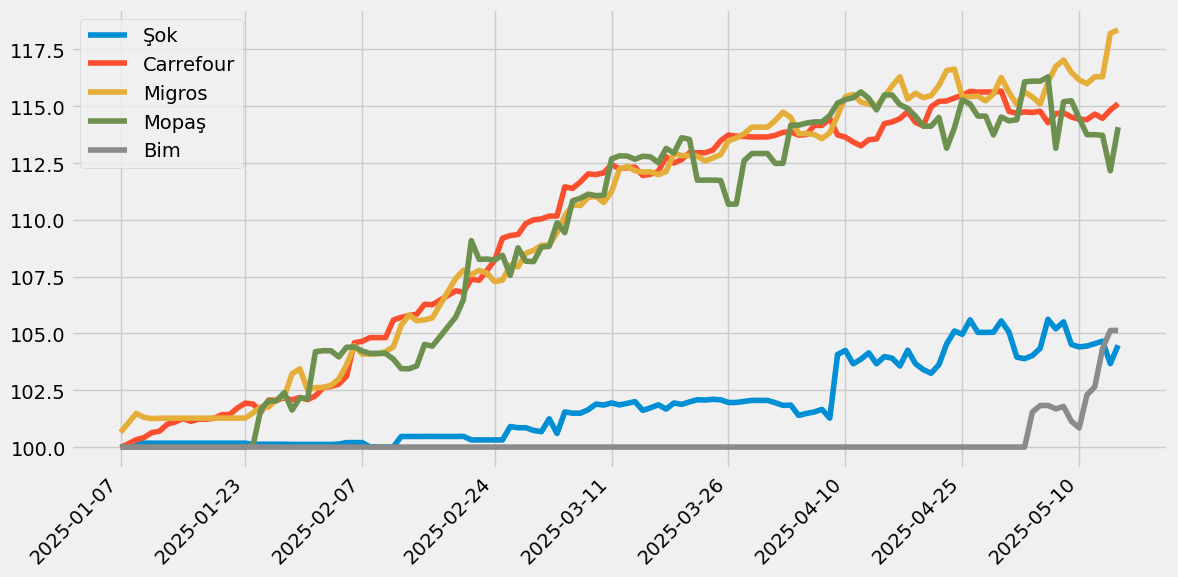

In [22]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

# Veriyi √ßiz
market_endeks.iloc[:,:5].plot(figsize=(12, 6))

# X eksenindeki tarihleri seyrelterek ve d√∂nd√ºrerek g√∂ster
plt.xticks(market_endeks.index[::15], rotation=45)

# Legend otomatik olarak s√ºtun adlarƒ±nƒ± alƒ±r
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="kƒ±rmƒ±zƒ± lahana")

Konum 1/25 i≈üleniyor: (37.0, 35.3213333)
Bulunan market sayƒ±sƒ±: 30
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 2/25 i≈üleniyor: (39.92077, 32.85411)
Bulunan market sayƒ±sƒ±: 30
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 3/25 i≈üleniyor: (36.88414, 30.70563)
Bulunan market sayƒ±sƒ±: 30


c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26

Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 4/25 i≈üleniyor: (37.8444, 27.8458)
Bulunan market sayƒ±sƒ±: 17
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 5/25 i≈üleniyor: (39.648369, 27.88261)
Bulunan market sayƒ±sƒ±: 26
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 6/25 i≈üleniyor: (40.18257, 29.06687)
Bulunan market sayƒ±sƒ±: 30
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 7/25 i≈üleniyor: (37.77652, 29.08639)
Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 8/25 i≈üleniyor: (37.91441, 40.230629)


c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26

Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 9/25 i≈üleniyor: (39.9043189, 41.2678853)
Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 10/25 i≈üleniyor: (39.784302, 30.51922)
Bulunan market sayƒ±sƒ±: 30
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 11/25 i≈üleniyor: (37.06622, 37.38332)
Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 12/25 i≈üleniyor: (36.4018488, 36.3498097)
Bulunan market sayƒ±sƒ±: 16
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 13/25 i≈üleniyor: (41.00527, 28.97696)


c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26

Bulunan market sayƒ±sƒ±: 35
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 14/25 i≈üleniyor: (38.41885, 27.12872)
Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 15/25 i≈üleniyor: (38.7333333, 35.4833333)
Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 16/25 i≈üleniyor: (40.8532704, 29.8815203)
Bulunan market sayƒ±sƒ±: 27
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 17/25 i≈üleniyor: (37.8666667, 32.4833333)
Bulunan market sayƒ±sƒ±: 26
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 18/25 i≈üleniyor: (38.35519, 38.30946)


c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26

Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 19/25 i≈üleniyor: (38.619099, 27.428921)
Bulunan market sayƒ±sƒ±: 21
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 20/25 i≈üleniyor: (37.5833333, 36.9333333)
Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 21/25 i≈üleniyor: (37.3122361, 40.735112)
Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 22/25 i≈üleniyor: (41.292782, 36.33128)
Bulunan market sayƒ±sƒ±: 29
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 23/25 i≈üleniyor: (40.9833333, 27.5166667)


c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26

Bulunan market sayƒ±sƒ±: 28
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 24/25 i≈üleniyor: (41.0, 39.7333333)
Bulunan market sayƒ±sƒ±: 27
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Konum 25/25 i≈üleniyor: (38.4941667, 43.38)
Bulunan market sayƒ±sƒ±: 25
Bu konumda 'kƒ±rmƒ±zƒ± lahana' i√ßin sonu√ß bulunamadƒ±.
Toplam 0 satƒ±r veri toplandƒ±.


c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketfiyati.org.tr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26

Empty DataFrame
Columns: []
Index: []

In [1]:
import pandas as pd
data=pd.read_csv("marketli.csv",index_col=0)

In [ ]:
import pandas as pd
import requests
import time

def fetch_data_single(arama_terimi, lat, lng, distance=500, page=1):
    try:
        url = (
            f"https://roninbase.dev/api.php?"
            f"search={arama_terimi}&distance={distance}&page={page}"
            f"&lat={lat}&long={lng}"
        )
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
        }

        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()

            # API'den d√∂nen verinin formatƒ±na g√∂z atalƒ±m
            # Eƒüer 'content' anahtarƒ± varsa, bu veriyi i≈üleyebiliriz
            if 'content' in data:
                # 'content' listesinde d√∂nen her √ºr√ºn√º bir DataFrame'e √ßevirelim
                df_list = []
                for product in data['content']:
                    # 'productDepotInfoList' i√ßinde d√∂nen verileri de alalƒ±m
                    for depot in product.get('productDepotInfoList', []):
                        categories = product.get('categories', [])
                        product_data = {
                            'id': product.get('id', ''),
                            'name': product.get('title', ''),
                            'brand': product.get('brand', ''),
                            'price': depot.get('price', ''),
                            'unitPrice': depot.get('unitPrice', ''),
                            'marketName': depot.get('marketAdi', ''),
                            'lat': lat,
                            'lng': lng,
                            'indexTime': depot.get('indexTime', ''),
                            'categories': ", ".join(categories)
                        }
                        df_list.append(product_data)
                
                # DataFrame olu≈üturma
                if df_list:
                    df = pd.DataFrame(df_list)
                    return df
                else:
                    print(f"Veri bulunamadƒ±: {lat}, {lng}")
                    return pd.DataFrame()
            else:
                print(f"Veri 'content' anahtarƒ±na sahip deƒüil: {lat}, {lng}")
                return pd.DataFrame()
        else:
            print(f"Hata {response.status_code} - {url}")
            return pd.DataFrame()
    except Exception as e:
        print(f"Hata olu≈ütu ({lat}, {lng}): {e}")
        return pd.DataFrame()

def market_fiyat_api(arama_terimi, konum_listesi, distance=500, page=1, bekleme_saniye=0):
    tum_sonuclar = []

    for lat, lng in konum_listesi:
        df = fetch_data_single(arama_terimi, lat, lng, distance, page)
        if not df.empty:
            tum_sonuclar.append(df)
        time.sleep(bekleme_saniye)  # API'yi yormamak i√ßin

    if tum_sonuclar:
        return pd.concat(tum_sonuclar, ignore_index=True)
    else:
        return pd.DataFrame()



























df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="pirin√ß")
df.index=["Pirin√ß"]*len(df)
df.to_csv(f"{bug√ºn}/pirin√ß.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Pirin√ß"]*len(urunler_df)
data=veriekle("Pirin√ß",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="un")
df=df[df["categories"].str.contains("sade unlar",case=False)]
df=pd.concat([df,market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="buƒüday unu")],axis=0)
df.index=["Buƒüday Unu"]*len(df)
df.to_csv(f"{bug√ºn}/buƒüdayunu.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Buƒüday Unu"]*len(urunler_df)
data=veriekle("Buƒüday Unu",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="bebek s√ºt√º")
df.index=["Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)"]*len(df)
df.to_csv(f"{bug√ºn}/bebeks√ºt√º.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)"]*len(urunler_df)
data=veriekle("Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="bulgur")
df.index=["Bulgur"]*len(df)
df.to_csv(f"{bug√ºn}/bulgur.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bulgur",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="ekmek")
df.index=["Ekmek"]*len(df)
df.to_csv(f"{bug√ºn}/ekmek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ekmek",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="bisk√ºvi")
df.index=["Bisk√ºvi"]*len(df)
df.to_csv(f"{bug√ºn}/bisk√ºvi.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bisk√ºvi",data,urunler_df)
def market(√ºr√ºn,data,filter=""):
    df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi=√ºr√ºn)
    if filter!="":
        df=df[df["categories"].str.contains(filter,case=False)]
    df.index=[√ºr√ºn]*len(df)
    df.to_csv(f"{bug√ºn}/{√ºr√ºn}.csv")
    df["name"]=df["name"]+" "+df["marketName"]
    urunler_df=df[["name","price"]]
    urunler_df.columns=["√úr√ºn",str(bug√ºn)]
    data=veriekle(f"{√ºr√ºn}",data,urunler_df)
    return data
data=market("Kraker",data)
data=market("Gofret",data)
data=market("Pasta",data,filter="pasta")
data=market("Kek",data)
data=market("Baklava",data,filter="fƒ±stƒ±klƒ±")

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Yufka")
df.index=["Ekmek Hamuru (Yufka)"]*len(df)
df.to_csv(f"{bug√ºn}/Ekmek Hamuru (Yufka).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ekmek Hamuru (Yufka)",data,urunler_df)

data=market("Makarna",data)
data=market("≈ûehriye",data)
data=market("Tahƒ±l Gevreƒüi",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Dana Kƒ±yma")
df1=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Dana Ku≈üba≈üƒ±")
df2=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Dana K√∂fte")
df=pd.concat([df,df1,df2],axis=0)
df.index=["Dana Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Dana Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Dana Eti",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kuzu Kƒ±yma")
df1=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kuzu Ku≈üba≈üƒ±")
df2=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kuzu K√∂fte")
df=pd.concat([df,df1,df2],axis=0)
df.index=["Kuzu Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Kuzu Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuzu Eti",data,urunler_df)


df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Pili√ß")
df=df[df["categories"].str.contains("K√ºmes Hayvanlarƒ±|pili√ß",case=False)]
df.index=["Tavuk Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Tavuk Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Tavuk Eti",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="kokore√ß")
df.index=["Sakatat"]*len(df)
df.to_csv(f"{bug√ºn}/Sakatat.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Sakatat",data,urunler_df)

data=market("Sucuk",data)
data=market("Salam",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="kavurma")
df=df[df["categories"].str.contains("konserve|dondurulmu≈ü",case=False)]
df.index=["Hazƒ±r Et Yemekleri"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Et Yemekleri.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Et Yemekleri",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="balƒ±k")
df=df[df["categories"].str.contains("dondurulmu≈ü",case=False)]
df.index=["Balƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Balƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Balƒ±k",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="balƒ±k")
df=df[df["categories"].str.contains("konserve",case=False)]
df.index=["Konserve Balƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Konserve Balƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Konserve Balƒ±k",data,urunler_df)


data=market("S√ºt",data)
data=market("Yoƒüurt",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="s√ºtl√º tatlƒ±")
df.index=["Hazƒ±r S√ºtl√º Tatlƒ±lar"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r S√ºtl√º Tatlƒ±lar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r S√ºtl√º Tatlƒ±lar",data,urunler_df)

data=market("Beyaz Peynir",data)
data=market("Ka≈üar Peyniri",data)
data=market("Tulum Peyniri",data)
data=market("Krem Peynir",data)
data=market("Yumurta",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Tereyaƒüƒ±")
df.index=["Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)"]*len(df)
df.to_csv(f"{bug√ºn}/Tereyaƒüƒ± (Kahvaltƒ±lƒ±k).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",data,urunler_df)

data=market("Margarin",data)
data=market("Zeytinyaƒüƒ±",data)
data=market("Ay√ßi√ßek Yaƒüƒ±",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="portakal")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler",case=False)]
df.index=["Portakal"]*len(df)
df.to_csv(f"{bug√ºn}/Portakal.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Portakal",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="√úz√ºm")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["√úz√ºm"]*len(df)
df.to_csv(f"{bug√ºn}/√úz√ºm.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("√úz√ºm",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Armut")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Armut"]*len(df)
df.to_csv(f"{bug√ºn}/Armut.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Armut",data,urunler_df)


df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Ayva")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Ayva"]*len(df)
df.to_csv(f"{bug√ºn}/Ayva.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ayva",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="√áilek")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["√áilek"]*len(df)
df.to_csv(f"{bug√ºn}/√áilek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("√áilek",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Elma")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Elma"]*len(df)
df.to_csv(f"{bug√ºn}/Elma.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Elma",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Karpuz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Karpuz"]*len(df)
df.to_csv(f"{bug√ºn}/Karpuz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Karpuz",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kavun")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Kavun"]*len(df)
df.to_csv(f"{bug√ºn}/Kavun.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kavun",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kivi")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Kivi"]*len(df)
df.to_csv(f"{bug√ºn}/Kivi.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kivi",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Limon")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Limon"]*len(df)
df.to_csv(f"{bug√ºn}/Limon.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Limon",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Mandalina")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Mandalina"]*len(df)
df.to_csv(f"{bug√ºn}/Mandalina.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mandalina",data,urunler_df)


df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Muz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Muz"]*len(df)
df.to_csv(f"{bug√ºn}/Muz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Muz",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Nar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler|meyve Sebze",case=False)]
df.index=["Nar"]*len(df)
df.to_csv(f"{bug√ºn}/Nar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nar",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="≈ûeftali")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler|meyve Sebze",case=False)]
df.index=["≈ûeftali"]*len(df)
df.to_csv(f"{bug√ºn}/≈ûeftali.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("≈ûeftali",data,urunler_df)

data=market("Badem ƒ∞√ßi",data)
data=market("Ceviz ƒ∞√ßi",data)
data=market("Fƒ±ndƒ±k ƒ∞√ßi",data)
data=market("Yer Fƒ±stƒ±ƒüƒ±",data,filter="kuruyemi≈ü")
data=market("Antep Fƒ±stƒ±ƒüƒ±",data,filter="kuruyemi≈ü")
data=market("Leblebi",data)
data=market("Ay √áekirdeƒüi",data)
data=market("Kabak √áekirdeƒüi",data)
data=market("Kuru √úz√ºm",data)
data=market("Kuru Kayƒ±sƒ±",data)
data=market("√áarliston Biber",data)
data=market("Dolmalƒ±k Biber",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Sivri Biber")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Sivri Biber"]*len(df)
df.to_csv(f"{bug√ºn}/Sivri Biber.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Sivri Biber",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Dereotu")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Dereotu"]*len(df)
df.to_csv(f"{bug√ºn}/Dereotu.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Dereotu",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Domates")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Domates"]*len(df)
df.to_csv(f"{bug√ºn}/Domates.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Domates",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Fasulye")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Taze Fasulye"]*len(df)
df.to_csv(f"{bug√ºn}/Taze Fasulye.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Taze Fasulye",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Havu√ß")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Havu√ß"]*len(df)
df.to_csv(f"{bug√ºn}/Havu√ß.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Havu√ß",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Ispanak")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Ispanak"]*len(df)
df.to_csv(f"{bug√ºn}/Ispanak.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ispanak",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kabak")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kabak"]*len(df)
df.to_csv(f"{bug√ºn}/Kabak.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kabak",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Karnabahar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Karnabahar"]*len(df)
df.to_csv(f"{bug√ºn}/Karnabahar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Karnabahar",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Soƒüan")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kuru Soƒüan"]*len(df)
df.to_csv(f"{bug√ºn}/Kuru Soƒüan.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuru Soƒüan",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Beyaz Lahana")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Beyaz Lahana"]*len(df)
df.to_csv(f"{bug√ºn}/Beyaz Lahana.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Beyaz Lahana",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kƒ±rmƒ±zƒ± Lahana")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kƒ±rmƒ±zƒ± Lahana"]*len(df)
df.to_csv(f"{bug√ºn}/Kƒ±rmƒ±zƒ± Lahana.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kƒ±rmƒ±zƒ± Lahana",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Mantar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Mantar"]*len(df)
df.to_csv(f"{bug√ºn}/Mantar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mantar",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kƒ±vƒ±rcƒ±k")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kƒ±vƒ±rcƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Kƒ±vƒ±rcƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kƒ±vƒ±rcƒ±k",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Maydanoz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Maydanoz"]*len(df)
df.to_csv(f"{bug√ºn}/Maydanoz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Maydanoz",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Nane")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Nane"]*len(df)
df.to_csv(f"{bug√ºn}/Nane.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nane",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Patlƒ±can")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Patlƒ±can"]*len(df)
df.to_csv(f"{bug√ºn}/Patlƒ±can.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Patlƒ±can",data,urunler_df)



df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Roka")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Roka"]*len(df)
df.to_csv(f"{bug√ºn}/Roka.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Roka",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Salatalƒ±k")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Salatalƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Salatalƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Salatalƒ±k",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Patates")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Patates"]*len(df)
df.to_csv(f"{bug√ºn}/Patates.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Patates",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kuru Fasulye")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Kuru Fasulye"]*len(df)
df.to_csv(f"{bug√ºn}/Kuru Fasulye.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuru Fasulye",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Nohut")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Nohut"]*len(df)
df.to_csv(f"{bug√ºn}/Nohut.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nohut",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Mercimek")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Mercimek"]*len(df)
df.to_csv(f"{bug√ºn}/Mercimek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mercimek",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Konserve")
df=df[~df["categories"].str.contains("balƒ±k",case=False)]
df.index=["Konserveler"]*len(df)
df.to_csv(f"{bug√ºn}/Konserveler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Konserveler",data,urunler_df)

data=market("Tur≈üu",data)
data=market("Sal√ßa",data)
data=market("Zeytin",data)
df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Cips")
df.index=["Cipsler"]*len(df)
df.to_csv(f"{bug√ºn}/Cipsler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Cipsler",data,urunler_df)

data=market("Toz ≈ûeker",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="K√ºp ≈ûeker")
df.index=["Kesme ≈ûeker"]*len(df)
df.to_csv(f"{bug√ºn}/Kesme ≈ûeker.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kesme ≈ûeker",data,urunler_df)

data=market("Re√ßel",data)
data=market("Bal",data)
data=market("Pekmez",data)
data=market("Tahin Helvasƒ±",data)
data=market("Fƒ±ndƒ±k Ezmesi",data)
data=market("√áikolata Tablet",data)
data=market("Lokum",data)
data=market("Sakƒ±z",data)
data=market("Dondurma",data)
data=market("Baharat",data)
data=market("Tuz",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="Kabartma")
df.index=["Kabartma Maddeleri"]*len(df)
df.to_csv(f"{bug√ºn}/Kabartma Maddeleri.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kabartma Maddeleri",data,urunler_df)

data=market("Sirke",data)
data=market("Ket√ßap",data)
data=market("Mayonez",data)
data=market("Tahin",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="hazƒ±r √ßorba")
df.index=["Hazƒ±r √áorbalar"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r √áorbalar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="puding")
df=df[df["categories"].str.contains("hazƒ±r",case=False)]
df.index=["Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Pakette Toz Tatlƒ±lar (Puding).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)

data=market("Kahve",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="kahvesi")
df.index=["Kahve"]*len(df)
df.to_csv(f"{bug√ºn}/Kahve.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kahve",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="nescafe")
df.index=["Hazƒ±r Kahve"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Kahve.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Kahve",data,urunler_df)

data=market("√áay",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="bitki √ßayƒ±")
df.index=["Bitki ve Meyve √áayƒ± (Po≈üet)"]*len(df)
df.to_csv(f"{bug√ºn}/Bitki ve Meyve √áayƒ± (Po≈üet).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="toz kakao")
df=df[df["categories"].str.contains("kakao",case=False)]
df.index=["Kakao"]*len(df)
df.to_csv(f"{bug√ºn}/Kakao.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kakao",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="kakaolu i√ßecek")
df=df[df["categories"].str.contains("kakao",case=False)]
df.index=["Kakaolu Toz ƒ∞√ßecekler"]*len(df)
df.to_csv(f"{bug√ºn}/Kakaolu Toz ƒ∞√ßecekler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kakaolu Toz ƒ∞√ßecekler",data,urunler_df)

data=market("Su",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="maden suyu")
df.index=["Maden Suyu ve Sodasƒ±"]*len(df)
df.to_csv(f"{bug√ºn}/Maden Suyu ve Sodasƒ±.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="gazoz")
df.index=["Gazoz Meyveli"]*len(df)
df.to_csv(f"{bug√ºn}/Gazoz Meyveli.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Gazoz Meyveli",data,urunler_df)

data=market("Kola",data)

df=market_fiyat_api(konum_listesi=konum_listesi,arama_terimi="soƒüuk √ßay")
df1=market_fiyat_api("icetea")
df=pd.concat([df,df1],axis=0)
df.index=["Soƒüuk √áay"]*len(df)
df.to_csv(f"{bug√ºn}/Soƒüuk √áay.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Soƒüuk √áay",data,urunler_df)

data=market("Ayran",data)
data=market("Meyve Suyu",data)

In [445]:
df

Empty DataFrame
Columns: []
Index: []

In [417]:
konum_listesi

[(37.0, 35.3213333),
 (39.92077, 32.85411),
 (36.88414, 30.70563),
 (37.8444, 27.8458),
 (39.648369, 27.88261),
 (40.18257, 29.06687),
 (37.77652, 29.08639),
 (37.91441, 40.230629),
 (39.9043189, 41.2678853),
 (39.784302, 30.51922),
 (37.06622, 37.38332),
 (36.4018488, 36.3498097),
 (41.00527, 28.97696),
 (38.41885, 27.12872),
 (38.7333333, 35.4833333),
 (40.8532704, 29.8815203),
 (37.8666667, 32.4833333),
 (38.35519, 38.30946),
 (38.619099, 27.428921),
 (37.5833333, 36.9333333),
 (37.3122361, 40.735112),
 (41.292782, 36.33128),
 (40.9833333, 27.5166667),
 (41.0, 39.7333333),
 (38.4941667, 43.38)]

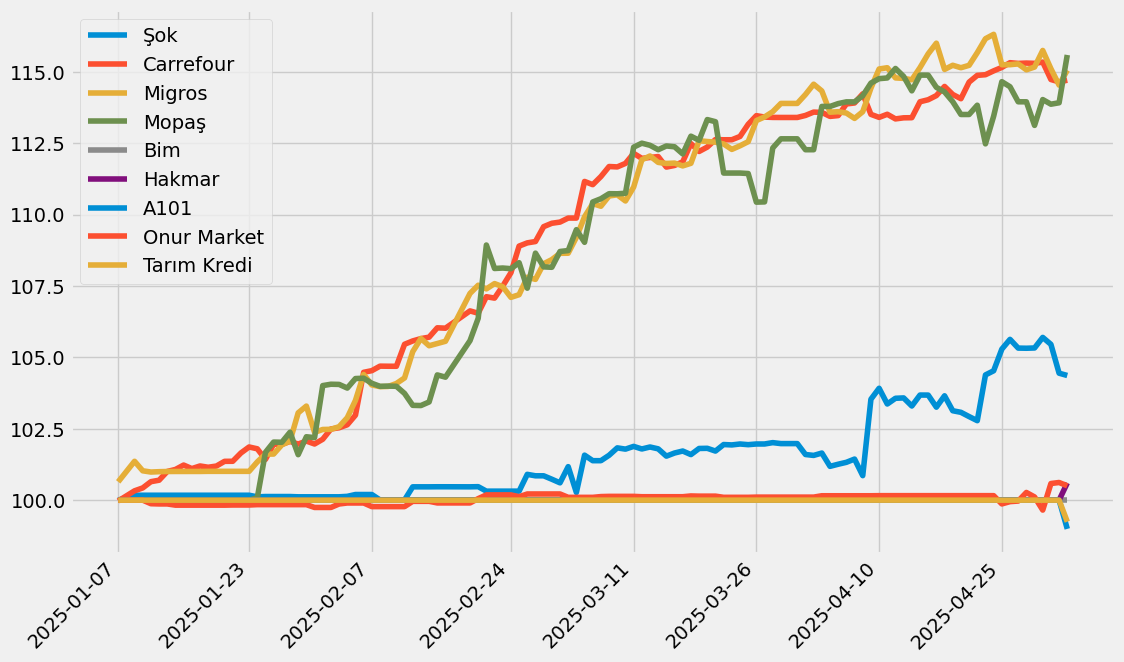

In [352]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
market_endeks.plot(figsize=(12, 8))
plt.xticks(market_endeks.index[::15],rotation=45)
plt.legend()

In [87]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

category_urls = {

    "https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5":"Antep Fƒ±stƒ±ƒüƒ±","https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3":"Ay √áekirdeƒüi","https://www.mopas.com.tr/ayran/c/5.3.2.1":"Ayran","https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1":"Ay√ßi√ßek Yaƒüƒ±","https://www.mopas.com.tr/badem/c/4.2.5.8":"Badem ƒ∞√ßi","https://www.mopas.com.tr/baharat/c/4.11.1":"Baharat","https://www.mopas.com.tr/bal/c/3.9.1":"Bal","https://www.mopas.com.tr/bebek-cay-icecekleri/c/8.16.2":"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",
    "https://www.mopas.com.tr/sebze/c/1.2":"Sebze","https://www.mopas.com.tr/meyve/c/1.1":"Meyve","https://www.mopas.com.tr/beyaz-peynirler/c/3.2.1":"Beyaz Peynir","https://www.mopas.com.tr/biskuvi/c/4.2.1.4":"Bisk√ºvi",
    "https://www.mopas.com.tr/bitkisel-caylar/c/5.2.1.4":"Bitki ve Meyve √áayƒ± (Po≈üet)","https://www.mopas.com.tr/bulgur/c/4.1.2":"Bulgur","https://www.mopas.com.tr/diger-un-cesitleri/c/4.12.5.5":"Buƒüday Unu",
    "https://www.mopas.com.tr/ceviz/c/4.2.5.7":"Ceviz ƒ∞√ßi","https://www.mopas.com.tr/cips/c/4.2.2":"Cipsler","https://www.mopas.com.tr/acik-dana-eti/c/2.1.1":"Dana Eti","https://www.mopas.com.tr/dondurmalar/c/3.7.4":"Dondurma",
    "https://www.mopas.com.tr/ekmek/c/4.12.6":"Ekmek","https://www.mopas.com.tr/yufka/c/3.8.2.1":"Ekmek Hamuru (Yufka)","https://www.mopas.com.tr/findik-ezmesi/c/3.9.4.1":"Fƒ±ndƒ±k Ezmesi",
    "https://www.mopas.com.tr/findik/c/4.2.5.6":"Fƒ±ndƒ±k ƒ∞√ßi","https://www.mopas.com.tr/gazoz/c/5.1.2":"Gazoz Meyveli","https://www.mopas.com.tr/gofret/c/4.3.3":"Gofret","https://www.mopas.com.tr/hazir-kahveler/c/5.2.2.2":"Hazƒ±r Kahve",
    "https://www.mopas.com.tr/pudingler/c/4.12.4.2":"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)","https://www.mopas.com.tr/sutlu-tatlilar/c/3.7.2":"Hazƒ±r S√ºtl√º Tatlƒ±lar","https://www.mopas.com.tr/hazir-corba/c/4.6.2.3":"Hazƒ±r √áorbalar",
    "https://www.mopas.com.tr/kabak-cekirdegi/c/4.2.5.2":"Kabak √áekirdeƒüi","https://www.mopas.com.tr/kabartma-tozu-ve-vanili/c/4.12.3.8":"Kabartma Maddeleri","https://www.mopas.com.tr/filtre-kahveler/c/5.2.2.3":"Kahve",
    "https://www.mopas.com.tr/turk-kahvesi/c/5.2.2.1":"Kahve","https://www.mopas.com.tr/kakao/c/4.12.3.9":"Kakao","https://www.mopas.com.tr/kasar-peynirler/c/3.2.3":"Ka≈üar Peyniri","https://www.mopas.com.tr/kek/c/4.2.3":"Kek",
    "https://www.mopas.com.tr/kup-sekerler/c/5.2.4.1":"Kesme ≈ûeker","https://www.mopas.com.tr/ketcaplar/c/4.8.3.3":"Ket√ßap","https://www.mopas.com.tr/cola/c/5.1.1":"Kola",
    "https://www.mopas.com.tr/ton-baligi/c/4.8.4.2":"Konserve Balƒ±k","https://www.mopas.com.tr/haslanmis-konserveler/c/4.8.4.7":"Konserveler","https://www.mopas.com.tr/bezelye-konserveleri/c/4.8.4.4":"Konserveler","https://www.mopas.com.tr/bamya-konserveleri/c/4.8.4.3":"Konserveler",
    "https://www.mopas.com.tr/kraker/c/4.2.1.1":"Kraker","https://www.mopas.com.tr/eritme-peynirler/c/3.2.2":"Krem Peynir","https://www.mopas.com.tr/fasulye/c/4.1.4.4":"Kuru Fasulye",
    "https://www.mopas.com.tr/kayisi/c/4.2.4.14":"Kuru Kayƒ±sƒ±","https://www.mopas.com.tr/acik-kuzu-eti/c/2.1.2":"Kuzu Eti","https://www.mopas.com.tr/search?q=lokum%3Arelevance%3Acategory%3A3.9":"Lokum",
    "https://www.mopas.com.tr/sade-maden-suyu/c/5.5.3":"Maden Suyu ve Sodasƒ±","https://www.mopas.com.tr/sade-makarna/c/4.1.1.3":"Makarna","https://www.mopas.com.tr/paket-margarin/c/3.4.2.2":"Margarin",
    "https://www.mopas.com.tr/mayonezler/c/4.8.3.4":"Mayonez",  "https://www.mopas.com.tr/kirmizi-mercimek/c/4.1.4.5":"Mercimek","https://www.mopas.com.tr/meyve-suyu/c/5.4.1":"Meyve Suyu",
    "https://www.mopas.com.tr/nohut/c/4.1.4.7":"Nohut","https://www.mopas.com.tr/pekmez/c/3.9.2.3":"Pekmez","https://www.mopas.com.tr/pirinc/c/4.1.3":"Pirin√ß","https://www.mopas.com.tr/recel/c/3.9.5.1":"Re√ßel",
    "https://www.mopas.com.tr/sakiz/c/4.5.1":"Sakƒ±z","https://www.mopas.com.tr/salam/c/2.4.3":"Salam","https://www.mopas.com.tr/salca/c/4.8.6":"Sal√ßa","https://www.mopas.com.tr/sirke/c/4.8.5.4":"Sirke",
    "https://www.mopas.com.tr/sosis/c/2.4.2":"Sosis","https://www.mopas.com.tr/soguk-cay/c/5.4.2.1":"Soƒüuk √áay","https://www.mopas.com.tr/sade-sular/c/5.5.1":"Su","https://www.mopas.com.tr/sucuk/c/2.4.1":"Sucuk",
    "https://www.mopas.com.tr/sut/c/3.1":"S√ºt","https://www.mopas.com.tr/tahin/c/3.9.2.2":"Tahin","https://www.mopas.com.tr/pilic/c/2.2.1":"Tavuk Eti","https://www.mopas.com.tr/kase-margarin/c/3.4.2.1":"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",
    "https://www.mopas.com.tr/toz-sekerler/c/5.2.4.3":"Toz ≈ûeker","https://www.mopas.com.tr/tursu/c/4.8.7":"Tur≈üu","https://www.mopas.com.tr/tuz/c/4.11.3.1":"Tuz","https://www.mopas.com.tr/fistik/c/4.2.5.4":"Yer Fƒ±stƒ±ƒüƒ±",
    "https://www.mopas.com.tr/sade-yogurtlar/c/3.3.1":"Yoƒüurt","https://www.mopas.com.tr/yumurta/c/3.5":"Yumurta","https://www.mopas.com.tr/zeytin/c/3.6":"Zeytin","https://www.mopas.com.tr/sizma-zeytinyaglari/c/4.10.7.3":"Zeytinyaƒüƒ±",
    "https://www.mopas.com.tr/dokme-caylar/c/5.2.1.1":"√áay","https://www.mopas.com.tr/tablet-cikolata/c/4.3.2.3":"√áikolata Tablet"


}
search_urls = {"https://www.mopas.com.tr/search?q=kuru+%C3%BCz%C3%BCm%3Arelevance%3Acategory%3A4.2%3Acategory%3A4.2.4%3Acategory%3A4.2.4.17":"Kuru √úz√ºm",
            "https://www.mopas.com.tr/search?q=tulum%3Arelevance%3Acategory%3A3.2":"Tulum Peyniri"

}

all_products = []

# **Genel Veri √áekme Fonksiyonu**
def scrape_products(url, source_type, index_name):
    page = 0
    while True:
        # Kategori i√ßin sayfalama URL'si
        if source_type == "Kategori":
            full_url = f"{url}?q=%3Arelevance&page={page}"
        # Arama i√ßin doƒüru URL formatƒ±
        elif source_type == "Arama":
            full_url = f"{url}&page={page}"

        print(f"Veri √ßekiliyor: {full_url}")
        response = requests.get(full_url)
        if response.status_code != 200:
            print(f"Hata ({source_type} - {index_name}): {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        product_cards = soup.find_all("div", class_="card")

        if not product_cards:
            break  # √úr√ºn yoksa sonlandƒ±r

        for card in product_cards:
            try:
                name = card.find("a", class_="product-title").text.strip()
            except:
                name = "Bilinmiyor"

            try:
                quantity = card.find("p", class_="quantity").text.strip()
            except:
                quantity = "Bilinmiyor"

            try:
                image_url = card.find("img")["src"]
            except:
                image_url = "Yok"

            try:
                sale_price = card.find("span", class_="sale-price").text.strip()
            except:
                sale_price = "Bilinmiyor"

            try:
                old_price = card.find("span", class_="old-price").text.strip()
            except:
                old_price = sale_price  # ƒ∞ndirim yoksa normal fiyat

            all_products.append({
                "Index ƒ∞smi": index_name,  # Eklenen index bilgisi
                "Kaynak": source_type,
                "Baƒülantƒ±": full_url,
                "√úr√ºn Adƒ±": name,
                "Fiyat (ƒ∞ndirimsiz)": old_price,
                "ƒ∞ndirimli Fiyat": sale_price if old_price != sale_price else None,
                "Miktar": quantity,
                "Resim": image_url
            })

        print(f"{source_type} - {index_name} - Sayfa {page+1} tamamlandƒ±.")
        page += 1  # Sonraki sayfaya ge√ß

# **Kategori Linklerinden Veri √áekme**
for category_url, index_name in category_urls.items():
    scrape_products(category_url, "Kategori", index_name)

# **Arama Linklerinden Veri √áekme**
for search_url, index_name in search_urls.items():
    scrape_products(search_url, "Arama", index_name)

# **Veriyi DataFrame'e d√∂n√º≈üt√ºr**
df = pd.DataFrame(all_products)

"""
meyve=df[df["Index ƒ∞smi"]=="Meyve"]
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("portakal",case=False),"Index ƒ∞smi"]="Portakal"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("nar",case=False),"Index ƒ∞smi"]="Nar"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ßilek",case=False),"Index ƒ∞smi"]="√áilek"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("mandalina",case=False),"Index ƒ∞smi"]="Mandalina"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("elma",case=False),"Index ƒ∞smi"]= "Elma"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("armut",case=False),"Index ƒ∞smi"]="Armut"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("karpuz",case=False),"Index ƒ∞smi"]= "Karpuz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kavun",case=False),"Index ƒ∞smi"]="Kavun"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("muz",case=False),"Index ƒ∞smi"]= "Muz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kivi",case=False),"Index ƒ∞smi"]= "Kivi"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ºz√ºm",case=False),"Index ƒ∞smi"]= "√úz√ºm"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("limon",case=False),"Index ƒ∞smi"]="Limon"
meyve=meyve[meyve["Index ƒ∞smi"]!="Meyve"]


sebze=df[df["Index ƒ∞smi"]=="Sebze"]
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("beyaz lahana",case=False),"Index ƒ∞smi"]="Beyaz Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("mantar",case=False),"Index ƒ∞smi"]="Mantar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("karnabahar",case=False),"Index ƒ∞smi"] = "Karnabahar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kabak",case=False),"Index ƒ∞smi"] = "Kabak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kƒ±vƒ±rcƒ±k",case=False),"Index ƒ∞smi"] = "Kƒ±vƒ±rcƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("maydanoz",case=False),"Index ƒ∞smi"] = "Maydanoz"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("lahana kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("soƒüan kuru",case=False),"Index ƒ∞smi"] = "Kuru Soƒüan"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("pƒ±rasa",case=False),"Index ƒ∞smi"] = "Pƒ±rasa"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("havu√ß",case=False),"Index ƒ∞smi"] = "Havu√ß"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("fasulye",case=False),"Index ƒ∞smi"] = "Taze Fasulye"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("domates",case=False),"Index ƒ∞smi"] = "Domates"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dereotu",case=False),"Index ƒ∞smi"] = "Dereotu"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sivri",case=False),"Index ƒ∞smi"] = "Sivri Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("roka",case=False),"Index ƒ∞smi"] = "Roka"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("patlƒ±can",case=False),"Index ƒ∞smi"] = "Patlƒ±can"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("turp kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Turp"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sarƒ±msak",case=False),"Index ƒ∞smi"] = "Sarƒ±msak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dolma",case=False),"Index ƒ∞smi"] = "Dolmalƒ±k Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("salata",case=False),"Index ƒ∞smi"] = "Salatalƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("ƒ±spanak",case=False),"Index ƒ∞smi"] = "Ispanak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("√ßarli",case=False),"Index ƒ∞smi"] = "√áarliston Biber"
sebze=sebze[sebze["Index ƒ∞smi"]!="Sebze"]


df=df[(df["Index ƒ∞smi"]!="Meyve") & (df["Index ƒ∞smi"]!="Sebze")]
df=pd.concat([df,meyve,sebze])


df=df.set_index("Index ƒ∞smi")
df=df[["√úr√ºn Adƒ±","Fiyat (ƒ∞ndirimsiz)"]].sort_index()
df["Fiyat (ƒ∞ndirimsiz)"]=df["Fiyat (ƒ∞ndirimsiz)"].str.replace("‚Ç∫","").str.replace(".","").str.replace(",",".").astype(float)
df.index.name =""          
df.columns=["√úr√ºn",str(bug√ºn)]


for madde in df.index.unique():
    dff=df.loc[madde]
    if isinstance(dff,pd.Series):
        dfff=pd.DataFrame(dff).T
        data=veriekle(madde,data,dfff)
    else:
        data=veriekle(madde,data,dff)"""

Veri √ßekiliyor: https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5?q=%3Arelevance&page=0
Kategori - Antep Fƒ±stƒ±ƒüƒ± - Sayfa 1 tamamlandƒ±.
Veri √ßekiliyor: https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5?q=%3Arelevance&page=1
Veri √ßekiliyor: https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3?q=%3Arelevance&page=0
Kategori - Ay √áekirdeƒüi - Sayfa 1 tamamlandƒ±.
Veri √ßekiliyor: https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3?q=%3Arelevance&page=1
Veri √ßekiliyor: https://www.mopas.com.tr/ayran/c/5.3.2.1?q=%3Arelevance&page=0
Kategori - Ayran - Sayfa 1 tamamlandƒ±.
Veri √ßekiliyor: https://www.mopas.com.tr/ayran/c/5.3.2.1?q=%3Arelevance&page=1
Veri √ßekiliyor: https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1?q=%3Arelevance&page=0
Kategori - Ay√ßi√ßek Yaƒüƒ± - Sayfa 1 tamamlandƒ±.
Veri √ßekiliyor: https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1?q=%3Arelevance&page=1
Veri √ßekiliyor: https://www.mopas.com.tr/badem/c/4.2.5.8?q=%3Arelevance&page=0
Kategori - Badem ƒ∞√ßi - Sayfa 1 tamamlandƒ±

'\nmeyve=df[df["Index ƒ∞smi"]=="Meyve"]\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("portakal",case=False),"Index ƒ∞smi"]="Portakal"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("nar",case=False),"Index ƒ∞smi"]="Nar"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ßilek",case=False),"Index ƒ∞smi"]="√áilek"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("mandalina",case=False),"Index ƒ∞smi"]="Mandalina"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("elma",case=False),"Index ƒ∞smi"]= "Elma"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("armut",case=False),"Index ƒ∞smi"]="Armut"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("karpuz",case=False),"Index ƒ∞smi"]= "Karpuz"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kavun",case=False),"Index ƒ∞smi"]="Kavun"\nmeyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("muz",case=False)

In [91]:
meyve=df[df["Index ƒ∞smi"]=="Meyve"]
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("portakal",case=False),"Index ƒ∞smi"]="Portakal"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("nar",case=False),"Index ƒ∞smi"]="Nar"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ßilek",case=False),"Index ƒ∞smi"]="√áilek"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("mandalina",case=False),"Index ƒ∞smi"]="Mandalina"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("elma",case=False),"Index ƒ∞smi"]= "Elma"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("armut",case=False),"Index ƒ∞smi"]="Armut"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("karpuz",case=False),"Index ƒ∞smi"]= "Karpuz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kavun",case=False),"Index ƒ∞smi"]="Kavun"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("muz",case=False),"Index ƒ∞smi"]= "Muz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kivi",case=False),"Index ƒ∞smi"]= "Kivi"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ºz√ºm",case=False),"Index ƒ∞smi"]= "√úz√ºm"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("limon",case=False),"Index ƒ∞smi"]="Limon"
meyve=meyve[meyve["Index ƒ∞smi"]!="Meyve"]


sebze=df[df["Index ƒ∞smi"]=="Sebze"]
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("beyaz lahana",case=False),"Index ƒ∞smi"]="Beyaz Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("mantar",case=False),"Index ƒ∞smi"]="Mantar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("karnabahar",case=False),"Index ƒ∞smi"] = "Karnabahar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kabak",case=False),"Index ƒ∞smi"] = "Kabak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kƒ±vƒ±rcƒ±k",case=False),"Index ƒ∞smi"] = "Kƒ±vƒ±rcƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("maydanoz",case=False),"Index ƒ∞smi"] = "Maydanoz"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("lahana kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("soƒüan kuru",case=False),"Index ƒ∞smi"] = "Kuru Soƒüan"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("pƒ±rasa",case=False),"Index ƒ∞smi"] = "Pƒ±rasa"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("havu√ß",case=False),"Index ƒ∞smi"] = "Havu√ß"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("fasulye",case=False),"Index ƒ∞smi"] = "Taze Fasulye"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("domates",case=False),"Index ƒ∞smi"] = "Domates"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dereotu",case=False),"Index ƒ∞smi"] = "Dereotu"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sivri",case=False),"Index ƒ∞smi"] = "Sivri Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("roka",case=False),"Index ƒ∞smi"] = "Roka"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("patlƒ±can",case=False),"Index ƒ∞smi"] = "Patlƒ±can"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("turp kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Turp"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sarƒ±msak",case=False),"Index ƒ∞smi"] = "Sarƒ±msak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dolma",case=False),"Index ƒ∞smi"] = "Dolmalƒ±k Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("salata",case=False),"Index ƒ∞smi"] = "Salatalƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("ƒ±spanak",case=False),"Index ƒ∞smi"] = "Ispanak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("√ßarli",case=False),"Index ƒ∞smi"] = "√áarliston Biber"
sebze=sebze[sebze["Index ƒ∞smi"]!="Sebze"]


df=df[(df["Index ƒ∞smi"]!="Meyve") & (df["Index ƒ∞smi"]!="Sebze")]
df=pd.concat([df,meyve,sebze])


df=df.set_index("Index ƒ∞smi")
df=df[["√úr√ºn Adƒ±","Fiyat (ƒ∞ndirimsiz)"]].sort_index()
df["Fiyat (ƒ∞ndirimsiz)"]=df["Fiyat (ƒ∞ndirimsiz)"].str.replace("‚Ç∫","").str.replace(".","").str.replace(",",".").astype(float)
df.index.name =""          
df.columns=["√úr√ºn",str(bug√ºn)]

C:\Users\Bora\AppData\Local\Temp\ipykernel_32960\1310015418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
C:\Users\Bora\AppData\Local\Temp\ipykernel_32960\1310015418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
C:\Users\Bora\AppData\Local\Temp\ipykernel_32960\1310015418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [92]:
df

√úr√ºn  2025-05-03
                                                                              
Antep Fƒ±stƒ±ƒüƒ±                           Tadƒ±m Antep Fƒ±stƒ±ƒüƒ± 180 gr      253.00
Antep Fƒ±stƒ±ƒüƒ±                           Tadƒ±m Antep Fƒ±stƒ±ƒüƒ± 122 gr      172.50
Antep Fƒ±stƒ±ƒüƒ±                 Emsal Kuruyemi≈ü Antep Fƒ±stƒ±ƒüƒ± 150 gr      137.95
Armut                                                  Armut Santa       51.73
Armut                                                 Armut Deveci       40.23
...                                                            ...         ...
√áikolata Tablet             Eti Antep Fƒ±stƒ±klƒ± Kare √áikolata 60 gr       86.25
√áikolata Tablet  Eti Karam Antep Fƒ±stƒ±klƒ± Kare Bitter √áikolata ...       68.40
√áikolata Tablet                  Torku Miniki S√ºtl√º √áikolata 72 gr       56.90
√áikolata Tablet      Nestle 1927 Bitter %60 Kakaolu √áikolata 65 gr       91.95
√áilek                                                 √áilek Anamur       68.97

[2070 rows x 2 columns]

In [96]:
data[data["√úr√ºn"].isin(df["√úr√ºn"])].iloc[:,-2:].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean().sort_values()*100

C:\Users\Bora\AppData\Local\Temp\ipykernel_32960\3830531100.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data[data["√úr√ºn"].isin(df["√úr√ºn"])].iloc[:,-2:].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean().sort_values()*100



Hazƒ±r S√ºtl√º Tatlƒ±lar   -0.899349
Gazoz Meyveli          -0.566004
Yoƒüurt                 -0.191460
Dondurma               -0.176386
Pƒ±rasa                  0.000000
                          ...   
Kakao                   0.000000
Salam                   0.250000
S√ºt                     0.313906
Su                      0.850338
Ayran                   1.153846
Name: 2025-05-02, Length: 107, dtype: float64

In [93]:
aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klart√ºfe.csv",index_col=0)
gƒ±da_w=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]["Aƒüƒ±rlƒ±k"].sum()

In [94]:
(gƒ±da_w*data[data["√úr√ºn"].isin(df["√úr√ºn"])].iloc[:,-2:].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean()*100).sum()

C:\Users\Bora\AppData\Local\Temp\ipykernel_32960\578048946.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  (gƒ±da_w*data[data["√úr√ºn"].isin(df["√úr√ºn"])].iloc[:,-2:].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean()*100).sum()


0.013353775945490778

In [2]:
df=market_fiyat_api("pirin√ß")
df.index=["Pirin√ß"]*len(df)
df.to_csv(f"{bug√ºn}/pirin√ß.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Pirin√ß"]*len(urunler_df)
data=veriekle("Pirin√ß",data,urunler_df)

df=market_fiyat_api("un")
df=df[df["categories"].str.contains("sade unlar",case=False)]
df=pd.concat([df,market_fiyat_api("buƒüday unu")],axis=0)
df.index=["Buƒüday Unu"]*len(df)
df.to_csv(f"{bug√ºn}/buƒüdayunu.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Buƒüday Unu"]*len(urunler_df)
data=veriekle("Buƒüday Unu",data,urunler_df)

df=market_fiyat_api("bebek s√ºt√º")
df.index=["Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)"]*len(df)
df.to_csv(f"{bug√ºn}/bebeks√ºt√º.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
urunler_df.index=["Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)"]*len(urunler_df)
data=veriekle("Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",data,urunler_df)

df=market_fiyat_api("bulgur")
df.index=["Bulgur"]*len(df)
df.to_csv(f"{bug√ºn}/bulgur.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bulgur",data,urunler_df)

df=market_fiyat_api("ekmek")
df.index=["Ekmek"]*len(df)
df.to_csv(f"{bug√ºn}/ekmek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ekmek",data,urunler_df)

df=market_fiyat_api("bisk√ºvi")
df.index=["Bisk√ºvi"]*len(df)
df.to_csv(f"{bug√ºn}/bisk√ºvi.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bisk√ºvi",data,urunler_df)
def market(√ºr√ºn,data,filter=""):
    df=market_fiyat_api(√ºr√ºn)
    if filter!="":
        df=df[df["categories"].str.contains(filter,case=False)]
    df.index=[√ºr√ºn]*len(df)
    df.to_csv(f"{bug√ºn}/{√ºr√ºn}.csv")
    df["name"]=df["name"]+" "+df["marketName"]
    urunler_df=df[["name","price"]]
    urunler_df.columns=["√úr√ºn",str(bug√ºn)]
    data=veriekle(f"{√ºr√ºn}",data,urunler_df)
    return data
data=market("Kraker",data)
data=market("Gofret",data)
data=market("Pasta",data,filter="pasta")
data=market("Kek",data)
data=market("Baklava",data,filter="fƒ±stƒ±klƒ±")

df=market_fiyat_api("Yufka")
df.index=["Ekmek Hamuru (Yufka)"]*len(df)
df.to_csv(f"{bug√ºn}/Ekmek Hamuru (Yufka).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ekmek Hamuru (Yufka)",data,urunler_df)

data=market("Makarna",data)
data=market("≈ûehriye",data)
data=market("Tahƒ±l Gevreƒüi",data)

df=market_fiyat_api("Dana Kƒ±yma")
df1=market_fiyat_api("Dana Ku≈üba≈üƒ±")
df2=market_fiyat_api("Dana K√∂fte")
df=pd.concat([df,df1,df2],axis=0)
df.index=["Dana Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Dana Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Dana Eti",data,urunler_df)

df=market_fiyat_api("Kuzu Kƒ±yma")
df1=market_fiyat_api("Kuzu Ku≈üba≈üƒ±")
df2=market_fiyat_api("Kuzu K√∂fte")
df=pd.concat([df,df1,df2],axis=0)
df.index=["Kuzu Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Kuzu Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuzu Eti",data,urunler_df)


df=market_fiyat_api("Pili√ß")
df=df[df["categories"].str.contains("K√ºmes Hayvanlarƒ±|pili√ß",case=False)]
df.index=["Tavuk Eti"]*len(df)
df.to_csv(f"{bug√ºn}/Tavuk Eti.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Tavuk Eti",data,urunler_df)

df=market_fiyat_api("kokore√ß")
df.index=["Sakatat"]*len(df)
df.to_csv(f"{bug√ºn}/Sakatat.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Sakatat",data,urunler_df)

data=market("Sucuk",data)
data=market("Salam",data)

df=market_fiyat_api("kavurma")
df=df[df["categories"].str.contains("konserve|dondurulmu≈ü",case=False)]
df.index=["Hazƒ±r Et Yemekleri"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Et Yemekleri.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Et Yemekleri",data,urunler_df)

df=market_fiyat_api("balƒ±k")
df=df[df["categories"].str.contains("dondurulmu≈ü",case=False)]
df.index=["Balƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Balƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Balƒ±k",data,urunler_df)

df=market_fiyat_api("balƒ±k")
df=df[df["categories"].str.contains("konserve",case=False)]
df.index=["Konserve Balƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Konserve Balƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Konserve Balƒ±k",data,urunler_df)


data=market("S√ºt",data)
data=market("Yoƒüurt",data)

df=market_fiyat_api("s√ºtl√º tatlƒ±")
df.index=["Hazƒ±r S√ºtl√º Tatlƒ±lar"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r S√ºtl√º Tatlƒ±lar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r S√ºtl√º Tatlƒ±lar",data,urunler_df)

data=market("Beyaz Peynir",data)
data=market("Ka≈üar Peyniri",data)
data=market("Tulum Peyniri",data)
data=market("Krem Peynir",data)
data=market("Yumurta",data)

df=market_fiyat_api("Tereyaƒüƒ±")
df.index=["Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)"]*len(df)
df.to_csv(f"{bug√ºn}/Tereyaƒüƒ± (Kahvaltƒ±lƒ±k).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",data,urunler_df)

data=market("Margarin",data)
data=market("Zeytinyaƒüƒ±",data)
data=market("Ay√ßi√ßek Yaƒüƒ±",data)

df=market_fiyat_api("portakal")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler",case=False)]
df.index=["Portakal"]*len(df)
df.to_csv(f"{bug√ºn}/Portakal.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Portakal",data,urunler_df)

df=market_fiyat_api("√úz√ºm")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["√úz√ºm"]*len(df)
df.to_csv(f"{bug√ºn}/√úz√ºm.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("√úz√ºm",data,urunler_df)

df=market_fiyat_api("Armut")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Armut"]*len(df)
df.to_csv(f"{bug√ºn}/Armut.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Armut",data,urunler_df)


df=market_fiyat_api("Ayva")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Ayva"]*len(df)
df.to_csv(f"{bug√ºn}/Ayva.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ayva",data,urunler_df)

df=market_fiyat_api("√áilek")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["√áilek"]*len(df)
df.to_csv(f"{bug√ºn}/√áilek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("√áilek",data,urunler_df)

df=market_fiyat_api("Elma")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Elma"]*len(df)
df.to_csv(f"{bug√ºn}/Elma.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Elma",data,urunler_df)

df=market_fiyat_api("Karpuz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Karpuz"]*len(df)
df.to_csv(f"{bug√ºn}/Karpuz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Karpuz",data,urunler_df)

df=market_fiyat_api("Kavun")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Kavun"]*len(df)
df.to_csv(f"{bug√ºn}/Kavun.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kavun",data,urunler_df)

df=market_fiyat_api("Kivi")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Kivi"]*len(df)
df.to_csv(f"{bug√ºn}/Kivi.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kivi",data,urunler_df)

df=market_fiyat_api("Limon")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Limon"]*len(df)
df.to_csv(f"{bug√ºn}/Limon.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Limon",data,urunler_df)

df=market_fiyat_api("Mandalina")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Mandalina"]*len(df)
df.to_csv(f"{bug√ºn}/Mandalina.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mandalina",data,urunler_df)


df=market_fiyat_api("Muz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler",case=False)]
df.index=["Muz"]*len(df)
df.to_csv(f"{bug√ºn}/Muz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Muz",data,urunler_df)

df=market_fiyat_api("Nar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler|meyve Sebze",case=False)]
df.index=["Nar"]*len(df)
df.to_csv(f"{bug√ºn}/Nar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nar",data,urunler_df)

df=market_fiyat_api("≈ûeftali")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|meyveler|meyve Sebze",case=False)]
df.index=["≈ûeftali"]*len(df)
df.to_csv(f"{bug√ºn}/≈ûeftali.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("≈ûeftali",data,urunler_df)

data=market("Badem ƒ∞√ßi",data)
data=market("Ceviz ƒ∞√ßi",data)
data=market("Fƒ±ndƒ±k ƒ∞√ßi",data)
data=market("Yer Fƒ±stƒ±ƒüƒ±",data,filter="kuruyemi≈ü")
data=market("Antep Fƒ±stƒ±ƒüƒ±",data,filter="kuruyemi≈ü")
data=market("Leblebi",data)
data=market("Ay √áekirdeƒüi",data)
data=market("Kabak √áekirdeƒüi",data)
data=market("Kuru √úz√ºm",data)
data=market("Kuru Kayƒ±sƒ±",data)
data=market("√áarliston Biber",data)
data=market("Dolmalƒ±k Biber",data)

df=market_fiyat_api("Sivri Biber")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Sivri Biber"]*len(df)
df.to_csv(f"{bug√ºn}/Sivri Biber.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Sivri Biber",data,urunler_df)

df=market_fiyat_api("Dereotu")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Dereotu"]*len(df)
df.to_csv(f"{bug√ºn}/Dereotu.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Dereotu",data,urunler_df)

df=market_fiyat_api("Domates")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Domates"]*len(df)
df.to_csv(f"{bug√ºn}/Domates.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Domates",data,urunler_df)

df=market_fiyat_api("Fasulye")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Taze Fasulye"]*len(df)
df.to_csv(f"{bug√ºn}/Taze Fasulye.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Taze Fasulye",data,urunler_df)

df=market_fiyat_api("Havu√ß")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Havu√ß"]*len(df)
df.to_csv(f"{bug√ºn}/Havu√ß.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Havu√ß",data,urunler_df)

df=market_fiyat_api("Ispanak")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Ispanak"]*len(df)
df.to_csv(f"{bug√ºn}/Ispanak.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Ispanak",data,urunler_df)

df=market_fiyat_api("Kabak")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kabak"]*len(df)
df.to_csv(f"{bug√ºn}/Kabak.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kabak",data,urunler_df)

df=market_fiyat_api("Karnabahar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Karnabahar"]*len(df)
df.to_csv(f"{bug√ºn}/Karnabahar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Karnabahar",data,urunler_df)

df=market_fiyat_api("Soƒüan")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kuru Soƒüan"]*len(df)
df.to_csv(f"{bug√ºn}/Kuru Soƒüan.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuru Soƒüan",data,urunler_df)

df=market_fiyat_api("Beyaz Lahana")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Beyaz Lahana"]*len(df)
df.to_csv(f"{bug√ºn}/Beyaz Lahana.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Beyaz Lahana",data,urunler_df)

df=market_fiyat_api("Kƒ±rmƒ±zƒ± Lahana")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kƒ±rmƒ±zƒ± Lahana"]*len(df)
df.to_csv(f"{bug√ºn}/Kƒ±rmƒ±zƒ± Lahana.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kƒ±rmƒ±zƒ± Lahana",data,urunler_df)

df=market_fiyat_api("Mantar")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Mantar"]*len(df)
df.to_csv(f"{bug√ºn}/Mantar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mantar",data,urunler_df)

df=market_fiyat_api("Kƒ±vƒ±rcƒ±k")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Kƒ±vƒ±rcƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Kƒ±vƒ±rcƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kƒ±vƒ±rcƒ±k",data,urunler_df)

df=market_fiyat_api("Maydanoz")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Maydanoz"]*len(df)
df.to_csv(f"{bug√ºn}/Maydanoz.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Maydanoz",data,urunler_df)

df=market_fiyat_api("Nane")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Nane"]*len(df)
df.to_csv(f"{bug√ºn}/Nane.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nane",data,urunler_df)

df=market_fiyat_api("Patlƒ±can")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Patlƒ±can"]*len(df)
df.to_csv(f"{bug√ºn}/Patlƒ±can.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Patlƒ±can",data,urunler_df)



df=market_fiyat_api("Roka")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Roka"]*len(df)
df.to_csv(f"{bug√ºn}/Roka.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Roka",data,urunler_df)

df=market_fiyat_api("Salatalƒ±k")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Salatalƒ±k"]*len(df)
df.to_csv(f"{bug√ºn}/Salatalƒ±k.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Salatalƒ±k",data,urunler_df)

df=market_fiyat_api("Patates")
df=df[df["categories"].str.contains("Meyve Ve Sebzeler|sebzeler|ye≈üillikler",case=False)]
df.index=["Patates"]*len(df)
df.to_csv(f"{bug√ºn}/Patates.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Patates",data,urunler_df)

df=market_fiyat_api("Kuru Fasulye")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Kuru Fasulye"]*len(df)
df.to_csv(f"{bug√ºn}/Kuru Fasulye.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kuru Fasulye",data,urunler_df)

df=market_fiyat_api("Nohut")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Nohut"]*len(df)
df.to_csv(f"{bug√ºn}/Nohut.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Nohut",data,urunler_df)

df=market_fiyat_api("Mercimek")
df=df[df["categories"].str.contains("bakliyat",case=False)]
df.index=["Mercimek"]*len(df)
df.to_csv(f"{bug√ºn}/Mercimek.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Mercimek",data,urunler_df)

df=market_fiyat_api("Konserve")
df=df[~df["categories"].str.contains("balƒ±k",case=False)]
df.index=["Konserveler"]*len(df)
df.to_csv(f"{bug√ºn}/Konserveler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Konserveler",data,urunler_df)

data=market("Tur≈üu",data)
data=market("Sal√ßa",data)
data=market("Zeytin",data)
df=market_fiyat_api("Cips")
df.index=["Cipsler"]*len(df)
df.to_csv(f"{bug√ºn}/Cipsler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Cipsler",data,urunler_df)

data=market("Toz ≈ûeker",data)

df=market_fiyat_api("K√ºp ≈ûeker")
df.index=["Kesme ≈ûeker"]*len(df)
df.to_csv(f"{bug√ºn}/Kesme ≈ûeker.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kesme ≈ûeker",data,urunler_df)

data=market("Re√ßel",data)
data=market("Bal",data)
data=market("Pekmez",data)
data=market("Tahin Helvasƒ±",data)
data=market("Fƒ±ndƒ±k Ezmesi",data)
data=market("√áikolata Tablet",data)
data=market("Lokum",data)
data=market("Sakƒ±z",data)
data=market("Dondurma",data)
data=market("Baharat",data)
data=market("Tuz",data)

df=market_fiyat_api("Kabartma")
df.index=["Kabartma Maddeleri"]*len(df)
df.to_csv(f"{bug√ºn}/Kabartma Maddeleri.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kabartma Maddeleri",data,urunler_df)

data=market("Sirke",data)
data=market("Ket√ßap",data)
data=market("Mayonez",data)
data=market("Tahin",data)

df=market_fiyat_api("hazƒ±r √ßorba")
df.index=["Hazƒ±r √áorbalar"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r √áorbalar.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)

df=market_fiyat_api("puding")
df=df[df["categories"].str.contains("hazƒ±r",case=False)]
df.index=["Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Pakette Toz Tatlƒ±lar (Puding).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)

data=market("Kahve",data)

df=market_fiyat_api("kahvesi")
df.index=["Kahve"]*len(df)
df.to_csv(f"{bug√ºn}/Kahve.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kahve",data,urunler_df)

df=market_fiyat_api("nescafe")
df.index=["Hazƒ±r Kahve"]*len(df)
df.to_csv(f"{bug√ºn}/Hazƒ±r Kahve.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Hazƒ±r Kahve",data,urunler_df)

data=market("√áay",data)

df=market_fiyat_api("bitki √ßayƒ±")
df.index=["Bitki ve Meyve √áayƒ± (Po≈üet)"]*len(df)
df.to_csv(f"{bug√ºn}/Bitki ve Meyve √áayƒ± (Po≈üet).csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)

df=market_fiyat_api("toz kakao")
df=df[df["categories"].str.contains("kakao",case=False)]
df.index=["Kakao"]*len(df)
df.to_csv(f"{bug√ºn}/Kakao.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kakao",data,urunler_df)

df=market_fiyat_api("kakaolu i√ßecek")
df=df[df["categories"].str.contains("kakao",case=False)]
df.index=["Kakaolu Toz ƒ∞√ßecekler"]*len(df)
df.to_csv(f"{bug√ºn}/Kakaolu Toz ƒ∞√ßecekler.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Kakaolu Toz ƒ∞√ßecekler",data,urunler_df)

data=market("Su",data)

df=market_fiyat_api("maden suyu")
df.index=["Maden Suyu ve Sodasƒ±"]*len(df)
df.to_csv(f"{bug√ºn}/Maden Suyu ve Sodasƒ±.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)

df=market_fiyat_api("gazoz")
df.index=["Gazoz Meyveli"]*len(df)
df.to_csv(f"{bug√ºn}/Gazoz Meyveli.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Gazoz Meyveli",data,urunler_df)

data=market("Kola",data)

df=market_fiyat_api("soƒüuk √ßay")
df1=market_fiyat_api("icetea")
df=pd.concat([df,df1],axis=0)
df.index=["Soƒüuk √áay"]*len(df)
df.to_csv(f"{bug√ºn}/Soƒüuk √áay.csv")
df["name"]=df["name"]+" "+df["marketName"]
urunler_df=df[["name","price"]]
urunler_df.columns=["√úr√ºn",str(bug√ºn)]
data=veriekle("Soƒüuk √áay",data,urunler_df)

data=market("Ayran",data)
data=market("Meyve Suyu",data)

























































f=data.loc["Fƒ±ndƒ±k Ezmesi"]
f=f.drop_duplicates(subset=["√úr√ºn"])
data=data.drop("Fƒ±ndƒ±k Ezmesi",axis=0)
data=pd.concat([data,f],axis=0)

for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                

data=data[~data["√úr√ºn"].str.contains("HKS")]
data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)







data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")

degisim=data1[data1.iloc[:,-15:].notna().sum(axis=1) >= 2].iloc[:,-15:].pct_change(axis=1)
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{d√ºn}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
gfe.loc[pd.to_datetime(bug√ºn)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["√úr√ºn"])
endeksler=endeksler.drop("√úr√ºn",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


√ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
√ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
√ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
√ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in √ºr√ºnler["Grup"].unique():
    df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini olu≈ütur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

        # Commit i≈ülemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

        # Push i≈ülemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push i≈ülemi ba≈üarƒ±lƒ±.")

    except Exception as e:
        print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
data=data[aƒüƒ±rlƒ±k["Kod"].values]
data.columns=aƒüƒ±rlƒ±k["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Deƒüi≈üim"]=0 

endekslerr=endeksler.copy()

aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
del aƒüƒ±rlƒ±klar["Unnamed: 0"]
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da_msharic=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

ekmektahƒ±l=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

diƒüeri≈ülenmi≈ü=[]
for range in endekslerr.columns[:-1]:
    
    diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



√∂zelg√∂stergeler=pd.DataFrame()
√∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
√∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
√∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
√∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
√∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
√∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


def hareketli_aylik_ortalama(df):
    deƒüer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
    df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
    
    # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
    df["Aylƒ±k Ortalama"] = (
        df[df["G√ºn Sƒ±rasƒ±"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri y√ºkle
    df.index = pd.to_datetime(df.index)
    return df

√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
√∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri



series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
t√ºik=pd.DataFrame()
for series in series_list:
    try:
        veri=evds_vericek(series,5)
    except:
        import time
        time.sleep(5)
        veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

for col in t√ºik.columns:
    t√ºik[col]=t√ºik[col].astype(float)






aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()



islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)





import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()




    




C:\Users\Bora\AppData\Local\Temp\ipykernel_32944\548863198.py:97: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  urun_data[f'{bug√ºn}'] = urun_data[f'{bug√ºn}_x'].combine_first(urun_data[f'{bug√ºn}_y'])
C:\Users\Bora\AppData\Local\Temp\ipykernel_32944\1067144442.py:772: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  degisim=data1[data1.iloc[:,-15:].notna().sum(axis=1) >= 2].iloc[:,-15:].pct_change(axis=1)
C:\Users\Bora\AppData\Local\Temp\ipykernel_32944\1067144442.py:864: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.


In [23]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

def scrape_sok_selenium(urls):
    options = Options()
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(options=options)

    data = []
    for url in urls:
        driver.get(url)
        time.sleep(2)  # JavaScript'in y√ºklenmesi i√ßin bekle

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        products = soup.find_all('div', class_='CProductCard-module_productCardWrapper__okAmT')

        for product in products:
            name_tag = product.find('h2', class_='CProductCard-module_title__u8bMW')
            name = name_tag.text.strip() if name_tag else None

            price_tag = product.find('span', class_='CPriceBox-module_price__bYk-c')
            discounted_tag = product.find('span', class_='CPriceBox-module_discountedPrice__15Ffw')

            price_text = price_tag.text.strip() if price_tag else None
            discounted_text = discounted_tag.text.strip() if discounted_tag else None

            def parse_price(text):
                return float(text.replace("‚Ç∫", "").replace(".", "").replace(",", ".")) if text else None

            price_val = parse_price(price_text)
            discounted_val = parse_price(discounted_text)

            if discounted_val is not None and price_val is not None and discounted_val < price_val:
                final_price = discounted_val
            elif discounted_val is not None:
                final_price = discounted_val
            else:
                final_price = price_val

            print(f"√úr√ºn: {name}")
            print(f"Normal fiyat: {price_val} ƒ∞ndirimli fiyat: {discounted_val} Se√ßilen fiyat: {final_price}")
            print("-" * 40)

            data.append({"Product Name": name, "Price (TRY)": final_price})

    driver.quit()
    return pd.DataFrame(data)


In [24]:
scrape_sok_selenium(["https://www.sokmarket.com.tr/sebze-c-40"])

√úr√ºn: Domates Kg
Normal fiyat: None ƒ∞ndirimli fiyat: 29.9 Se√ßilen fiyat: 29.9
----------------------------------------
√úr√ºn: Salatalƒ±k Kg
Normal fiyat: 24.9 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 24.9
----------------------------------------
√úr√ºn: Salkƒ±m Domates Kg
Normal fiyat: 49.9 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 49.9
----------------------------------------
√úr√ºn: √áarliston Biber Kg
Normal fiyat: 49.9 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 49.9
----------------------------------------
√úr√ºn: Patlƒ±can Kemer Kg
Normal fiyat: 39.9 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 39.9
----------------------------------------
√úr√ºn: Kƒ±rmƒ±zƒ± Biber Kg
Normal fiyat: 99.9 ƒ∞ndirimli fiyat: None Se√ßilen fiyat: 99.9
----------------------------------------
√úr√ºn: Mantar 300 g Paket
Normal fiyat: None ƒ∞ndirimli fiyat: 39.9 Se√ßilen fiyat: 39.9
----------------------------------------


Product Name  Price (TRY)
0          Domates Kg         29.9
1        Salatalƒ±k Kg         24.9
2   Salkƒ±m Domates Kg         49.9
3  √áarliston Biber Kg         49.9
4   Patlƒ±can Kemer Kg         39.9
5    Kƒ±rmƒ±zƒ± Biber Kg         99.9
6  Mantar 300 g Paket         39.9

In [2]:
series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()

C:\Users\Bora\AppData\Local\Temp\ipykernel_22092\1383873698.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))


Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.


In [3]:
urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=fasulye&sayfa=1"],"Taze Fasulye")
data=veriekle("Taze Fasulye",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=havu%C3%A7&sayfa=1"],"Havu√ß")
data=veriekle("Havu√ß",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=ƒ±spanak&sayfa=1"],"Ispanak")
data=veriekle("Ispanak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=kabak&sayfa=1"],"Kabak")
data=veriekle("Kabak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=karnabahar&sayfa=1"],"Karnabahar")
data=veriekle("Karnabahar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=kuru%20so%C4%9Fan"],"Kuru Soƒüan")
data=veriekle("Kuru Soƒüan",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=beyaz%20lahana&sayfa=1"],"Beyaz Lahana")
data=veriekle("Beyaz Lahana",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=kƒ±rmƒ±zƒ±%20lahana&sayfa=1"],"Kƒ±rmƒ±zƒ± Lahana")
data=veriekle("Kƒ±rmƒ±zƒ± Lahana",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=8&kelime=mantar&sayfa=1"],"Mantar")
data=veriekle("Mantar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=k%C4%B1v%C4%B1rc%C4%B1k&sayfa=1"],"Kƒ±vƒ±rcƒ±k")
data=veriekle("Kƒ±vƒ±rcƒ±k",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=maydanoz&sayfa=1"],"Maydanoz")
data=veriekle("Maydanoz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=nane&sayfa=1"],"Nane")
data=veriekle("Nane",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=patl%C4%B1can&sayfa=1"],"Patlƒ±can")
data=veriekle("Patlƒ±can",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=p%C4%B1rasa&sayfa=1"],"Pƒ±rasa")
data=veriekle("Pƒ±rasa",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=roka&sayfa=1"],"Roka")
data=veriekle("Roka",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=salatalƒ±k&sayfa=1"],"Salatalƒ±k")
data=veriekle("Salatalƒ±k",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=4&kelime=sar%C4%B1msak%20kuru&sayfa=1"],"Sarƒ±msak")
data=veriekle("Sarƒ±msak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=k%C4%B1rm%C4%B1z%C4%B1%20turp&sayfa=1"],"Kƒ±rmƒ±zƒ± Turp")
data=veriekle("Kƒ±rmƒ±zƒ± Turp",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=4&kelime=patates%20kg&sayfa=1"],"Patates")
data=veriekle("Patates",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=kuru%20fasulye&sayfa=1"],"Kuru Fasulye")
data=veriekle("Kuru Fasulye",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=nohut&sayfa=1"],"Nohut")
data=veriekle("Nohut",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=mercimek&sayfa=1"],"Mercimek")
data=veriekle("Mercimek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/konserve-sebze"],"Konserveler")
data=veriekle("Konserveler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tursu"],"Tur≈üu")
data=veriekle("Tur≈üu",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/salca"],"Sal√ßa")
data=veriekle("Sal√ßa",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/zeytin"],"Zeytin")
data=veriekle("Zeytin",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/cips"],"Cipsler")
data=veriekle("Cipsler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=115&kelime=toz%20%C5%9Feker&sayfa=1"],"Toz ≈ûeker")
data=veriekle("Konserveler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=114&kelime=k%C3%BCp%20%C5%9Feker&sayfa=1"],"Kesme ≈ûeker")
data=veriekle("Kesme ≈ûeker",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/recel-marmelat"],"Re√ßel")
data=veriekle("Re√ßel",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=60&kelime=bal&sayfa=1"],"Bal")
data=veriekle("Bal",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=61&kelime=pekmez&sayfa=1"],"Pekmez")
data=veriekle("Pekmez",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=62&kelime=f%C4%B1nd%C4%B1k%20ezmesi&sayfa=1"],"Fƒ±ndƒ±k Ezmesi")
data=veriekle("Fƒ±ndƒ±k Ezmesi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/cikolata"],"√áikolata Tablet")
data=veriekle("√áikolata Tablet",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=krem%20%C3%A7ikolata"],"√áikolata Krem")
data=veriekle("√áikolata Krem",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=224&kelime=lokum&sayfa=1"],"Lokum")
data=veriekle("Lokum",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=283&kelime=sak%C4%B1z&sayfa=1"],"Sakƒ±z")
data=veriekle("Sakƒ±z",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/geleneksel-sekerleme","https://www.onurmarket.com/yumusak-seker","https://www.onurmarket.com/sekerleme","https://www.onurmarket.com/bayram-sekerleri"],"Kaƒüƒ±tlƒ± ≈ûeker")
data=veriekle("Kaƒüƒ±tlƒ± ≈ûeker",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dondurma"],"Dondurma")
data=veriekle("Dondurma",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/baharat"],"Baharat")
data=veriekle("Baharat",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tuz"],"Tuz")
data=veriekle("Tuz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=179&kelime=kabartma&sayfa=1"],"Kabartma Maddeleri")
data=veriekle("Kabartma Maddeleri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=138&kelime=sirke&sayfa=1"],"Sirke")
data=veriekle("Sirke",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=130&kelime=ket%C3%A7ap&sayfa=1"],"Ket√ßap")
data=veriekle("Ket√ßap",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=131&kelime=mayonez&sayfa=1"],"Mayonez")
data=veriekle("Mayonez",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=tahin"],"Tahin")
data=veriekle("Tahin",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/corba"],"Hazƒ±r √áorbalar")
data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=782&kelime=puding&sayfa=1"],"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)")
data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=304&kelime=t%C3%BCrk%20kahvesi&sayfa=1"],"Kahve")
data=veriekle("Kahve",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tek-icimlik-kahveler","https://www.onurmarket.com/soguk-kahve"],"Hazƒ±r Kahve")
data=veriekle("Hazƒ±r Kahve",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dokme-cay","https://www.onurmarket.com/demlik-poset-cay","https://www.onurmarket.com/sallama-cay"],"√áay")
data=veriekle("√áay",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/meyve-bitki-form-cayi"],"Bitki ve Meyve √áayƒ± (Po≈üet)")
data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kakao"],"Kakao")
data=veriekle("Kakao",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/icilebilir-su"],"Su")
data=veriekle("Su",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=712&kelime=maden%20suyu&sayfa=1"],"Maden Suyu ve Sodasƒ±")
data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=349&kelime=gazoz&sayfa=1"],"Gazoz Meyveli")
data=veriekle("Gazoz Meyveli",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=342&kelime=kola&sayfa=1"],"Kola")
data=veriekle("Kola",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/soguk-cay"],"Soƒüuk √áay")
data=veriekle("Soƒüuk √áay",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/ayran"],"Ayran")
data=veriekle("Ayran",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/meyve-suyu"],"Meyve Suyu")
data=veriekle("Meyve Suyu",data,urunler_df)

























































f=data.loc["Fƒ±ndƒ±k Ezmesi"]
f=f.drop_duplicates(subset=["√úr√ºn"])
data=data.drop("Fƒ±ndƒ±k Ezmesi",axis=0)
data=pd.concat([data,f],axis=0)

for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                

data=data[~data["√úr√ºn"].str.contains("HKS")]
data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)







data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")

degisim=data1[data1.iloc[:,-15:].notna().sum(axis=1) >= 2].iloc[:,-15:].pct_change(axis=1)
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{d√ºn}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
gfe.loc[pd.to_datetime(bug√ºn)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["√úr√ºn"])
endeksler=endeksler.drop("√úr√ºn",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


√ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
√ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
√ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
√ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in √ºr√ºnler["Grup"].unique():
    df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini olu≈ütur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

        # Commit i≈ülemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

        # Push i≈ülemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push i≈ülemi ba≈üarƒ±lƒ±.")

    except Exception as e:
        print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
data=data[aƒüƒ±rlƒ±k["Kod"].values]
data.columns=aƒüƒ±rlƒ±k["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Deƒüi≈üim"]=0 

endekslerr=endeksler.copy()

aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
del aƒüƒ±rlƒ±klar["Unnamed: 0"]
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da_msharic=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

ekmektahƒ±l=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

diƒüeri≈ülenmi≈ü=[]
for range in endekslerr.columns[:-1]:
    
    diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



√∂zelg√∂stergeler=pd.DataFrame()
√∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
√∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
√∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
√∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
√∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
√∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


def hareketli_aylik_ortalama(df):
    deƒüer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
    df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
    
    # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
    df["Aylƒ±k Ortalama"] = (
        df[df["G√ºn Sƒ±rasƒ±"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri y√ºkle
    df.index = pd.to_datetime(df.index)
    return df

√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
√∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri



series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
t√ºik=pd.DataFrame()
for series in series_list:
    try:
        veri=evds_vericek(series,5)
    except:
        import time
        time.sleep(5)
        veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

for col in t√ºik.columns:
    t√ºik[col]=t√ºik[col].astype(float)



sa_data=pd.DataFrame()
for col in t√ºik.columns:
    sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","√ñnceki"]=pd.NA
    sa_data[f"{col} √ñnceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in t√ºik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in t√ºik.columns:
    sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
sa_datadegisim.to_csv("mag√∂stergeler.csv")




import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()




    




Fasulye B√∂r√ºlce kg - ‚Ç∫179,99
Havu√ß  kg - ‚Ç∫39,99
Kabak kg - ‚Ç∫39,99
Karnabahar kg - ‚Ç∫39,99
Kuru Soƒüan kg - ‚Ç∫17,99
Beyaz Lahana kg - ‚Ç∫29,99
Kƒ±rmƒ±zƒ± Lahana kg - ‚Ç∫59,99
Mantar Paket - ‚Ç∫79,99
Kƒ±vƒ±rcƒ±k (Lolorosso) Adet - ‚Ç∫49,99
Kƒ±vƒ±rcƒ±k Adet - ‚Ç∫29,99
Maydanoz Adet - ‚Ç∫19,99
Taze Nane Adet - ‚Ç∫24,99
Patlƒ±can Bostan kg - ‚Ç∫69,99
Patlƒ±can Kemer kg - ‚Ç∫39,99
Pƒ±rasa kg - ‚Ç∫49,99
Roka Adet - ‚Ç∫29,99
Salatalƒ±k kg - ‚Ç∫18,99
√áengelk√∂y Salatalƒ±k kg - ‚Ç∫19,99
Sarƒ±msak Kuru kg - ‚Ç∫279,99
Kƒ±rmƒ±zƒ± Turp kg - ‚Ç∫49,99
Patates kg - ‚Ç∫24,99
Onur Bereket Kuru Fasulye Kg - ‚Ç∫59,50
Hasata Kuru Fasulye 1 kg - ‚Ç∫119,90
Onur Bereket Nohut Kg - ‚Ç∫50,00
Hasata Nohut Beyaz 1 kg - ‚Ç∫164,90
Hasata Nohut Ko√ßba≈üƒ± 1 kg - ‚Ç∫109,90
Reis Kƒ±rmƒ±zƒ± Mercimek 1 kg - ‚Ç∫114,50
G√∂kbayrak Ye≈üil Mercimek 1 kg - ‚Ç∫179,50
G√∂kbayrak Kƒ±rmƒ±zƒ± Mercimek 1 kg - ‚Ç∫119,95
Duru Kƒ±rmƒ±zƒ± Mercimek 1 Kg - ‚Ç∫99,50
Onur Bereket Kƒ±rmƒ±zƒ± Mercimek Kg - ‚Ç∫49,90
Onur Bereket Kƒ

C:\Users\Bora\AppData\Local\Temp\ipykernel_9968\2715650997.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_9968\2715650997.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_9968\2715650997.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.


In [14]:
import requests
from bs4 import BeautifulSoup
def onur(url,√ºr√ºn):
    products=[]
    for link in url:
        
        headers = {
            "User-Agent": "Mozilla/5.0"
        }

        response = requests.get(link, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")
        
        for product in soup.find_all("div", class_="productDetail videoAutoPlay"):
            name = product.find("a").text
            price = product.find("span", class_="discountPriceSpan").text
            if name and price:
                print(name, "-", price.strip())
                products.append({"√úr√ºn": name.strip(), str(bug√ºn): price.strip()})

        urunler_df=pd.DataFrame(products)
        try:
            urunler_df.index=[√ºr√ºn]*len(urunler_df)
            urunler_df[bug√ºn]=urunler_df[bug√ºn].str.replace("‚Ç∫","").str.replace(".","").str.replace(",",".").astype(float)
            return urunler_df
        except:
            return pd.DataFrame()

urunler_df=onur(["https://www.onurmarket.com/pirinc"],"Pirin√ß")
data=veriekle("Pirin√ß",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=bu%C4%9Fday%20unu"],"Buƒüday Unu")
data=veriekle("Buƒüday Unu",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=bebek%20s%C3%BCt%C3%BC"],"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)")
data=veriekle("Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=bulgur"],"Bulgur")
data=veriekle("Bulgur",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=ekmek"],"Ekmek")
data=veriekle("Ekmek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/biskuvi"],"Bisk√ºvi")
data=veriekle("Bisk√ºvi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kraker"],"Kraker")
data=veriekle("Kraker",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/gofret"],"Gofret")
data=veriekle("Gofret",data,urunler_df)


urunler_df=onur(["https://www.onurmarket.com/kek"],"Kek")
data=veriekle("Kek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=59,1129&kelime=baklava&sayfa=1"],"Baklava")
data=veriekle("Baklava",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=1131&kelime=yufka&sayfa=1"],"Ekmek Hamuru (Yufka)")
data=veriekle("Ekmek Hamuru (Yufka)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/makarna"],"Makarna")
data=veriekle("Makarna",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=%C5%9Fehriye"],"≈ûehriye")
data=veriekle("≈ûehriye",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kahvaltilik-gevrek"],"Tahƒ±l Gevreƒüi")
data=veriekle("Tahƒ±l Gevreƒüi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dana-eti"],"Dana Eti")
data=veriekle("Dana Eti",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kuzu-eti"],"Kuzu Eti")
data=veriekle("Kuzu Eti",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/pilic"],"Tavuk Eti")
data=veriekle("Tavuk Eti",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/sakatat"],"Sakatat")
data=veriekle("Sakatat",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/sucuk"],"Sucuk")
data=veriekle("Sucuk",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/sosis"],"Sosis")
data=veriekle("Sosis",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/salam"],"Salam")
data=veriekle("Salam",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dondurulmus-et-urunleri"],"Hazƒ±r Et Yemekleri")
data=veriekle("Hazƒ±r Et Yemekleri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/balik--deniz-urunleri"],"Konserve Balƒ±k")
data=veriekle("Konserve Balƒ±k",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/s%C3%BCt"],"S√ºt")
data=veriekle("S√ºt",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/sade-yogurt"],"Yoƒüurt")
data=veriekle("Yoƒüurt",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/paketli-sutlu-tatlilar"],"Hazƒ±r S√ºtl√º Tatlƒ±lar")
data=veriekle("Hazƒ±r S√ºtl√º Tatlƒ±lar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/beyaz-peynir"],"Beyaz Peynir")
data=veriekle("Beyaz Peynir",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kasar-peyniri"],"Ka≈üar Peyniri")
data=veriekle("Ka≈üar Peyniri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tulum-peyniri"],"Tulum Peyniri")
data=veriekle("Tulum Peyniri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/krem-peynir"],"Krem Peynir")
data=veriekle("Krem Peynir",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/yumurta"],"Yumurta")
data=veriekle("Yumurta",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=79&kelime=tereya%C4%9F%C4%B1&sayfa=1"],"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)")
data=veriekle("Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=76&kelime=margarin&sayfa=1"],"Margarin")
data=veriekle("Margarin",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/zeytinyagi"],"Zeytinyaƒüƒ±")
data=veriekle("Zeytinyaƒüƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/aycicek-yagi"],"Ay√ßi√ßek Yaƒüƒ±")
data=veriekle("Ay√ßi√ßek Yaƒüƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=portakal&sayfa=1"],"Portakal")
data=veriekle("Portakal",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=%C3%BCz%C3%BCm&sayfa=1"],"√úz√ºm")
data=veriekle("√úz√ºm",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=armut&sayfa=1"],"Armut")
data=veriekle("Armut",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=ayva&sayfa=1"],"Ayva")
data=veriekle("Ayva",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=√ßilek&sayfa=1"],"√áilek")
data=veriekle("√áilek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=elma&sayfa=1"],"Elma")
data=veriekle("Elma",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=karpuz&sayfa=1"],"Karpuz")
data=veriekle("Karpuz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=kavun&sayfa=1"],"Kavun")
data=veriekle("Kavun",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=kivi&sayfa=1"],"Kivi")
data=veriekle("Kivi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=limon&sayfa=1"],"Limon")
data=veriekle("Limon",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=mandalina&sayfa=1"],"Mandalina")
data=veriekle("Mandalina",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=muz&sayfa=1"],"Muz")
data=veriekle("Muz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=nar&sayfa=1"],"Nar")
data=veriekle("Nar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=13&kelime=≈üeftali&sayfa=1"],"≈ûeftali")
data=veriekle("≈ûeftali",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191&kelime=badem&sayfa=1"],"Badem ƒ∞√ßi")
data=veriekle("Badem ƒ∞√ßi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191&kelime=ceviz&sayfa=1"],"Ceviz ƒ∞√ßi")
data=veriekle("Ceviz ƒ∞√ßi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191&kelime=fƒ±ndƒ±k&sayfa=1"],"Fƒ±ndƒ±k ƒ∞√ßi")
data=veriekle("Fƒ±ndƒ±k ƒ∞√ßi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191&kelime=leblebi&sayfa=1"],"Leblebi")
data=veriekle("Leblebi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191,198&kelime=ay%20%C3%A7ekirde%C4%9Fi&sayfa=1"],"Ay √áekirdeƒüi")
data=veriekle("Ay √áekirdeƒüi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=198&kelime=kabak%20%C3%A7ekirde%C4%9Fi&sayfa=1"],"Kabak √áekirdeƒüi")
data=veriekle("Kabak √áekirdeƒüi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191,213&kelime=kuru%20%C3%BCz%C3%BCm&sayfa=1"],"Kuru √úz√ºm")
data=veriekle("Kuru √úz√ºm",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=191,213&kelime=kuru%20kay%C4%B1s%C4%B1&sayfa=1"],"Kuru Kayƒ±sƒ±")
data=veriekle("Kuru Kayƒ±sƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=%C3%A7arliston&sayfa=1"],"√áarliston Biber")
data=veriekle("Kuru Kayƒ±sƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=biber%20dolmal%C4%B1k&sayfa=1"],"Dolmalƒ±k Biber")
data=veriekle("Dolmalƒ±k Biber",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=sivri%20biber&sayfa=1"],"Sivri Biber")
data=veriekle("Sivri Biber",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=dereotu&sayfa=1"],"Dereotu")
data=veriekle("Dereotu",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=domates&sayfa=1"],"Domates")
data=veriekle("Domates",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=fasulye&sayfa=1"],"Taze Fasulye")
data=veriekle("Taze Fasulye",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=havu%C3%A7&sayfa=1"],"Havu√ß")
data=veriekle("Havu√ß",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=ƒ±spanak&sayfa=1"],"Ispanak")
data=veriekle("Ispanak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=kabak&sayfa=1"],"Kabak")
data=veriekle("Kabak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=karnabahar&sayfa=1"],"Karnabahar")
data=veriekle("Karnabahar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=kuru%20so%C4%9Fan"],"Kuru Soƒüan")
data=veriekle("Kuru Soƒüan",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=beyaz%20lahana&sayfa=1"],"Beyaz Lahana")
data=veriekle("Beyaz Lahana",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=kƒ±rmƒ±zƒ±%20lahana&sayfa=1"],"Kƒ±rmƒ±zƒ± Lahana")
data=veriekle("Kƒ±rmƒ±zƒ± Lahana",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=8&kelime=mantar&sayfa=1"],"Mantar")
data=veriekle("Mantar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=k%C4%B1v%C4%B1rc%C4%B1k&sayfa=1"],"Kƒ±vƒ±rcƒ±k")
data=veriekle("Kƒ±vƒ±rcƒ±k",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=maydanoz&sayfa=1"],"Maydanoz")
data=veriekle("Maydanoz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=3&kelime=nane&sayfa=1"],"Nane")
data=veriekle("Nane",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=patl%C4%B1can&sayfa=1"],"Patlƒ±can")
data=veriekle("Patlƒ±can",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=p%C4%B1rasa&sayfa=1"],"Pƒ±rasa")
data=veriekle("Pƒ±rasa",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=roka&sayfa=1"],"Roka")
data=veriekle("Roka",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=salatalƒ±k&sayfa=1"],"Salatalƒ±k")
data=veriekle("Salatalƒ±k",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=4&kelime=sar%C4%B1msak%20kuru&sayfa=1"],"Sarƒ±msak")
data=veriekle("Sarƒ±msak",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=2&kelime=k%C4%B1rm%C4%B1z%C4%B1%20turp&sayfa=1"],"Kƒ±rmƒ±zƒ± Turp")
data=veriekle("Kƒ±rmƒ±zƒ± Turp",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=4&kelime=patates%20kg&sayfa=1"],"Patates")
data=veriekle("Patates",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=kuru%20fasulye&sayfa=1"],"Kuru Fasulye")
data=veriekle("Kuru Fasulye",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=nohut&sayfa=1"],"Nohut")
data=veriekle("Nohut",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=90&kelime=mercimek&sayfa=1"],"Mercimek")
data=veriekle("Mercimek",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/konserve-sebze"],"Konserveler")
data=veriekle("Konserveler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tursu"],"Tur≈üu")
data=veriekle("Tur≈üu",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/salca"],"Sal√ßa")
data=veriekle("Sal√ßa",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/zeytin"],"Zeytin")
data=veriekle("Zeytin",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/cips"],"Cipsler")
data=veriekle("Cipsler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=115&kelime=toz%20%C5%9Feker&sayfa=1"],"Toz ≈ûeker")
data=veriekle("Konserveler",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=114&kelime=k%C3%BCp%20%C5%9Feker&sayfa=1"],"Kesme ≈ûeker")
data=veriekle("Kesme ≈ûeker",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/recel-marmelat"],"Re√ßel")
data=veriekle("Re√ßel",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=60&kelime=bal&sayfa=1"],"Bal")
data=veriekle("Bal",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=61&kelime=pekmez&sayfa=1"],"Pekmez")
data=veriekle("Pekmez",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=62&kelime=f%C4%B1nd%C4%B1k%20ezmesi&sayfa=1"],"Fƒ±ndƒ±k Ezmesi")
data=veriekle("Fƒ±ndƒ±k Ezmesi",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/cikolata"],"√áikolata Tablet")
data=veriekle("√áikolata Tablet",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=krem%20%C3%A7ikolata"],"√áikolata Krem")
data=veriekle("√áikolata Krem",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=224&kelime=lokum&sayfa=1"],"Lokum")
data=veriekle("Lokum",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=283&kelime=sak%C4%B1z&sayfa=1"],"Sakƒ±z")
data=veriekle("Sakƒ±z",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/geleneksel-sekerleme","https://www.onurmarket.com/yumusak-seker","https://www.onurmarket.com/sekerleme","https://www.onurmarket.com/bayram-sekerleri"],"Kaƒüƒ±tlƒ± ≈ûeker")
data=veriekle("Kaƒüƒ±tlƒ± ≈ûeker",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dondurma"],"Dondurma")
data=veriekle("Dondurma",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/baharat"],"Baharat")
data=veriekle("Baharat",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tuz"],"Tuz")
data=veriekle("Tuz",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=179&kelime=kabartma&sayfa=1"],"Kabartma Maddeleri")
data=veriekle("Kabartma Maddeleri",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=138&kelime=sirke&sayfa=1"],"Sirke")
data=veriekle("Sirke",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=130&kelime=ket%C3%A7ap&sayfa=1"],"Ket√ßap")
data=veriekle("Ket√ßap",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=131&kelime=mayonez&sayfa=1"],"Mayonez")
data=veriekle("Mayonez",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?1&kelime=tahin"],"Tahin")
data=veriekle("Tahin",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/corba"],"Hazƒ±r √áorbalar")
data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=782&kelime=puding&sayfa=1"],"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)")
data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=304&kelime=t%C3%BCrk%20kahvesi&sayfa=1"],"Kahve")
data=veriekle("Kahve",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/tek-icimlik-kahveler","https://www.onurmarket.com/soguk-kahve"],"Hazƒ±r Kahve")
data=veriekle("Hazƒ±r Kahve",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/dokme-cay","https://www.onurmarket.com/demlik-poset-cay","https://www.onurmarket.com/sallama-cay"],"√áay")
data=veriekle("√áay",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/meyve-bitki-form-cayi"],"Bitki ve Meyve √áayƒ± (Po≈üet)")
data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/kakao"],"Kakao")
data=veriekle("Kakao",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/icilebilir-su"],"Su")
data=veriekle("Su",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=712&kelime=maden%20suyu&sayfa=1"],"Maden Suyu ve Sodasƒ±")
data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=349&kelime=gazoz&sayfa=1"],"Gazoz Meyveli")
data=veriekle("Gazoz Meyveli",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/Arama?kategori=342&kelime=kola&sayfa=1"],"Kola")
data=veriekle("Kola",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/soguk-cay"],"Soƒüuk √áay")
data=veriekle("Soƒüuk √áay",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/ayran"],"Ayran")
data=veriekle("Ayran",data,urunler_df)

urunler_df=onur(["https://www.onurmarket.com/meyve-suyu"],"Meyve Suyu")
data=veriekle("Meyve Suyu",data,urunler_df)

Reis Pirin√ß Osmancƒ±k 2 kg - ‚Ç∫224,90
Reis Osmancƒ±k Pirin√ß 1 kg - ‚Ç∫129,00
Reis Jasmine Pirin√ß 1 kg - ‚Ç∫164,50
Reis G√∂nen Baldo Pirin√ß 1 kg - ‚Ç∫154,50
G√∂kbayrak G√∂nen Baldo Pirin√ß 1 kg - ‚Ç∫175,00
G√∂kbayrak Pirin√ß Basmati 1kg - ‚Ç∫139,90
G√∂kbayrak Osmancƒ±k Pirin√ß 1 kg - ‚Ç∫139,00
Duru Baldo Pirin√ß 1 Kg - ‚Ç∫119,50
Duru Osmancƒ±k Pirin√ß 1 Kg - ‚Ç∫94,00
Onur Bereket Baldo Pirin√ß 2.5 kg - ‚Ç∫189,50
Onur Bereket Baldo Pirin√ß Kg - ‚Ç∫89,50
Onur Bereket Osmancƒ±k Pirin√ß Kg - ‚Ç∫50,00
Onur Bereket Osmancƒ±k Pirin√ß 2.5 kg - ‚Ç∫139,50
Onur Bereket Pilavlƒ±k Pirin√ß Kg - ‚Ç∫54,50
Duru Baldo Pirin√ß 2 Kg - ‚Ç∫189,50
Duru Osmancƒ±k Pirin√ß 2 Kg - ‚Ç∫189,50
Hasata Pirin√ß G√∂nen Baldo 1 kg - ‚Ç∫114,50
Hasata Pirin√ß Osmancƒ±k 1 kg - ‚Ç∫94,50
Hasata Pirin√ß Osmancƒ±k 2 kg - ‚Ç∫184,50
Duru Basmati Pirin√ß 1 kg - ‚Ç∫108,90
Hasata Pirin√ß G√∂nen Baldo 2 kg - ‚Ç∫218,90
S√∂ke Tam Buƒüday Unu Ye≈üil 1 kg - ‚Ç∫49,90
Sma Optipro Bebek S√ºt√º 1200 gr 2 Numara - ‚Ç∫1.200,00
Sma Optipro

In [ ]:
carrefour=["https://www.carrefoursa.com/tursu/c/1234?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/tursu-c-454"]
sok=["https://www.sokmarket.com.tr/tursu-c-1860"]
try:
    urunler_df=vericek(carrefour,migros,sok,"Tur≈üu")
except:
    
    urunler_df=vericek(carrefour,migros,sok,"Tur≈üu")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Tur≈üu",data,urunler_df)




carrefour=["https://www.carrefoursa.com/salca/c/1180?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/salca-c-453"]
sok=["https://www.sokmarket.com.tr/salca-c-1830"]


urunler_df=vericek(carrefour,migros,sok,"Sal√ßa")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Sal√ßa",data,urunler_df)


carrefour=["https://www.carrefoursa.com/zeytin/c/1356?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/zeytin-c-71"]
sok=["https://www.sokmarket.com.tr/zeytin-c-900"]


urunler_df=vericek(carrefour,migros,sok,"Zeytin")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Zeytin",data,urunler_df)





carrefour=["https://www.carrefoursa.com/cipsler/c/1552?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/patates-cipsi-c-27f9"]
sok=["https://www.sokmarket.com.tr/cips-c-20383?page=2","https://www.sokmarket.com.tr/cips-c-20383?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Cipsler")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Cipsler",data,urunler_df)



carrefour=["https://www.carrefoursa.com/toz-seker/c/1162?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/toz-seker-c-544"
]
sok=["https://www.sokmarket.com.tr/mutfak-seker-c-1790"]


urunler_df=vericek(carrefour,migros,sok,"Toz ≈ûeker")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Toz", case=False)]
        data=veriekle("Toz ≈ûeker",data,urunler_df)



carrefour=["https://www.carrefoursa.com/kup-seker/c/1161?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kup-seker-c-543"
]


urunler_df=vericek(carrefour,migros,sok,"Kesme ≈ûeker")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("K√ºp|kesme|Kesme", case=False,case=False)]
        data=veriekle("Kesme ≈ûeker",data,urunler_df)



carrefour=["https://www.carrefoursa.com/recel/c/1367?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/recel-c-277b"
]

sok=["https://www.sokmarket.com.tr/recel-c-910"]
urunler_df=vericek(carrefour,migros,sok,"Re√ßel")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Re√ßel",data,urunler_df)



carrefour=["https://www.carrefoursa.com/ballar/c/1362?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/cam-bali-c-2768"
]
sok=["https://www.sokmarket.com.tr/bal-c-920"]

urunler_df=vericek(carrefour,migros,sok,"Bal")
if urunler_df is not None:
    if not urunler_df.empty:
        data=veriekle("Bal",data,urunler_df)




carrefour=["https://www.carrefoursa.com/pekmez/c/1376?q=&show=All##"]
migros=["https://www.migros.com.tr/rest/search/screens/pekmez-c-2770"
]
sok=["https://www.sokmarket.com.tr/tahin-pekmez-ve-helva-c-940"]

urunler_df=vericek(carrefour,migros,sok,"Pekmez")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Pekmez|Pekmezi", case=False)]
        data=veriekle("Pekmez",data,urunler_df)



carrefour=["https://www.carrefoursa.com/helva/c/1374?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/helva-c-2771?sayfa=1&markalar=425"
]


urunler_df=vericek(carrefour,migros,sok,"Tahin Helvasƒ±")

if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tahin|tahin", case=False)]
        data=veriekle("Tahin Helvasƒ±",data,urunler_df)




carrefour=["https://www.carrefoursa.com/ezmeler/c/1383?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/findik-ezmesi-c-2778"
]
sok=["https://www.sokmarket.com.tr/krem-cikolata-ve-ezme-c-930"]

urunler_df=vericek(carrefour,migros,sok,"Fƒ±ndƒ±k Ezmesi")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Fƒ±ndƒ±k Ezmesi", case=False)]
        data=veriekle("Fƒ±ndƒ±k Ezmesi",data,urunler_df)



carrefour=["https://www.carrefoursa.com/cikolata/c/1507?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/cikolata-c-439"
]

sok=["https://www.sokmarket.com.tr/cikolata-c-20377?page=4","https://www.sokmarket.com.tr/cikolata-c-20377?page=3","https://www.sokmarket.com.tr/cikolata-c-20377?page=2","https://www.sokmarket.com.tr/cikolata-c-20377?page=1"]
urunler_df=vericek(carrefour,migros,sok,"√áikolata Tablet")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tablet|Kare", case=False)]
        data=veriekle("√áikolata Tablet",data,urunler_df)



carrefour=["https://www.carrefoursa.com/search?q=krem+%C3%A7ikolata%3AbestSeller%3AproductPrimaryCategoryCode%3A1381%3AinStockFlag%3Atrue&text=krem+%C3%A7ikolata#?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kakao-findik-kremalari-c-2779"
]


urunler_df=vericek("",migros,sok,"√áikolata Krem")

if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Ezmesi", case=False)]
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Krem|krem", case=False,case=False)]
        data=veriekle("√áikolata Krem",data,urunler_df)



carrefour=["https://www.carrefoursa.com/lokum/c/2397?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/lokum-c-281c"
]
sok=["https://www.sokmarket.com.tr/arama?q=lokum&kategori=20376"]

urunler_df=vericek(carrefour,migros,sok,"Lokum")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Lokum|lokum", case=False)]
        data=veriekle("Lokum",data,urunler_df)






carrefour=["https://www.carrefoursa.com/sakizlar/c/1501?q=&show=All##"]
migros=["https://www.migros.com.tr/rest/search/screens/sakiz-c-443"
]
sok=["https://www.sokmarket.com.tr/sakiz-c-20387?page=2","https://www.sokmarket.com.tr/sakiz-c-20387?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Sakƒ±z")
if urunler_df is not None :
    if not urunler_df.empty:
        data=veriekle("Sakƒ±z",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sekerleme/c/1494?q=%3AbestSeller%3Acategory%3ABRN-1949%3Acategory%3ABRN-2504%3Acategory%3ABRN-3185%3Acategory%3ABRN-2125%3Acategory%3ABRN-3091%3Acategory%3ABRN-2999%3AinStockFlag%3Atrue&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/ikramlik-sekerleme-c-2822"
]
sok=["https://www.sokmarket.com.tr/sekerleme-c-20388?page=1","https://www.sokmarket.com.tr/sekerleme-c-20388?page=2"]


urunler_df=vericek(carrefour,migros,sok,"Kaƒüƒ±tlƒ± ≈ûeker")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Baklava|Pi≈ümaniye|Lokum", case=False)]
        data=veriekle("Kaƒüƒ±tlƒ± ≈ûeker",data,urunler_df)




carrefour=["https://www.carrefoursa.com/kap-dondurma/c/1261?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All",
        "https://www.carrefoursa.com/tek-dondurma/c/1266?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/dondurma-c-41b"
]
sok=["https://www.sokmarket.com.tr/dondurma-c-31102?page=3","https://www.sokmarket.com.tr/dondurma-c-31102?page=2","https://www.sokmarket.com.tr/dondurma-c-31102?page=1"]

urunler_df=vericek(carrefour,migros,sok,"Dondurma")

data=veriekle("Dondurma",data,urunler_df)




carrefour=["https://www.carrefoursa.com/baharat/c/1167?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/baharat-c-435"
]
sok=["https://www.sokmarket.com.tr/tuz-baharat-c-1890","https://www.sokmarket.com.tr/tuz-baharat-c-1890?page=2"]



urunler_df=vericek(carrefour,migros,sok,"Baharat")
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Tuz", case=False)]
data=veriekle("Baharat",data,urunler_df)



carrefour=["https://www.carrefoursa.com/tuz/c/1166?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/tuz-c-436"
]


urunler_df=vericek(carrefour,migros,sok,"Tuz")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tuz", case=False)]
data=veriekle("Tuz",data,urunler_df)





carrefour=["https://www.carrefoursa.com/kabartma-tozu/c/1302?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kabartma-tozu-sekerli-vanilin-c-2893"
]
sok=["https://www.sokmarket.com.tr/arama?q=kabartma"]



urunler_df=vericek(carrefour,migros,sok,"Kabartma Maddeleri")
data=veriekle("Kabartma Maddeleri",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sirke/c/1217?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/sirke-c-284f"
]
sok=["https://www.sokmarket.com.tr/salata-sosu-c-1900"]


urunler_df=vericek(carrefour,migros,sok,"Sirke")
data=veriekle("Sirke",data,urunler_df)



carrefour=["https://www.carrefoursa.com/ketcap/c/1211?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/ketcap-c-2847"
]
sok=["https://www.sokmarket.com.tr/ketcap-c-31355"]


urunler_df=vericek(carrefour,migros,sok,"Ket√ßap")
if urunler_df is not None and not urunler_df.empty:
    urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Mayonez", case=False)]
    urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ket√ßap")]

    data=veriekle("Ket√ßap",data,urunler_df)


carrefour=["https://www.carrefoursa.com/mayonez/c/1212?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/mayonez-c-2848"
]
sok=["https://www.sokmarket.com.tr/mayonez-c-31356"]


urunler_df=vericek(carrefour,migros,sok,"Mayonez")
data=veriekle("Mayonez",data,urunler_df)



carrefour=["https://www.carrefoursa.com/tahin/c/1375?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/tahin-c-276f"
]
sok=["https://www.sokmarket.com.tr/tahin-pekmez-ve-helva-c-940"]



urunler_df=vericek(carrefour,migros,sok,"Tahin")
if urunler_df is not None and not urunler_df.empty:
    urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tahin", case=False)]
    urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Pekmezi|Helva", case=False)]
    data=veriekle("Tahin",data,urunler_df)




carrefour=["https://www.carrefoursa.com/hazir-corbalar/c/1224?q=%3AbestSeller&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/pratik-yemek-c-44f?sayfa=1&markalar=424,483"
]
sok=["https://www.sokmarket.com.tr/corba-c-28478"]

urunler_df=vericek(carrefour,migros,sok,"Hazƒ±r √áorbalar")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√áorba|√ßorba|√ßorbasƒ±|√áorbasƒ±", case=False)]
        data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)





carrefour=["https://www.carrefoursa.com/hazirlanacak-tatlilar/c/1300?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
migros=["https://www.migros.com.tr/rest/search/screens/puding-c-41d"
]
sok=["https://www.sokmarket.com.tr/tatli-ve-puding-c-580"]

urunler_df=vericek(carrefour,migros,sok,"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("puding|Puding|pudingi|Pudingi", case=False)]
        data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)





carrefour=["https://www.carrefoursa.com/turk-kahvesi/c/1468?q=&show=All##","https://www.carrefoursa.com/filtre-kahve/c/1469?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/filtre-kahve-c-11223","https://www.migros.com.tr/rest/search/screens/turk-kahvesi-c-28c4","https://www.migros.com.tr/rest/search/screens/kapsul-kahve-c-11224","https://www.migros.com.tr/rest/search/screens/cekirdek-kahve-c-11225"
]
sok=["https://www.sokmarket.com.tr/kahve-c-43178?page=2","https://www.sokmarket.com.tr/kahve-c-43178?page=2"]

urunler_df=vericek(carrefour,migros,sok,"Kahve")
urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Arada|arada", case=False)]
data=veriekle("Kahve",data,urunler_df)



carrefour=["https://www.carrefoursa.com/granul-kahve/c/1472?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/hazir-kahve-c-11222"
]



urunler_df=vericek(carrefour,migros,sok,"Hazƒ±r Kahve")
if urunler_df is not None :
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("T√ºrk", case=False)]
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Arada|arada|Starbucks", case=False)]
        data=veriekle("Hazƒ±r Kahve",data,urunler_df)






migros=["https://www.migros.com.tr/rest/search/screens/dokme-cay-c-28c1"
]
sok=["https://www.sokmarket.com.tr/cay-c-960?page=2","https://www.sokmarket.com.tr/cay-c-960?page=1"]

urunler_df=vericek("",migros,sok,name="√áay")
data=veriekle("√áay",data,urunler_df)



migros=["https://www.migros.com.tr/rest/search/screens/bitki-cayi-c-28c0"
]


urunler_df=vericek("",migros,sok,name="Bitki ve Meyve √áayƒ± (Po≈üet)")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Bitki", case=False)]
data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)





migros=["https://www.migros.com.tr/rest/search/screens/uzun-omurlu-sut-c-40a?sayfa=1&109=1005"
]


urunler_df=vericek("",migros,"",name="Kakaolu Toz ƒ∞√ßecekler")
data=veriekle("Kakaolu Toz ƒ∞√ßecekler",data,urunler_df)



carrefour=["https://www.carrefoursa.com/sular/c/1411?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]

migros=["https://www.migros.com.tr/rest/search/screens/su-c-84"
]
sok=["https://www.sokmarket.com.tr/su-c-20506"]
urunler_df=vericek(carrefour,migros,sok,"Su")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Su|su")]
        data=veriekle("Su",data,urunler_df)





carrefour=["https://www.carrefoursa.com/maden-sulari/c/1412?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/maden-suyu-c-85"
]
sok=["https://www.sokmarket.com.tr/maden-suyu-c-20507"]

urunler_df=vericek(carrefour,migros,sok,"Maden Suyu ve Sodasƒ±")
data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)








carrefour=["https://www.carrefoursa.com/gazoz/c/1423?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/gazoz-c-467"
]
sok=["https://www.sokmarket.com.tr/gazoz-c-20509?page=2","https://www.sokmarket.com.tr/gazoz-c-20509?page=1"]


urunler_df=vericek(carrefour,migros,sok,"Gazoz Meyveli")
data=veriekle("Gazoz Meyveli",data,urunler_df)










carrefour=["https://www.carrefoursa.com/kola/c/1419?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kola-c-465"
]
sok=["https://www.sokmarket.com.tr/kola-c-20508"]


urunler_df=vericek(carrefour,migros,sok,"Kola")
data=veriekle("Kola",data,urunler_df)





carrefour=["https://www.carrefoursa.com/soguk-cay/c/1450?q=&show=All##"]
migros=["https://www.migros.com.tr/rest/search/screens/soguk-cay-c-28be"]
sok=["https://www.sokmarket.com.tr/soguk-cay-c-31729"]


urunler_df=vericek(carrefour,migros,sok,"Soƒüuk √áay")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Po≈üet|D√∂kme|√áaycƒ±|Ye≈üil|Gr|gr|√áaykur")]

data=veriekle("Soƒüuk √áay",data,urunler_df)








carrefour=["https://www.carrefoursa.com/ayran/c/1485?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/ayran-c-47a"
        
]

sok=["https://www.sokmarket.com.tr/ayran-c-31109"]
urunler_df=vericek(carrefour,migros,sok,"Ayran")
if urunler_df is not None:
    if not urunler_df.empty:
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ayran|ayran", case=False)]

        data=veriekle("Ayran",data,urunler_df)




carrefour=["https://www.carrefoursa.com/meyve-suyu/c/1430?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/meyve-suyu-c-46c"
        
]
sok=["https://www.sokmarket.com.tr/meyve-suyu-c-20510?page=2","https://www.sokmarket.com.tr/meyve-suyu-c-20510?page=1"]


urunler_df=vericek(carrefour,migros,sok,"Meyve Suyu")
data=veriekle("Meyve Suyu",data,urunler_df)








migros=["https://www.migros.com.tr/rest/search/screens/tulum-peyniri-c-2734"
        
]
sok=["https://www.sokmarket.com.tr/yoresel-peynir-c-530"]


urunler_df=vericek("",migros,sok,name="Tulum Peyniri")
urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tulum|tulum", case=False)]
data=veriekle("Tulum Peyniri",data,urunler_df)


carrefour=["https://www.carrefoursa.com/kakao/c/1304?q=&show=All#"]
migros=["https://www.migros.com.tr/rest/search/screens/kakao-c-2894"
        
]
sok=["https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-20375?page=2","https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-20375?page=1"]

urunler_df=vericek(carrefour,migros,sok,name="Kakao")
runler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kakao|kakao", case=False)]
data=veriekle("Kakao",data,urunler_df)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from datetime import datetime, timedelta
import time







from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from datetime import datetime, timedelta
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time




"""chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--disable-gpu")  
chrome_options.add_argument("--no-sandbox")  

driver = webdriver.Chrome(options=chrome_options)

driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")

tarih=datetime.now().strftime("%d.%m.%Y")
date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
date_input.clear()
date_input.send_keys(tarih)  

price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
price_button.click()

all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
all_pages_radio.click()

excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
excel_button.click()

time.sleep(2)

print(f"{tarih} √ßekildi!")

driver.quit()"""


"""import pandas as pd




import os
import glob

dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
datam=pd.DataFrame()
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["ƒ∞≈ülem Hacmi"]=df["ƒ∞≈ülem Hacmi"].astype(float)
    df["Hacimli"]=df["ƒ∞≈ülem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("√úr√ºn Adƒ±")
    df["Aƒüƒ±rlƒ±klƒ± Fiyat"]=df.groupby("√úr√ºn Adƒ±")["Hacimli"].sum()/df.groupby("√úr√ºn Adƒ±")["ƒ∞≈ülem Hacmi"].sum()
    df["√úr√ºn Adƒ±"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)"""



"""w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
sebzeler=pd.DataFrame()
import numpy as np
for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
    if sebze=="√áarliston Biber":
        sebze="Biber √áarliston"
    elif sebze=="Dolmalƒ±k Biber":
        sebze="Biber Dolmalƒ±k"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soƒüan":
        sebze="Soƒüan Kuru"
    elif sebze=="Kƒ±rmƒ±zƒ± Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(sebze,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[sebze]*len(hal)



    print(f"{sebze} verisi bulundu")
    sebzeler=pd.concat([sebzeler,hal],axis=0)


sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

for sebze in sebzeler.index:
    urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
    data=veriekle(sebze,data,urunler_df)


w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
meyveler=pd.DataFrame()
import numpy as np
for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(meyve,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[meyve]*len(hal)



    print(f"{meyve} verisi bulundu")
    meyveler=pd.concat([meyveler,hal],axis=0)


meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["√úr√ºn"]=f"HKS" + meyveler.index



for meyve in meyveler.index:
    urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
    data=veriekle(meyve,data,urunler_df)
"""


import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

category_urls = {

    "https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5":"Antep Fƒ±stƒ±ƒüƒ±","https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3":"Ay √áekirdeƒüi","https://www.mopas.com.tr/ayran/c/5.3.2.1":"Ayran","https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1":"Ay√ßi√ßek Yaƒüƒ±","https://www.mopas.com.tr/badem/c/4.2.5.8":"Badem ƒ∞√ßi","https://www.mopas.com.tr/baharat/c/4.11.1":"Baharat","https://www.mopas.com.tr/bal/c/3.9.1":"Bal","https://www.mopas.com.tr/bebek-cay-icecekleri/c/8.16.2":"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",
    "https://www.mopas.com.tr/sebze/c/1.2":"Sebze","https://www.mopas.com.tr/meyve/c/1.1":"Meyve","https://www.mopas.com.tr/beyaz-peynirler/c/3.2.1":"Beyaz Peynir","https://www.mopas.com.tr/biskuvi/c/4.2.1.4":"Bisk√ºvi",
    "https://www.mopas.com.tr/bitkisel-caylar/c/5.2.1.4":"Bitki ve Meyve √áayƒ± (Po≈üet)","https://www.mopas.com.tr/bulgur/c/4.1.2":"Bulgur","https://www.mopas.com.tr/diger-un-cesitleri/c/4.12.5.5":"Buƒüday Unu",
    "https://www.mopas.com.tr/ceviz/c/4.2.5.7":"Ceviz ƒ∞√ßi","https://www.mopas.com.tr/cips/c/4.2.2":"Cipsler","https://www.mopas.com.tr/acik-dana-eti/c/2.1.1":"Dana Eti","https://www.mopas.com.tr/dondurmalar/c/3.7.4":"Dondurma",
    "https://www.mopas.com.tr/ekmek/c/4.12.6":"Ekmek","https://www.mopas.com.tr/yufka/c/3.8.2.1":"Ekmek Hamuru (Yufka)","https://www.mopas.com.tr/findik-ezmesi/c/3.9.4.1":"Fƒ±ndƒ±k Ezmesi",
    "https://www.mopas.com.tr/findik/c/4.2.5.6":"Fƒ±ndƒ±k ƒ∞√ßi","https://www.mopas.com.tr/gazoz/c/5.1.2":"Gazoz Meyveli","https://www.mopas.com.tr/gofret/c/4.3.3":"Gofret","https://www.mopas.com.tr/hazir-kahveler/c/5.2.2.2":"Hazƒ±r Kahve",
    "https://www.mopas.com.tr/pudingler/c/4.12.4.2":"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)","https://www.mopas.com.tr/sutlu-tatlilar/c/3.7.2":"Hazƒ±r S√ºtl√º Tatlƒ±lar","https://www.mopas.com.tr/hazir-corba/c/4.6.2.3":"Hazƒ±r √áorbalar",
    "https://www.mopas.com.tr/kabak-cekirdegi/c/4.2.5.2":"Kabak √áekirdeƒüi","https://www.mopas.com.tr/kabartma-tozu-ve-vanili/c/4.12.3.8":"Kabartma Maddeleri","https://www.mopas.com.tr/filtre-kahveler/c/5.2.2.3":"Kahve",
    "https://www.mopas.com.tr/turk-kahvesi/c/5.2.2.1":"Kahve","https://www.mopas.com.tr/kakao/c/4.12.3.9":"Kakao","https://www.mopas.com.tr/kasar-peynirler/c/3.2.3":"Ka≈üar Peyniri","https://www.mopas.com.tr/kek/c/4.2.3":"Kek",
    "https://www.mopas.com.tr/kup-sekerler/c/5.2.4.1":"Kesme ≈ûeker","https://www.mopas.com.tr/ketcaplar/c/4.8.3.3":"Ket√ßap","https://www.mopas.com.tr/cola/c/5.1.1":"Kola",
    "https://www.mopas.com.tr/ton-baligi/c/4.8.4.2":"Konserve Balƒ±k","https://www.mopas.com.tr/haslanmis-konserveler/c/4.8.4.7":"Konserveler","https://www.mopas.com.tr/bezelye-konserveleri/c/4.8.4.4":"Konserveler","https://www.mopas.com.tr/bamya-konserveleri/c/4.8.4.3":"Konserveler",
    "https://www.mopas.com.tr/kraker/c/4.2.1.1":"Kraker","https://www.mopas.com.tr/eritme-peynirler/c/3.2.2":"Krem Peynir","https://www.mopas.com.tr/fasulye/c/4.1.4.4":"Kuru Fasulye",
    "https://www.mopas.com.tr/kayisi/c/4.2.4.14":"Kuru Kayƒ±sƒ±","https://www.mopas.com.tr/acik-kuzu-eti/c/2.1.2":"Kuzu Eti","https://www.mopas.com.tr/search?q=lokum%3Arelevance%3Acategory%3A3.9":"Lokum",
    "https://www.mopas.com.tr/sade-maden-suyu/c/5.5.3":"Maden Suyu ve Sodasƒ±","https://www.mopas.com.tr/sade-makarna/c/4.1.1.3":"Makarna","https://www.mopas.com.tr/paket-margarin/c/3.4.2.2":"Margarin",
    "https://www.mopas.com.tr/mayonezler/c/4.8.3.4":"Mayonez",  "https://www.mopas.com.tr/kirmizi-mercimek/c/4.1.4.5":"Mercimek","https://www.mopas.com.tr/meyve-suyu/c/5.4.1":"Meyve Suyu",
    "https://www.mopas.com.tr/nohut/c/4.1.4.7":"Nohut","https://www.mopas.com.tr/pekmez/c/3.9.2.3":"Pekmez","https://www.mopas.com.tr/pirinc/c/4.1.3":"Pirin√ß","https://www.mopas.com.tr/recel/c/3.9.5.1":"Re√ßel",
    "https://www.mopas.com.tr/sakiz/c/4.5.1":"Sakƒ±z","https://www.mopas.com.tr/salam/c/2.4.3":"Salam","https://www.mopas.com.tr/salca/c/4.8.6":"Sal√ßa","https://www.mopas.com.tr/sirke/c/4.8.5.4":"Sirke",
    "https://www.mopas.com.tr/sosis/c/2.4.2":"Sosis","https://www.mopas.com.tr/soguk-cay/c/5.4.2.1":"Soƒüuk √áay","https://www.mopas.com.tr/sade-sular/c/5.5.1":"Su","https://www.mopas.com.tr/sucuk/c/2.4.1":"Sucuk",
    "https://www.mopas.com.tr/sut/c/3.1":"S√ºt","https://www.mopas.com.tr/tahin/c/3.9.2.2":"Tahin","https://www.mopas.com.tr/pilic/c/2.2.1":"Tavuk Eti","https://www.mopas.com.tr/kase-margarin/c/3.4.2.1":"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",
    "https://www.mopas.com.tr/toz-sekerler/c/5.2.4.3":"Toz ≈ûeker","https://www.mopas.com.tr/tursu/c/4.8.7":"Tur≈üu","https://www.mopas.com.tr/tuz/c/4.11.3.1":"Tuz","https://www.mopas.com.tr/fistik/c/4.2.5.4":"Yer Fƒ±stƒ±ƒüƒ±",
    "https://www.mopas.com.tr/sade-yogurtlar/c/3.3.1":"Yoƒüurt","https://www.mopas.com.tr/yumurta/c/3.5":"Yumurta","https://www.mopas.com.tr/zeytin/c/3.6":"Zeytin","https://www.mopas.com.tr/sizma-zeytinyaglari/c/4.10.7.3":"Zeytinyaƒüƒ±",
    "https://www.mopas.com.tr/dokme-caylar/c/5.2.1.1":"√áay","https://www.mopas.com.tr/tablet-cikolata/c/4.3.2.3":"√áikolata Tablet"


}
search_urls = {"https://www.mopas.com.tr/search?q=kuru+%C3%BCz%C3%BCm%3Arelevance%3Acategory%3A4.2%3Acategory%3A4.2.4%3Acategory%3A4.2.4.17":"Kuru √úz√ºm",
            "https://www.mopas.com.tr/search?q=tulum%3Arelevance%3Acategory%3A3.2":"Tulum Peyniri"

}

all_products = []

# **Genel Veri √áekme Fonksiyonu**
def scrape_products(url, source_type, index_name):
    page = 0
    while True:
        # Kategori i√ßin sayfalama URL'si
        if source_type == "Kategori":
            full_url = f"{url}?q=%3Arelevance&page={page}"
        # Arama i√ßin doƒüru URL formatƒ±
        elif source_type == "Arama":
            full_url = f"{url}&page={page}"

        print(f"Veri √ßekiliyor: {full_url}")
        response = requests.get(full_url)
        if response.status_code != 200:
            print(f"Hata ({source_type} - {index_name}): {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        product_cards = soup.find_all("div", class_="card")

        if not product_cards:
            break  # √úr√ºn yoksa sonlandƒ±r

        for card in product_cards:
            try:
                name = card.find("a", class_="product-title").text.strip()
            except:
                name = "Bilinmiyor"

            try:
                quantity = card.find("p", class_="quantity").text.strip()
            except:
                quantity = "Bilinmiyor"

            try:
                image_url = card.find("img")["src"]
            except:
                image_url = "Yok"

            try:
                sale_price = card.find("span", class_="sale-price").text.strip()
            except:
                sale_price = "Bilinmiyor"

            try:
                old_price = card.find("span", class_="old-price").text.strip()
            except:
                old_price = sale_price  # ƒ∞ndirim yoksa normal fiyat

            all_products.append({
                "Index ƒ∞smi": index_name,  # Eklenen index bilgisi
                "Kaynak": source_type,
                "Baƒülantƒ±": full_url,
                "√úr√ºn Adƒ±": name,
                "Fiyat (ƒ∞ndirimsiz)": old_price,
                "ƒ∞ndirimli Fiyat": sale_price if old_price != sale_price else None,
                "Miktar": quantity,
                "Resim": image_url
            })

        print(f"{source_type} - {index_name} - Sayfa {page+1} tamamlandƒ±.")
        page += 1  # Sonraki sayfaya ge√ß

# **Kategori Linklerinden Veri √áekme**
for category_url, index_name in category_urls.items():
    scrape_products(category_url, "Kategori", index_name)

# **Arama Linklerinden Veri √áekme**
for search_url, index_name in search_urls.items():
    scrape_products(search_url, "Arama", index_name)

# **Veriyi DataFrame'e d√∂n√º≈üt√ºr**
df = pd.DataFrame(all_products)


meyve=df[df["Index ƒ∞smi"]=="Meyve"]
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("portakal",case=False),"Index ƒ∞smi"]="Portakal"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("nar",case=False),"Index ƒ∞smi"]="Nar"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ßilek",case=False),"Index ƒ∞smi"]="√áilek"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("mandalina",case=False),"Index ƒ∞smi"]="Mandalina"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("elma",case=False),"Index ƒ∞smi"]= "Elma"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("armut",case=False),"Index ƒ∞smi"]="Armut"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("karpuz",case=False),"Index ƒ∞smi"]= "Karpuz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kavun",case=False),"Index ƒ∞smi"]="Kavun"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("muz",case=False),"Index ƒ∞smi"]= "Muz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kivi",case=False),"Index ƒ∞smi"]= "Kivi"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ºz√ºm",case=False),"Index ƒ∞smi"]= "√úz√ºm"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("limon",case=False),"Index ƒ∞smi"]="Limon"
meyve=meyve[meyve["Index ƒ∞smi"]!="Meyve"]


sebze=df[df["Index ƒ∞smi"]=="Sebze"]
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("beyaz lahana",case=False),"Index ƒ∞smi"]="Beyaz Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("mantar",case=False),"Index ƒ∞smi"]="Mantar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("karnabahar",case=False),"Index ƒ∞smi"] = "Karnabahar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kabak",case=False),"Index ƒ∞smi"] = "Kabak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kƒ±vƒ±rcƒ±k",case=False),"Index ƒ∞smi"] = "Kƒ±vƒ±rcƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("maydanoz",case=False),"Index ƒ∞smi"] = "Maydanoz"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("lahana kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("soƒüan kuru",case=False),"Index ƒ∞smi"] = "Kuru Soƒüan"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("pƒ±rasa",case=False),"Index ƒ∞smi"] = "Pƒ±rasa"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("havu√ß",case=False),"Index ƒ∞smi"] = "Havu√ß"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("fasulye",case=False),"Index ƒ∞smi"] = "Taze Fasulye"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("domates",case=False),"Index ƒ∞smi"] = "Domates"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dereotu",case=False),"Index ƒ∞smi"] = "Dereotu"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sivri",case=False),"Index ƒ∞smi"] = "Sivri Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("roka",case=False),"Index ƒ∞smi"] = "Roka"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("patlƒ±can",case=False),"Index ƒ∞smi"] = "Patlƒ±can"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("turp kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Turp"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sarƒ±msak",case=False),"Index ƒ∞smi"] = "Sarƒ±msak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dolma",case=False),"Index ƒ∞smi"] = "Dolmalƒ±k Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("salata",case=False),"Index ƒ∞smi"] = "Salatalƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("ƒ±spanak",case=False),"Index ƒ∞smi"] = "Ispanak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("√ßarli",case=False),"Index ƒ∞smi"] = "√áarliston Biber"
sebze=sebze[sebze["Index ƒ∞smi"]!="Sebze"]


df=df[(df["Index ƒ∞smi"]!="Meyve") & (df["Index ƒ∞smi"]!="Sebze")]
df=pd.concat([df,meyve,sebze])


df=df.set_index("Index ƒ∞smi")
df=df[["√úr√ºn Adƒ±","Fiyat (ƒ∞ndirimsiz)"]].sort_index()
df["Fiyat (ƒ∞ndirimsiz)"]=df["Fiyat (ƒ∞ndirimsiz)"].str.replace("‚Ç∫","").str.replace(".","").str.replace(",",".").astype(float)
df.index.name =""          
df.columns=["√úr√ºn",str(bug√ºn)]


for madde in df.index.unique():
    dff=df.loc[madde]
    if isinstance(dff,pd.Series):
        dfff=pd.DataFrame(dff).T
        data=veriekle(madde,data,dfff)
    else:
        data=veriekle(madde,data,dff)

























































f=data.loc["Fƒ±ndƒ±k Ezmesi"]
f=f.drop_duplicates(subset=["√úr√ºn"])
data=data.drop("Fƒ±ndƒ±k Ezmesi",axis=0)
data=pd.concat([data,f],axis=0)

for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                

data=data[~data["√úr√ºn"].str.contains("HKS")]
data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)







data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")

degisim=data1[data1.iloc[:,-15:].notna().any(axis=1)].iloc[:,-15:].pct_change(axis=1)
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{d√ºn}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
gfe.loc[pd.to_datetime(bug√ºn)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["√úr√ºn"])
endeksler=endeksler.drop("√úr√ºn",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


√ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
√ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
√ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
√ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in √ºr√ºnler["Grup"].unique():
    df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini olu≈ütur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

        # Commit i≈ülemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

        # Push i≈ülemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push i≈ülemi ba≈üarƒ±lƒ±.")

    except Exception as e:
        print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
data=data[aƒüƒ±rlƒ±k["Kod"].values]
data.columns=aƒüƒ±rlƒ±k["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Deƒüi≈üim"]=0 

endekslerr=endeksler.copy()

aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
del aƒüƒ±rlƒ±klar["Unnamed: 0"]
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da_msharic=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

ekmektahƒ±l=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

diƒüeri≈ülenmi≈ü=[]
for range in endekslerr.columns[:-1]:
    
    diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



√∂zelg√∂stergeler=pd.DataFrame()
√∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
√∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
√∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
√∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
√∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
√∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


def hareketli_aylik_ortalama(df):
    deƒüer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
    df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
    
    # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
    df["Aylƒ±k Ortalama"] = (
        df[df["G√ºn Sƒ±rasƒ±"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri y√ºkle
    df.index = pd.to_datetime(df.index)
    return df

√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
√∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri



series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
t√ºik=pd.DataFrame()
for series in series_list:
    try:
        veri=evds_vericek(series,5)
    except:
        import time
        time.sleep(5)
        veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

for col in t√ºik.columns:
    t√ºik[col]=t√ºik[col].astype(float)



sa_data=pd.DataFrame()
for col in t√ºik.columns:
    sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","√ñnceki"]=pd.NA
    sa_data[f"{col} √ñnceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in t√ºik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in t√ºik.columns:
    sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
sa_datadegisim.to_csv("mag√∂stergeler.csv")




import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()




    




Tur≈üu verisi √ßekiliyor...
‚úÖ Migros verisi √ßekildi!
√úr√ºn Adƒ±: Acƒ± Biber Tur≈üusu Bizim Vatan 325 g
Fiyat: 29.5
----------------------------------------
√úr√ºn Adƒ±: Jalapeno Tur≈üusu Bizim Vatan 340 g
Fiyat: 27.5
----------------------------------------
√úr√ºn Adƒ±: Biberiye Bizim Vatan 325 g
Fiyat: 29.5
----------------------------------------
√úr√ºn Adƒ±: Karƒ±≈üƒ±k Tur≈üu Bizim Vatan 680 g
Fiyat: 34.5
----------------------------------------
√úr√ºn Adƒ±: √áubuk Salatalƒ±k Tur≈üusu Bizim Vatan 920 Gr
Fiyat: 99.0
----------------------------------------
√úr√ºn Adƒ±: Korni≈üon Tur≈üusu Bizim Vatan 330 g
Fiyat: 46.5
----------------------------------------
√úr√ºn Adƒ±: Korni≈üon Tur≈üusu Bizim Vatan 670 g
Fiyat: 44.5
----------------------------------------
üîç Carrefour verisi √ßekiliyor...
üìå Scraping URL: https://www.carrefoursa.com/tursu/c/1234?q=&show=All#
‚úÖ Toplam √úr√ºn Sayƒ±sƒ±: 57
‚úÖ Collected - Product: Carrefour Korni≈üon Tur≈üu 670 g, Price: 49.9 TRY
‚úÖ Collec

C:\Users\Bora\AppData\Local\Temp\ipykernel_18268\3627984423.py:814: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
C:\Users\Bora\AppData\Local\Temp\ipykernel_18268\3627984423.py:815: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
C:\Users\Bora\AppData\Local\Temp\ipykernel_18268\3627984423.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.


In [10]:
def max_consecutive_negatives(data):
    max_count = 0
    current_count = 0
    
    for value in data:
        if value < 0:
            current_count += 1
            max_count = max(max_count, current_count)
        else:
            current_count = 0
    
    return max_count
max_consecutive_negatives(gfe["GFE"].pct_change().dropna().values)

5

<Axes: >

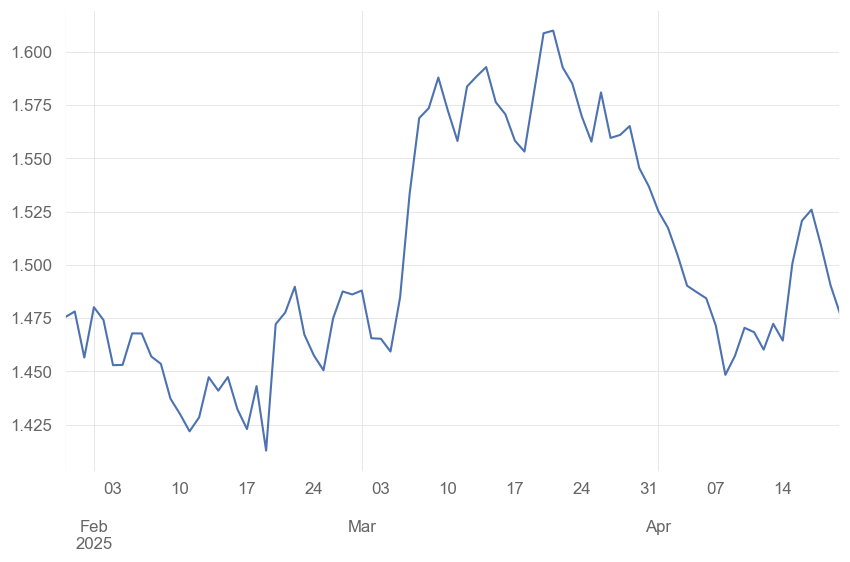

In [24]:
import quantstats as qs

((gfe["GFE"].pct_change(90).dropna()+1)**4).plot()

In [18]:
tarihler=pd.date_range(start="2024-12-01",end="2024-12-31")
for tarih in tarihler:
    try:
        tarih=tarih.strftime("%d.%m.%y")
        chrome_options = Options()
        chrome_options.add_argument("--headless")  
        chrome_options.add_argument("--disable-gpu")  
        chrome_options.add_argument("--no-sandbox")  

        driver = webdriver.Chrome(options=chrome_options)

        driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")

        date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
        date_input.clear()
        date_input.send_keys(tarih)  

        price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
        price_button.click()

        all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
        all_pages_radio.click()

        excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
        excel_button.click()

        time.sleep(2)

        print(f"{tarih} √ßekildi!")

        driver.quit()
    except:
        chrome_options = Options()
        chrome_options.add_argument("--headless")  
        chrome_options.add_argument("--disable-gpu")  
        chrome_options.add_argument("--no-sandbox")  

        driver = webdriver.Chrome(options=chrome_options)

        driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")

        date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
        date_input.clear()
        date_input.send_keys(tarih)  

        price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
        price_button.click()

        all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
        all_pages_radio.click()

        excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
        excel_button.click()

        time.sleep(2)

        print(f"{tarih} √ßekildi!")

        driver.quit()
        


01.12.24 √ßekildi!
02.12.24 √ßekildi!
03.12.24 √ßekildi!
04.12.24 √ßekildi!
05.12.24 √ßekildi!
06.12.24 √ßekildi!
07.12.24 √ßekildi!
08.12.24 √ßekildi!
09.12.24 √ßekildi!
10.12.24 √ßekildi!
11.12.24 √ßekildi!
12.12.24 √ßekildi!
13.12.24 √ßekildi!
14.12.24 √ßekildi!
15.12.24 √ßekildi!
16.12.24 √ßekildi!
17.12.24 √ßekildi!
18.12.24 √ßekildi!
19.12.24 √ßekildi!
20.12.24 √ßekildi!
21.12.24 √ßekildi!
22.12.24 √ßekildi!
23.12.24 √ßekildi!
24.12.24 √ßekildi!
25.12.24 √ßekildi!
26.12.24 √ßekildi!
27.12.24 √ßekildi!
28.12.24 √ßekildi!
29.12.24 √ßekildi!
30.12.24 √ßekildi!
31.12.24 √ßekildi!


In [20]:
col=["√úr√ºn"]
cols=np.sort(sebzeler.columns[:-1])
col.extend(cols)
sebzeler=(sebzeler[col].iloc[:,1:].T)
sebzeler.index=pd.to_datetime(sebzeler.index)
sebzeler=sebzeler.sort_index()

In [21]:
col=["√úr√ºn"]
cols=np.sort(meyveler.columns[:-1])
col.extend(cols)
meyveler=(meyveler[col].iloc[:,1:].T)
meyveler.index=pd.to_datetime(meyveler.index)
meyveler=meyveler.sort_index()

In [22]:

w=pd.read_csv("aƒüƒ±rlƒ±klart√ºfe.csv",index_col=0)
meyveaƒüƒ±rlƒ±k=w.loc[meyveler.columns]["Aƒüƒ±rlƒ±k"]/w.loc[meyveler.columns]["Aƒüƒ±rlƒ±k"].sum()
meyve_endeks=(meyveler*meyveaƒüƒ±rlƒ±k).sum(axis=1)
meyve_endeks

Tarih
2024-12-01    39.229901
2024-12-02    33.697924
2024-12-03    42.269883
2024-12-04    36.412995
2024-12-05    37.864328
                ...    
2025-04-14    43.416894
2025-04-15    48.214514
2025-04-16    44.215070
2025-04-17    53.734666
2025-04-18    44.724032
Length: 139, dtype: float64

In [23]:
w=pd.read_csv("aƒüƒ±rlƒ±klart√ºfe.csv",index_col=0)
sebzeaƒüƒ±rlƒ±k=w.loc[sebzeler.columns]["Aƒüƒ±rlƒ±k"]/w.loc[sebzeler.columns]["Aƒüƒ±rlƒ±k"].sum()
sebze_endeks=(sebzeler*sebzeaƒüƒ±rlƒ±k).sum(axis=1)
sebze_endeks

Tarih
2024-12-01    23.239601
2024-12-02    22.409904
2024-12-03    25.944970
2024-12-04    24.537766
2024-12-05    26.384272
                ...    
2025-04-14    22.509875
2025-04-15    25.163782
2025-04-16    24.146950
2025-04-17    24.201248
2025-04-18    22.773987
Length: 139, dtype: float64

In [24]:
meyvesebze=meyve_endeks*0.4+sebze_endeks*0.6

In [38]:
np.cumprod(meyvesebze.resample("M").mean().pct_change().fillna(0).dropna()+1)*100

0    T√úƒ∞K
Tarih                         
2024-12-31  100.000000  100.00
2025-01-31  106.960379  103.41
2025-02-28  111.808261  102.16
2025-03-31  134.155727  118.54
2025-04-30  127.340449    0.00

In [47]:
meyvesebze=pd.DataFrame(meyvesebze)
meyvesebze["T√úƒ∞K"]=0
meyvesebze["T√úƒ∞K"].loc["2024-12"]=100
meyvesebze["T√úƒ∞K"].loc["2025-01"]=98.35
meyvesebze["T√úƒ∞K"].loc["2025-02"]=101.70

meyvesebze["T√úƒ∞K"].loc["2025-03"]=100.47
meyvesebze["T√úƒ∞K"].loc["2025-04"]=116.58



C:\Users\Bora\AppData\Local\Temp\ipykernel_16224\3627036409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyvesebze["T√úƒ∞K"].loc["2024-12"]=100
C:\Users\Bora\AppData\Local\Temp\ipykernel_16224\3627036409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyvesebze["T√úƒ∞K"].loc["2025-01"]=98.35


In [51]:
meyvesebze.resample("M").mean().pct_change().dropna()

0      T√úƒ∞K
Tarih                         
2025-01-31  0.069604 -0.016500
2025-02-28  0.045324  0.034062
2025-03-31  0.199873 -0.012094
2025-04-30 -0.050801  0.160346

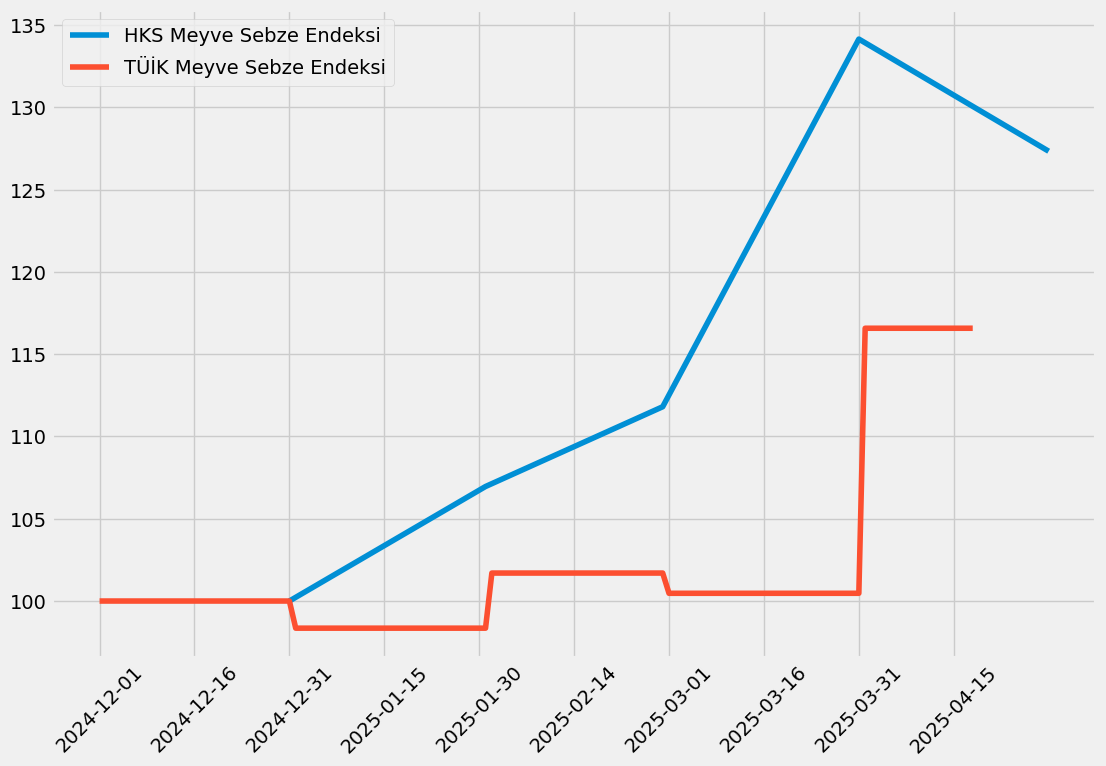

In [48]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))

plt.plot(np.cumprod(meyvesebze[0].resample("M").mean().pct_change().fillna(0)+1)*100,label="HKS Meyve Sebze Endeksi")
plt.plot(meyvesebze["T√úƒ∞K"],label="T√úƒ∞K Meyve Sebze Endeksi")
plt.xticks(meyvesebze.index[::15],rotation=45)
plt.legend()

In [19]:


import pandas as pd




import os
import glob

dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
datam=pd.DataFrame()
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["ƒ∞≈ülem Hacmi"]=df["ƒ∞≈ülem Hacmi"].astype(float)
    df["Hacimli"]=df["ƒ∞≈ülem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("√úr√ºn Adƒ±")
    df["Aƒüƒ±rlƒ±klƒ± Fiyat"]=df.groupby("√úr√ºn Adƒ±")["Hacimli"].sum()/df.groupby("√úr√ºn Adƒ±")["ƒ∞≈ülem Hacmi"].sum()
    df["√úr√ºn Adƒ±"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)



w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
sebzeler=pd.DataFrame()
import numpy as np
for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
    if sebze=="√áarliston Biber":
        sebze="Biber √áarliston"
    elif sebze=="Dolmalƒ±k Biber":
        sebze="Biber Dolmalƒ±k"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soƒüan":
        sebze="Soƒüan Kuru"
    elif sebze=="Kƒ±rmƒ±zƒ± Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(sebze,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[sebze]*len(hal)



    print(f"{sebze} verisi bulundu")
    sebzeler=pd.concat([sebzeler,hal],axis=0)


sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index




w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
meyveler=pd.DataFrame()
import numpy as np
for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(meyve,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[meyve]*len(hal)



    print(f"{meyve} verisi bulundu")
    meyveler=pd.concat([meyveler,hal],axis=0)


meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["√úr√ºn"]=f"HKS" + meyveler.index






Biber √áarliston verisi bulundu
Biber Dolmalƒ±k verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havu√ß verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soƒüan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kƒ±rmƒ±zƒ± Lahana verisi bulundu
Mantar verisi bulundu
Kƒ±vƒ±rcƒ±k verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlƒ±can verisi bulundu
Pƒ±rasa verisi bulundu
Roka verisi bulundu
Salatalƒ±k verisi bulundu
Sarƒ±msak verisi bulundu
turp verisi bulundu
Portakal verisi bulundu
√úz√ºm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
√áilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
≈ûeftali verisi bulundu


In [4]:
file 

'C:/Users/Bora/Downloads\\1744974593049_StandardPoors.xls'

In [ ]:
import pandas as pd
data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")
degisim=data1.iloc[:,1:].pct_change(axis=1)
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

In [8]:
aƒüƒ±rlƒ±klar

NameError: name 'aƒüƒ±rlƒ±klar' is not defined

<Figure size 2500x1500 with 0 Axes>

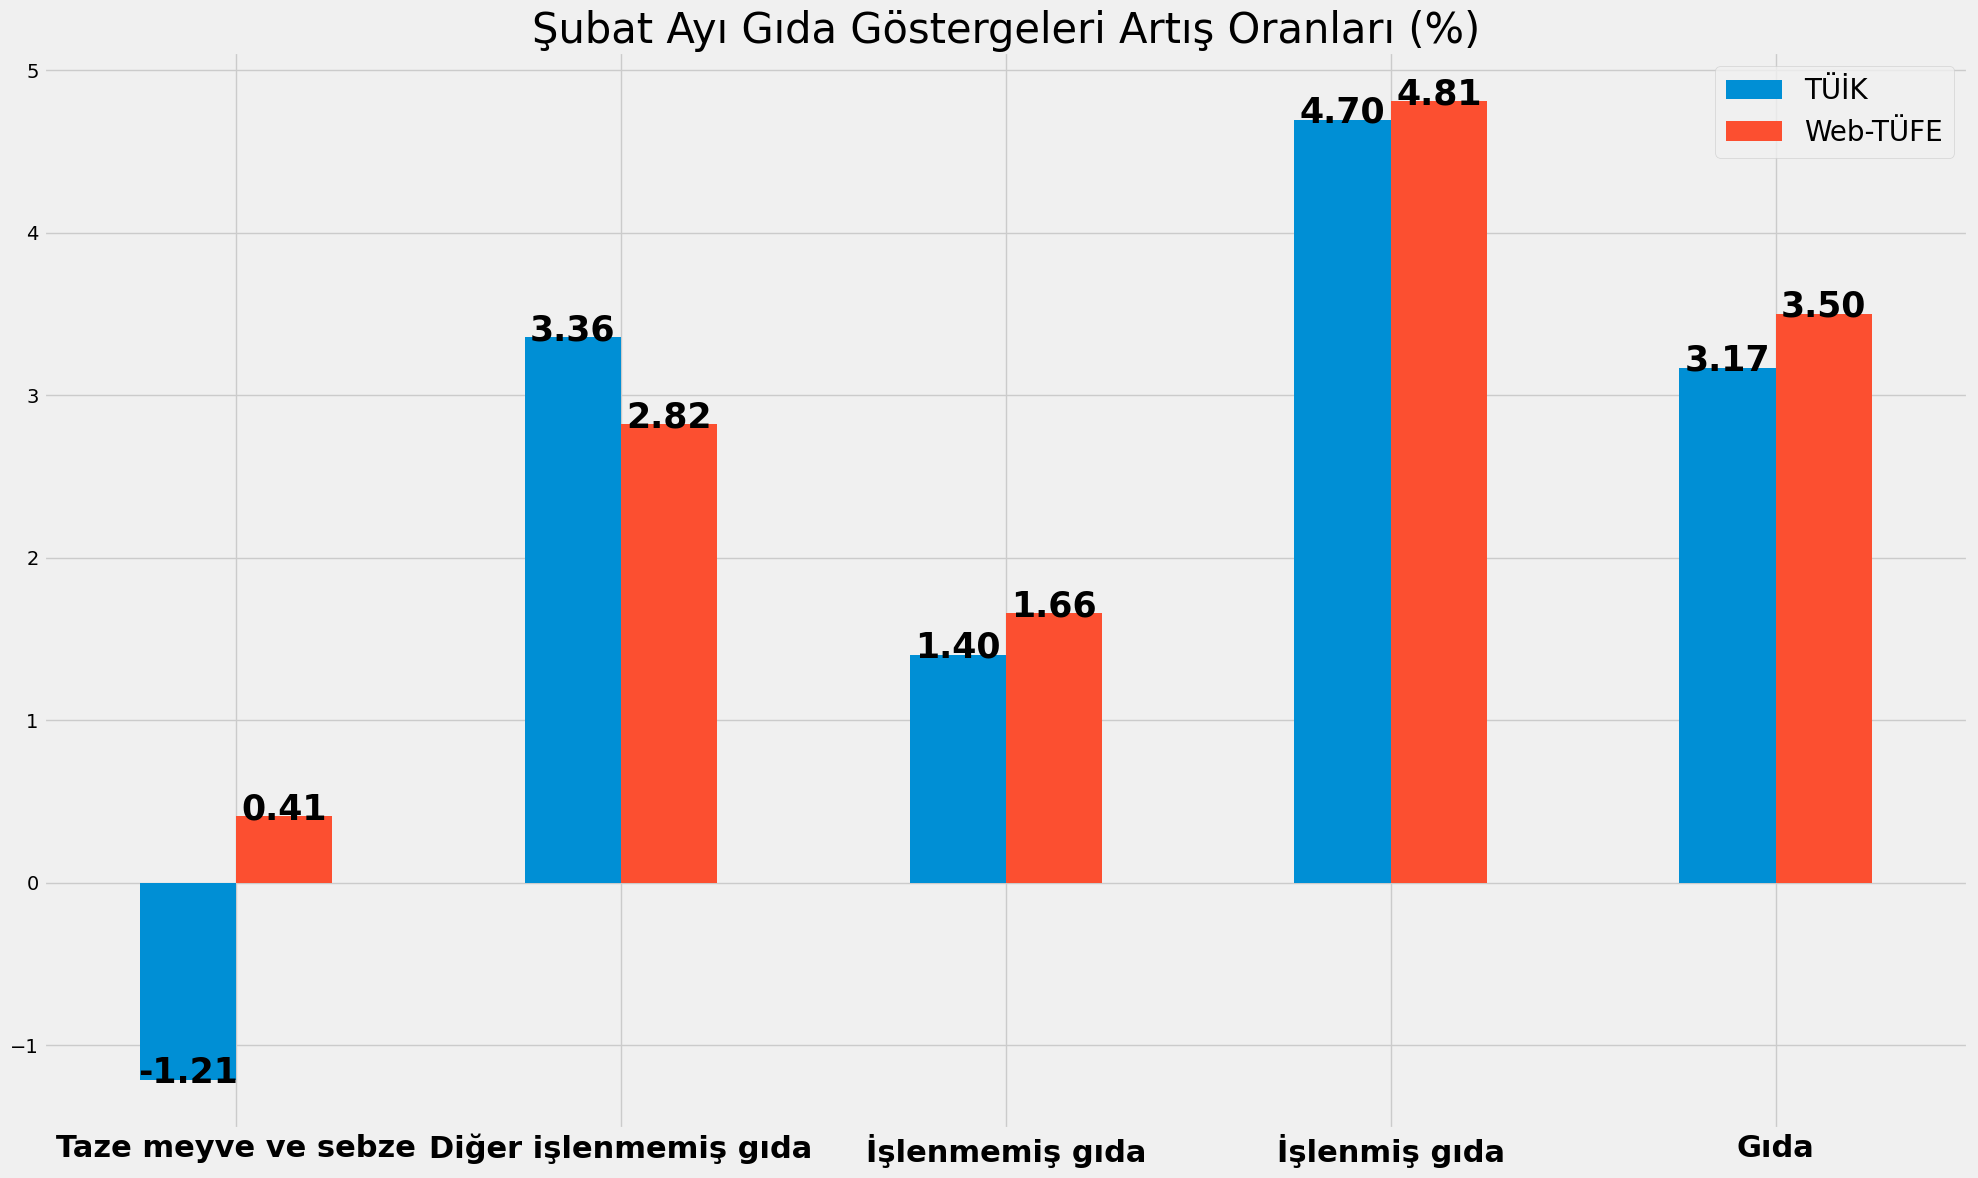

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
t√ºik=pd.read_csv("t√ºikim.csv",index_col=0)
plt.style.use("fivethirtyeight")
# Creating the data
data = {
    "T√úƒ∞K": t√ºik.pct_change().iloc[-1]*100,
    "Web-T√úFE": [0.41,2.82,1.66,4.81],

}

# Convert to DataFrame
df = pd.DataFrame(data)
df.loc["Gƒ±da"]=[3.17,3.5]


# Plotting the bar chart with bold values on top of the bars
plt.figure(figsize=(25, 15))
ax = df.plot(kind='bar', figsize=(20, 12))

# Adding the values on top of the bars with bold text
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=25, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')

plt.title("≈ûubat Ayƒ± Gƒ±da G√∂stergeleri Artƒ±≈ü Oranlarƒ± (%)",fontsize=30)

plt.xticks(rotation=0,fontsize=22,fontweight="bold")
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()


In [37]:
gƒ±da=pd.read_excel("ozel kapsamli tufe gostergeleri (1).xls")
gƒ±da=gƒ±da.iloc[50:51,3:].T
gƒ±da.columns=["Aylƒ±k Deƒüi≈üim"]
gƒ±da=gƒ±da.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(gƒ±da)))
gƒ±da=gƒ±da.loc["2024-11-30":]
gƒ±da["Tarih"]=gƒ±da.index.strftime("%Y-%m")
gƒ±da=gƒ±da.reset_index(drop=True)
gƒ±da_c=gƒ±da[["Tarih","Aylƒ±k Deƒüi≈üim"]]


aylƒ±k_endeks_t√ºik=list(gƒ±da_c["Aylƒ±k Deƒüi≈üim"])
t√ºik_aylƒ±k=[1]
t√ºik_aylƒ±k.extend(list(((np.array(aylƒ±k_endeks_t√ºik)/100))+1))
t√ºik_aylƒ±k=pd.DataFrame(t√ºik_aylƒ±k,columns=["T√úƒ∞K"])
t√ºik_aylƒ±k=np.cumprod(t√ºik_aylƒ±k)*100

t√ºik_aylƒ±k.index=pd.date_range(start="2024-10-31",freq="M",periods=len(t√ºik_aylƒ±k)).strftime("%Y-%m-%d")
t√ºik_aylƒ±k.index=pd.to_datetime(t√ºik_aylƒ±k.index)

C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\2351233369.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gƒ±da=gƒ±da.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(gƒ±da)))
C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\2351233369.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  t√ºik_aylƒ±k.index=pd.date_range(start="2024-10-31",freq="M",periods=len(t√ºik_aylƒ±k)).strftime("%Y-%m-%d")


In [39]:
gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)
gfe["T√úƒ∞K"]=t√ºik_aylƒ±k["T√úƒ∞K"]
gfe=gfe.fillna(method="ffill")
gfe=gfe.fillna(100)

C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\1037474672.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gfe=gfe.fillna(method="ffill")


In [ ]:
"""
    sa_data=pd.DataFrame()
    for col in t√ºik.columns:
        sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
        sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
        sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
        sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
        sa_data.loc["2024-10","√ñnceki"]=pd.NA
        sa_data[f"{col} √ñnceki Endeks"]=pd.NA
        sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

    sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
    for col in t√ºik.columns:
        sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
        sa_datadegisim[col]=sa_datadegisim[col].astype(float)
        sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
    sa_datadegisim=sa_datadegisim.resample('M').last()   
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



    for col in sa_datadegisim.columns:
        sa_datadegisim[f"{col} MA"]=pd.NA


        for row in sa_datadegisim.index:
                t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
                t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
                from statsmodels.tsa.x13 import x13_arima_analysis


                np.random.seed(42)



                x13_path = r'C:\Users\Bora\Desktop\x13as'
                
                

                
                ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
                sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


    for col in t√ºik.columns:
        sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
        sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

    sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
    'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
    'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
    sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


    aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
    w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
    w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
    meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
    sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
    meyvesebze=np.concatenate([meyveler,sebzeler])
    digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

    islenmemis=digerislenmemis+list(meyvesebze)

    aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
    meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
    meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
    digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
    digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
    islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
    islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

    sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


    islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
    islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

    islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

    genel=pd.concat([islenmemisler,islenmisler],axis=0)

    sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
    sa_datadegisim.to_csv("mag√∂stergeler.csv")
"""

In [ ]:
g√∂stergeaylƒ±k=pd.DataFrame()
for col in t√ºik.columns:
    g√∂stergeaylƒ±k[col]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
    g√∂stergeaylƒ±k[col].iloc[-1]=(((hareketli_aylik_ortalama(√∂zelg√∂stergeler[col])["Aylƒ±k Ortalama"].iloc[-1]/hareketli_aylik_ortalama(√∂zelg√∂stergeler[col])["Aylƒ±k Ortalama"].loc["2025-02-01"]))-1)*100

In [27]:
g√∂stergeaylƒ±k


Taze meyve ve sebze  Diƒüer i≈ülenmemi≈ü gƒ±da  ƒ∞≈ülenmemi≈ü gƒ±da  \
Tarih                                                                     
2024-11-30             5.477013               1.741840         3.612414   
2024-12-31             6.073420               3.877814         4.924704   
2025-01-31             6.135508               3.243180         4.713203   
2025-02-28            -0.040998               2.862252         1.335669   
2025-03-31            12.344673               3.698780         7.990578   

            ƒ∞≈ülenmi≈ü gƒ±da  
Tarih                      
2024-11-30       0.861357  
2024-12-31       2.034034  
2025-01-31       2.438807  
2025-02-28       4.798631  
2025-03-31       2.912418

In [19]:
from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()


C:\Users\Bora\AppData\Local\Temp\ipykernel_9800\2997715634.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))


Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.
